Lista de afazeres 

1 - Mapa do RN com o relevo, estilo 3d... mostrando pontos das 24 estações

2 - Tabela de valores absolutos

3 - Calcular o RMSE geral - do semestre 1 e 2


In [1]:
import pandas as pd
import numpy as np
import glob
import time
import os


#Módulos para plotar
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime




from numpy import loadtxt, zeros, ones, array, linspace, logspace
from pylab import scatter, show, title, xlabel, ylabel, plot, contour
from sklearn import datasets, linear_model


In [2]:
cd C:\Users\Jr Mendes\Documents\Projeto Atual\New Project

C:\Users\Jr Mendes\Documents\Projeto Atual\New Project


In [3]:
#Arquivos carregados

xlsx = pd.ExcelFile('Dados_das_Estacoes.xlsx')
dcol = pd.read_excel(xlsx, 'RN')

In [4]:
csv_files = glob.glob('*.csv')

In [5]:
for filename in csv_files:
    print(filename.split('.')[0])

Acari
Angicos
Assu - Emater
Assu - Particular
Baía Formosa
Caicó - Açude Itans
Caicó - Açude Mundo Novo
Caicó - Emater
Cruzeta
Extremoz
Ipanguaçu - Base Física EMPARN
Ipanguaçu - Emater
Itajá
João Camara
Jucurutu
Lajes
Martins
Mossoró
Natal
Parnamirim
Pau dos Ferros
Portalegre
Santana do Matos
São Rafael


In [6]:
dfs = []
for filename in csv_files:
    dfs.append(pd.read_csv(filename, sep=','))

In [7]:
for i,mun_df in enumerate(dfs):
    #Separando os dados por MÊS
    mun_df['Estacao'] = csv_files[i].split('.')[0]
    mun_df['Ano'] = mun_df['time'].str[0:4]
    mun_df['Mes'] = mun_df['time'].str[5:7]

In [8]:
# Concatenate all data into one DataFrame
dest = pd.concat(dfs, ignore_index=True)

In [9]:
#dcol

In [10]:
#Selecionando multiplas colunas
#dest[['Estacao','Ano','Mes',' dados']]

In [11]:
len(set(dest['Estacao'])),len(set(dcol['Estação']))

(24, 24)

In [12]:
print(dest)

                     time       dados     Estacao   Ano Mes
0     2014-06-01 00:00:00   24.355324       Acari  2014  06
1     2014-07-01 00:00:00   20.376717       Acari  2014  07
2     2014-08-01 00:00:00    2.682451       Acari  2014  08
3     2014-09-01 00:00:00   32.071125       Acari  2014  09
4     2014-10-01 00:00:00   17.185228       Acari  2014  10
5     2014-11-01 00:00:00    7.356602       Acari  2014  11
6     2014-12-01 00:00:00   17.864363       Acari  2014  12
7     2015-01-01 00:00:00    3.314920       Acari  2015  01
8     2015-02-01 00:00:00   90.677414       Acari  2015  02
9     2015-03-01 00:00:00  142.074905       Acari  2015  03
10    2015-04-01 00:00:00  106.628792       Acari  2015  04
11    2015-05-01 00:00:00   14.969405       Acari  2015  05
12    2015-06-01 00:00:00   35.138554       Acari  2015  06
13    2015-07-01 00:00:00   71.666252       Acari  2015  07
14    2015-08-01 00:00:00    1.041072       Acari  2015  08
15    2015-09-01 00:00:00    0.662347   

In [13]:
bold = "\033[1m"
reset = "\033[0;0m"

In [14]:
def rmse(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val  

Tabela de valores absoluto

Valor Absoluto = Y - X

Porcetagem = =(((C4*100)/B4)-100)/100


legenda automatica
0 a 20%	Precisão Boa				   Superestimou
-20% a 0	     Precisão Boa		   Subestimou
21% a 50%	     Precisão Regular	   Super
-50% a -21%	     Precisão Regular	   Sub
Acima de 51%     Precisão Ruim		   Super
Acima de -51%    Precisão Ruim		   Sub


In [15]:
lista_estacoes = sorted(list(set(dest['Estacao'])))

In [16]:
for i,j in enumerate(lista_estacoes):
    print(j)

Acari
Angicos
Assu - Emater
Assu - Particular
Baía Formosa
Caicó - Açude Itans
Caicó - Açude Mundo Novo
Caicó - Emater
Cruzeta
Extremoz
Ipanguaçu - Base Física EMPARN
Ipanguaçu - Emater
Itajá
João Camara
Jucurutu
Lajes
Martins
Mossoró
Natal
Parnamirim
Pau dos Ferros
Portalegre
Santana do Matos
São Rafael


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

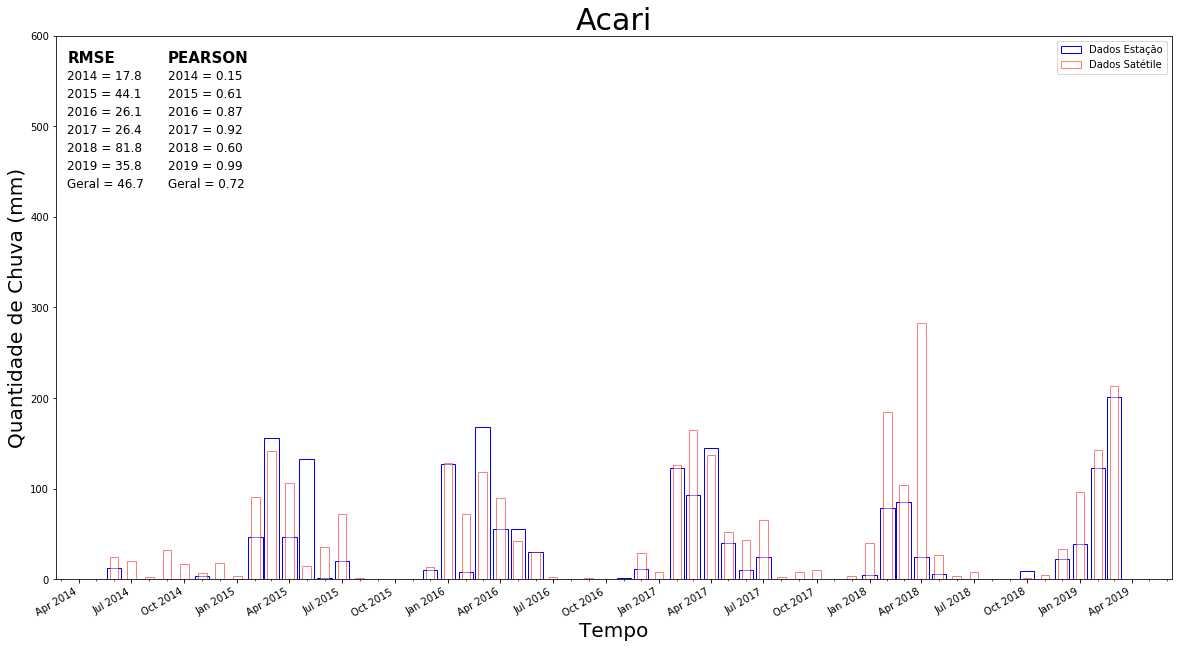

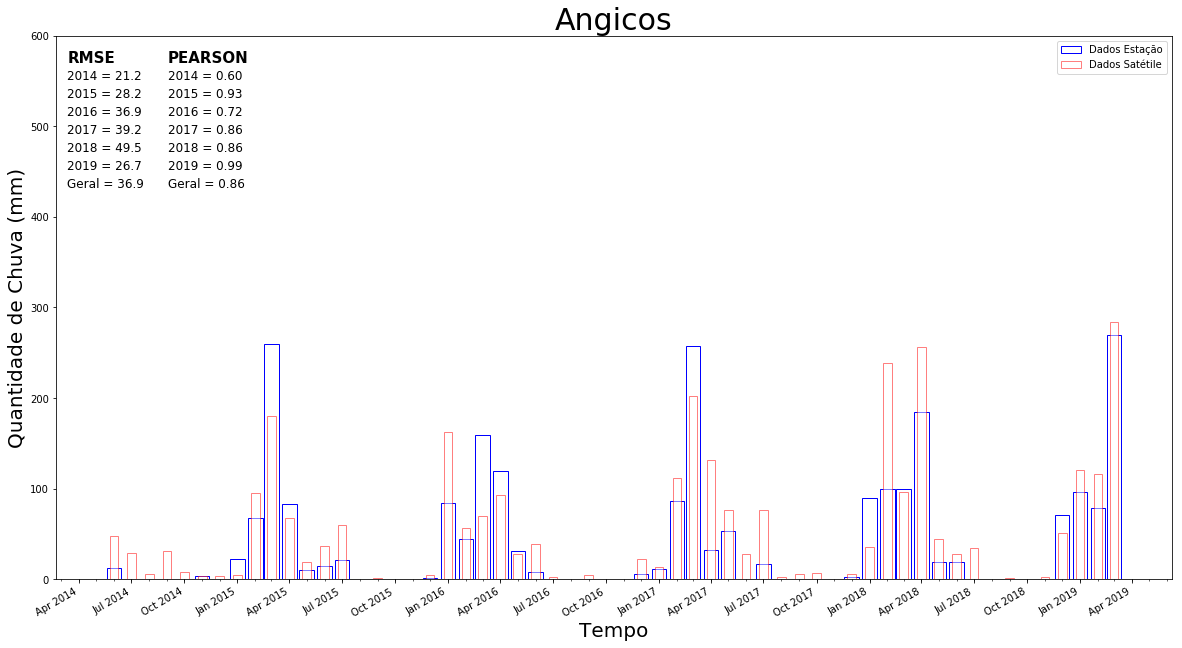

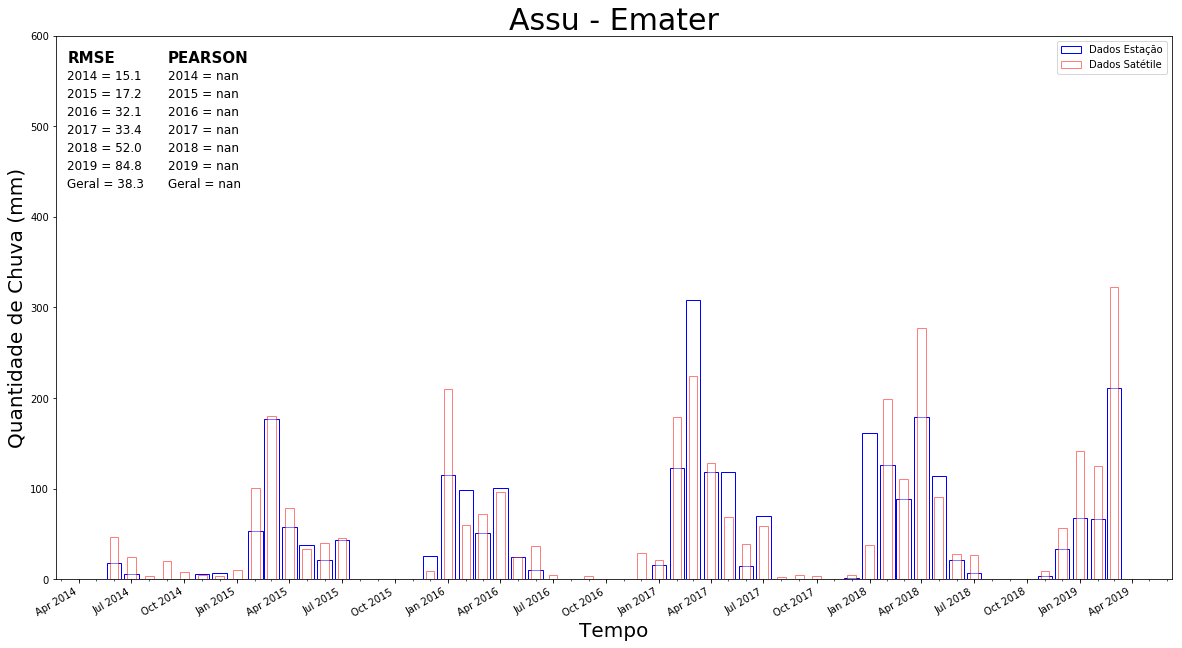

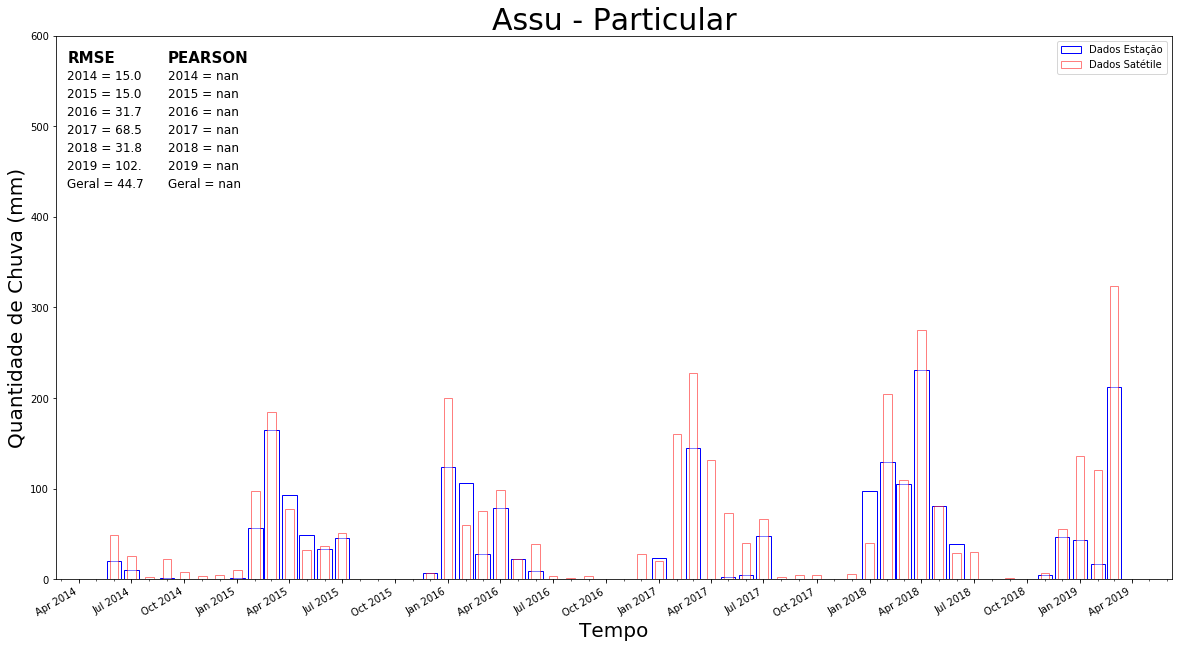

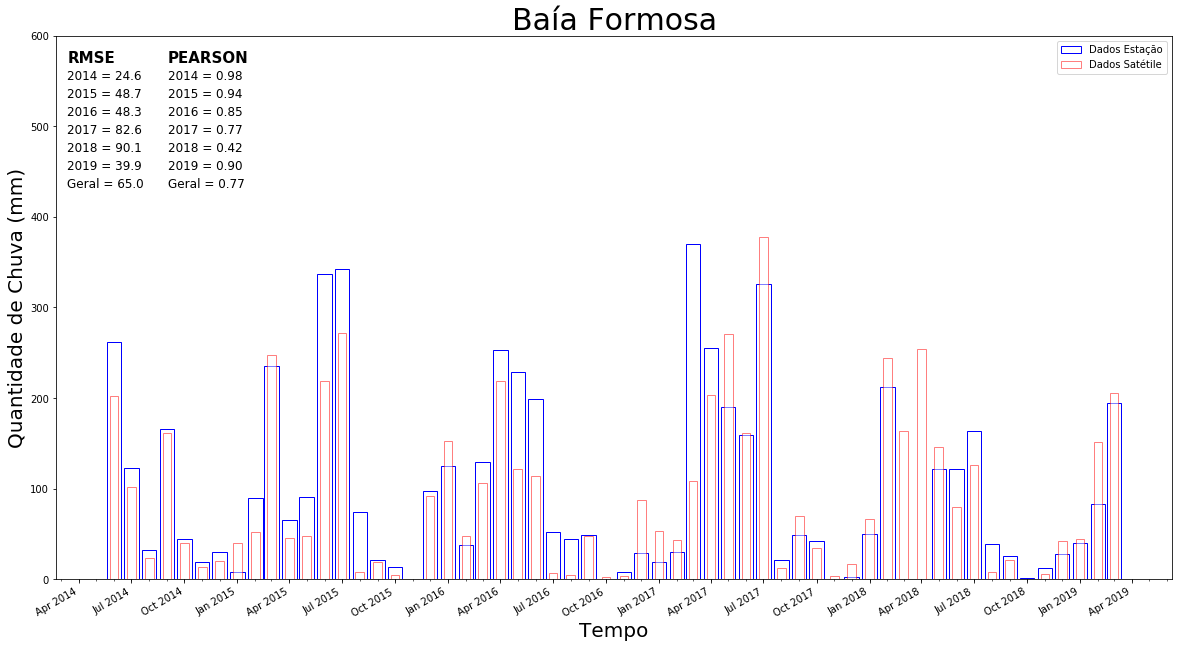

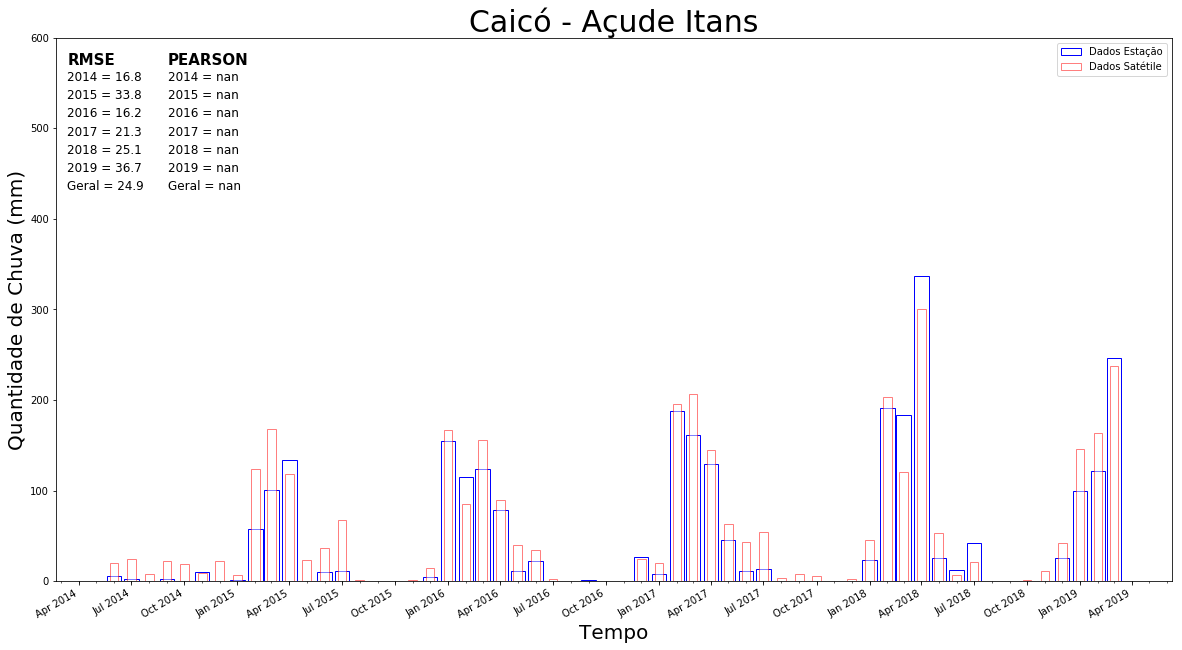

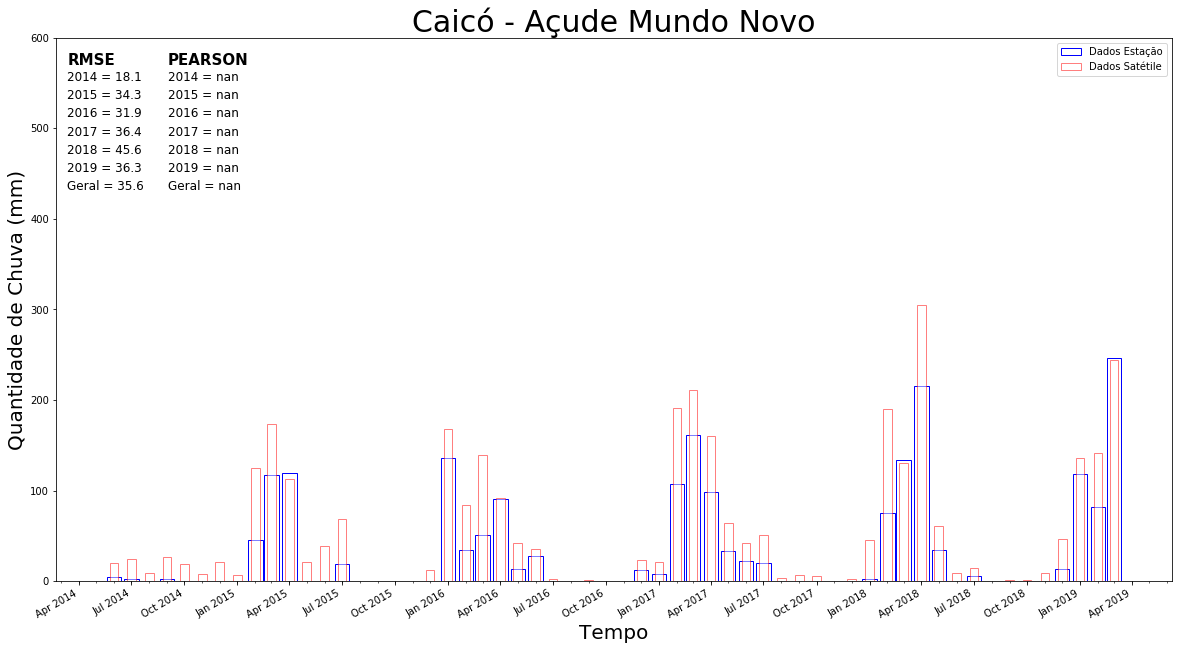

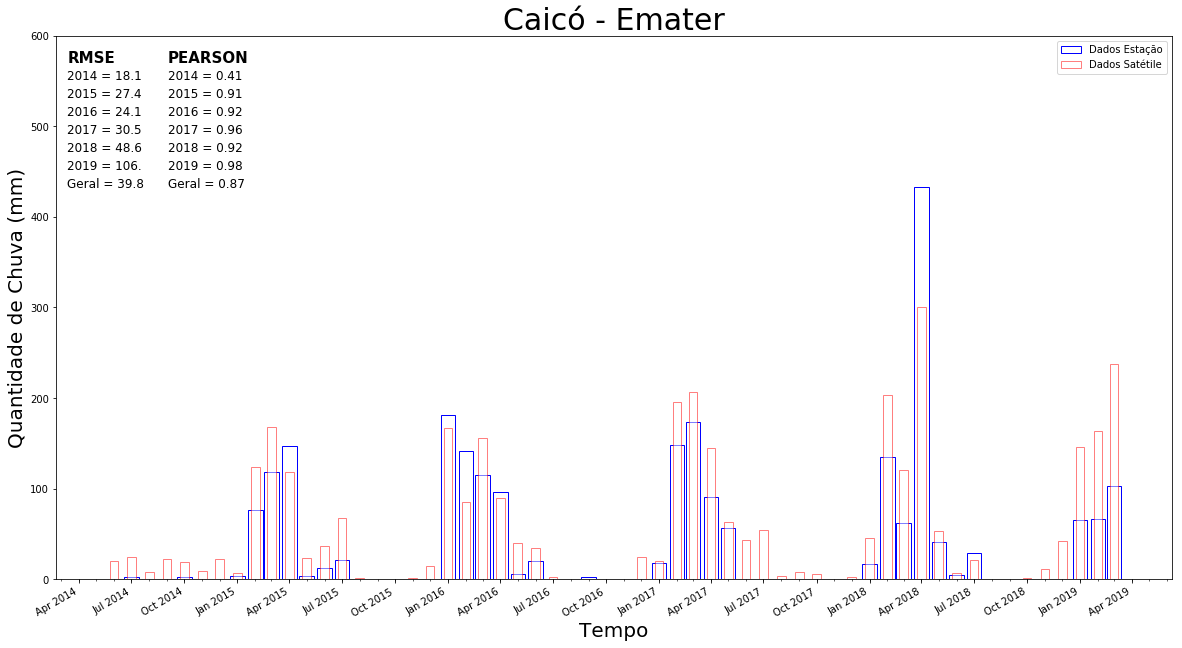

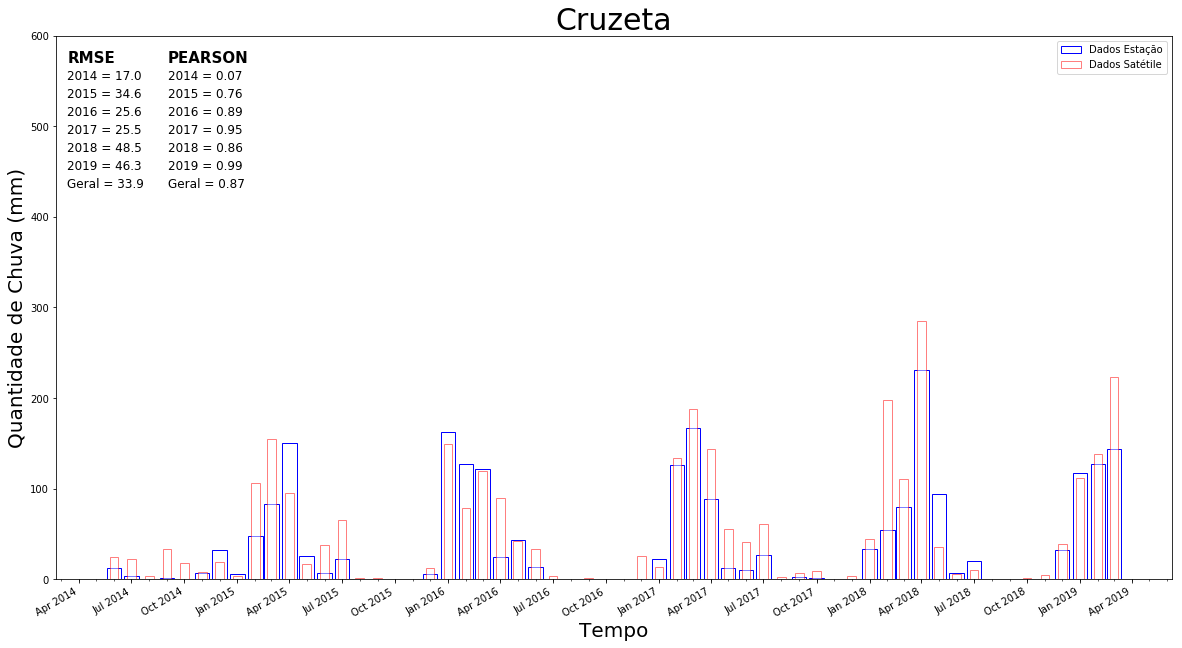

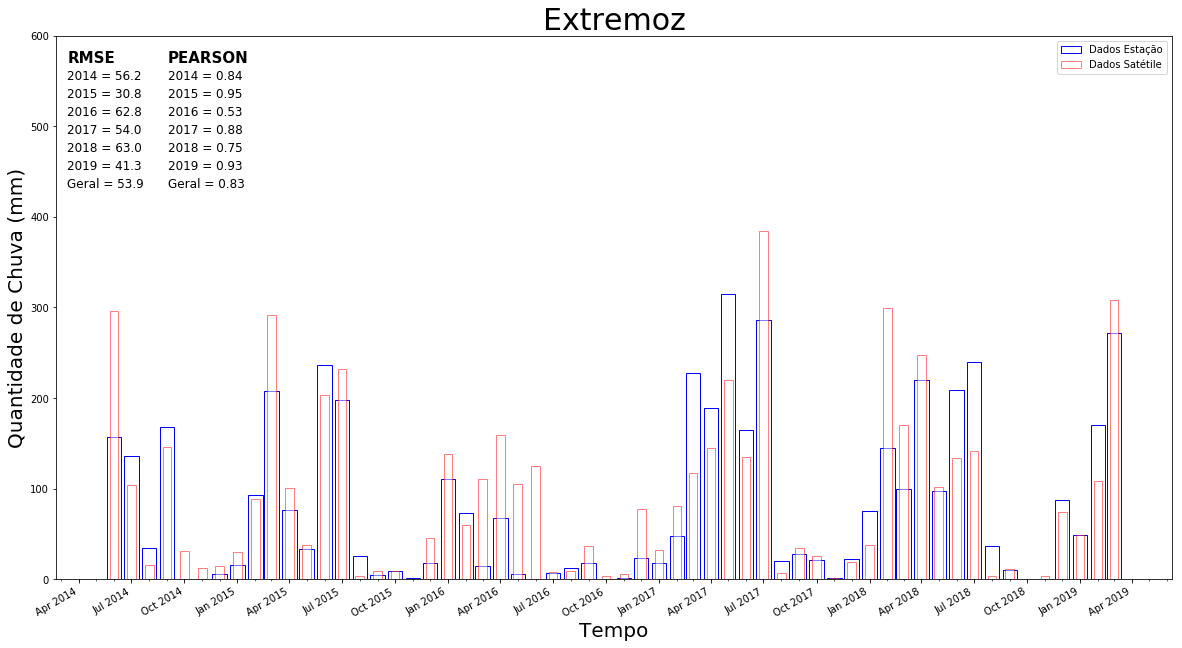

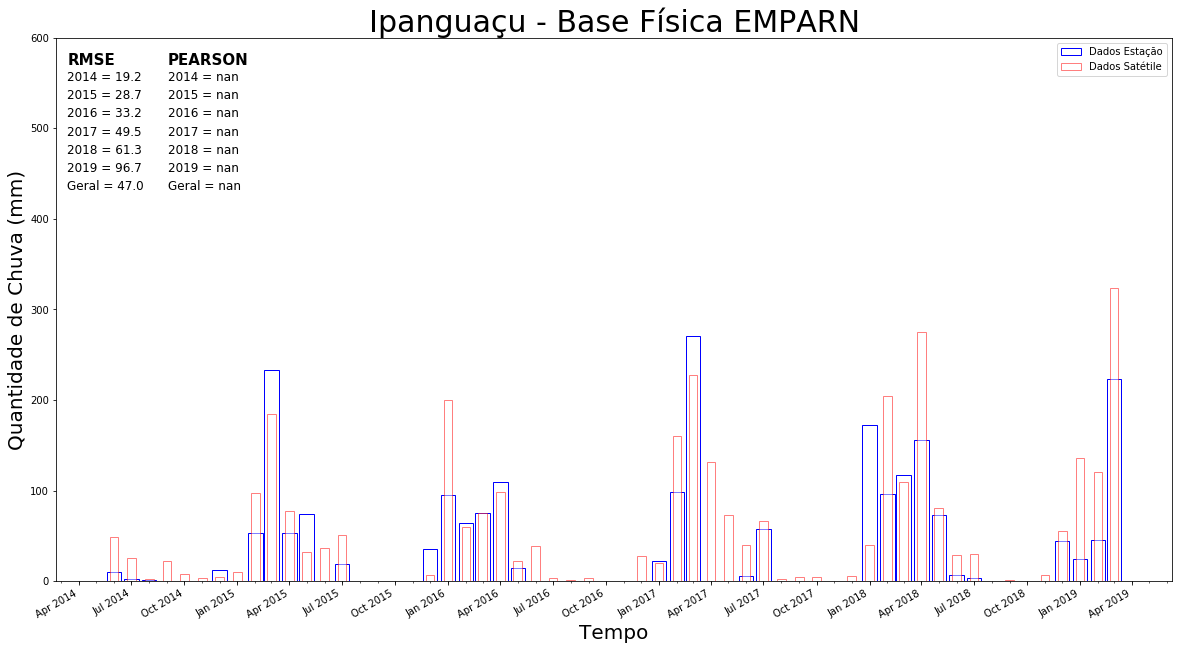

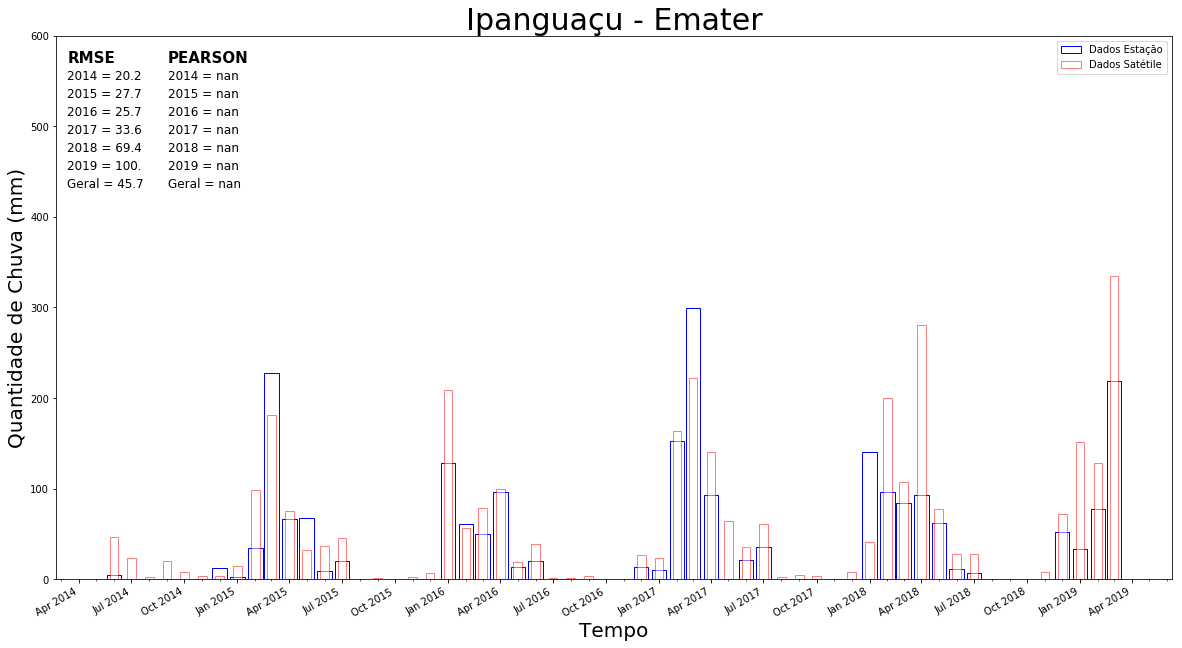

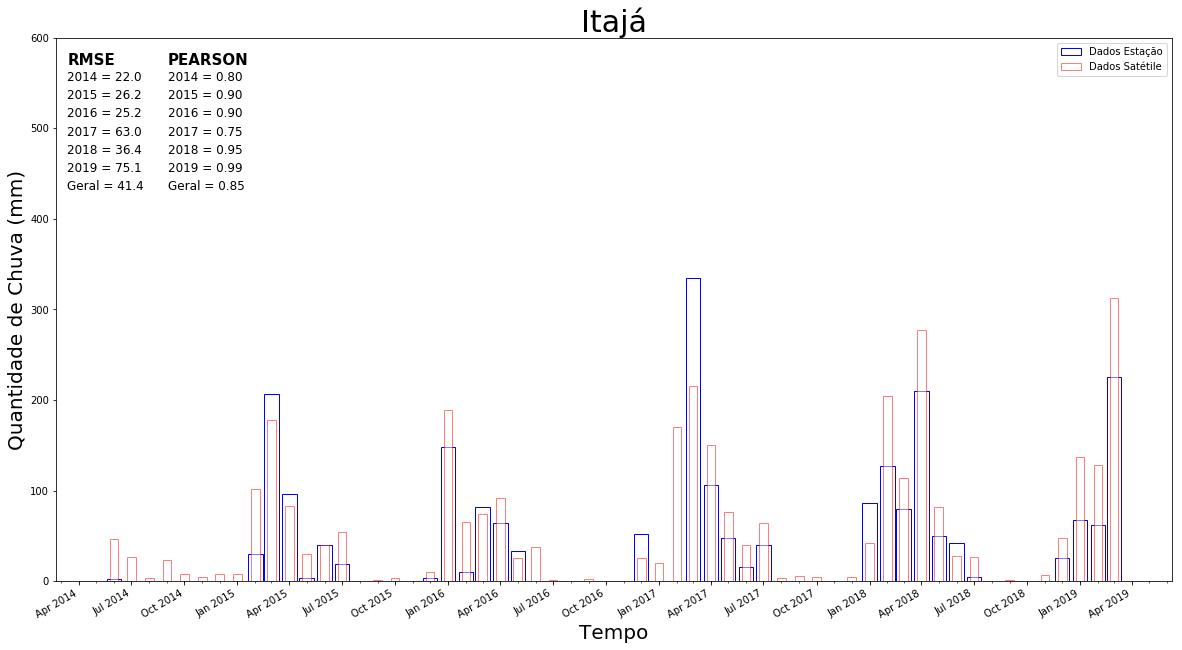

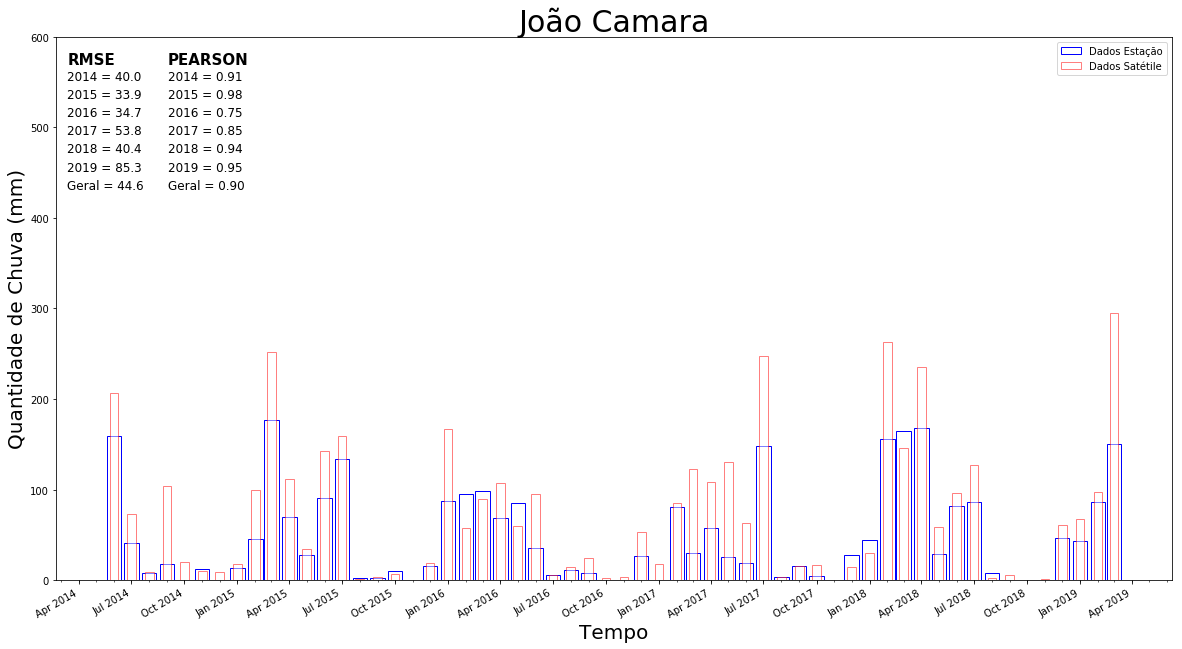

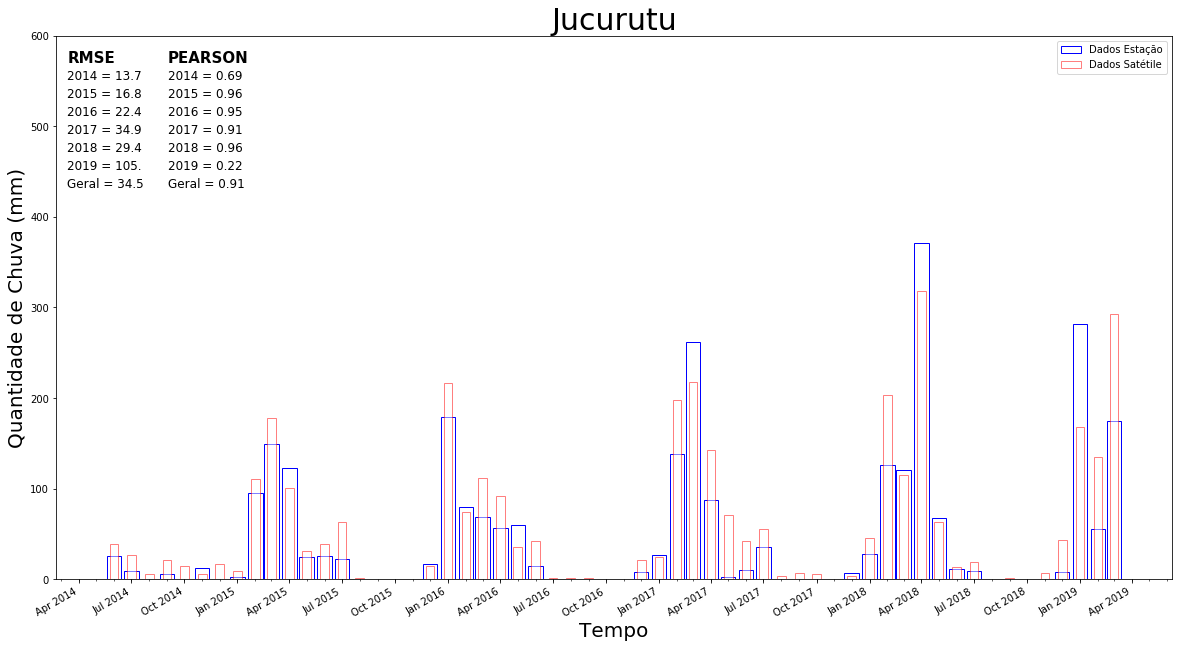

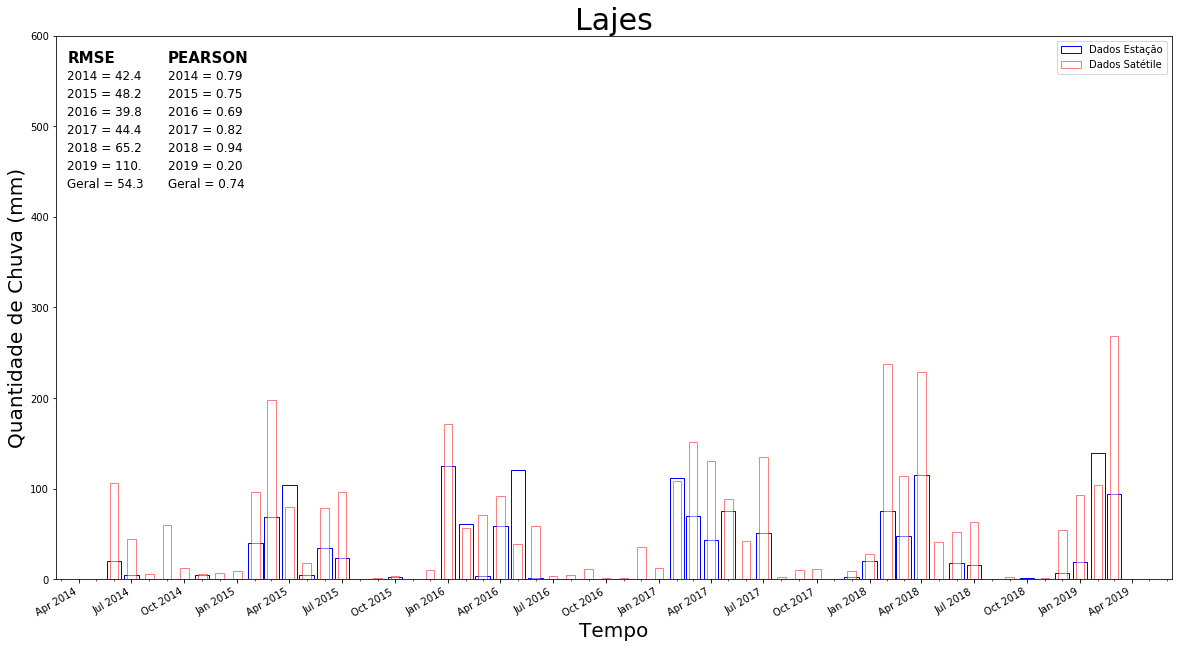

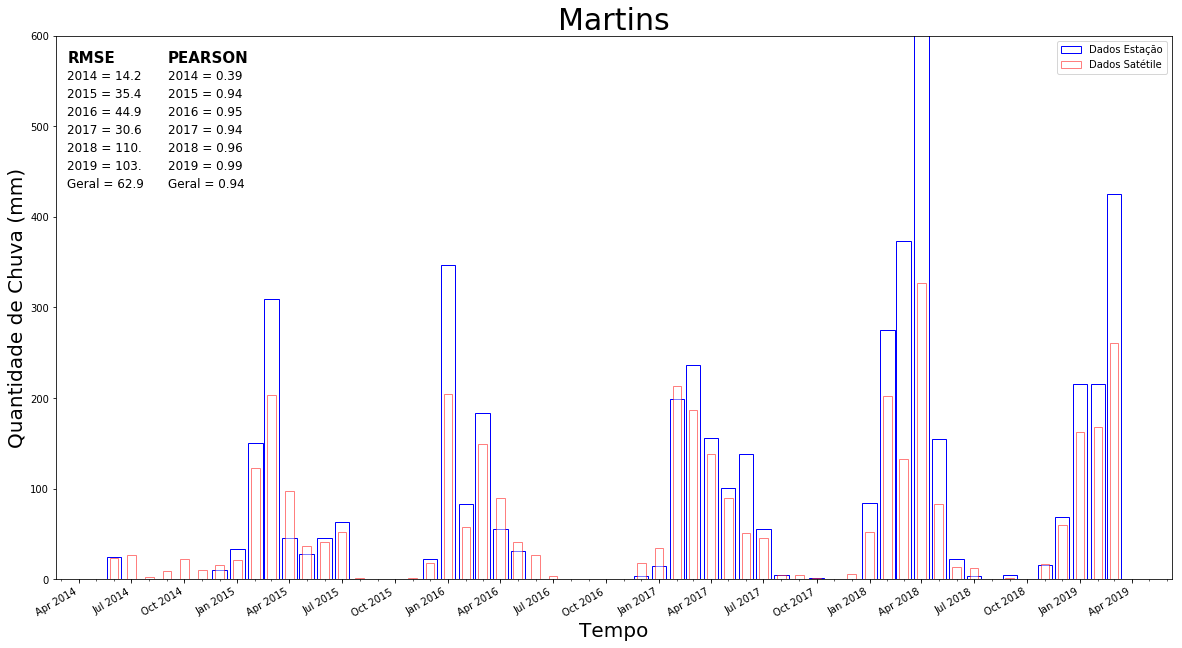

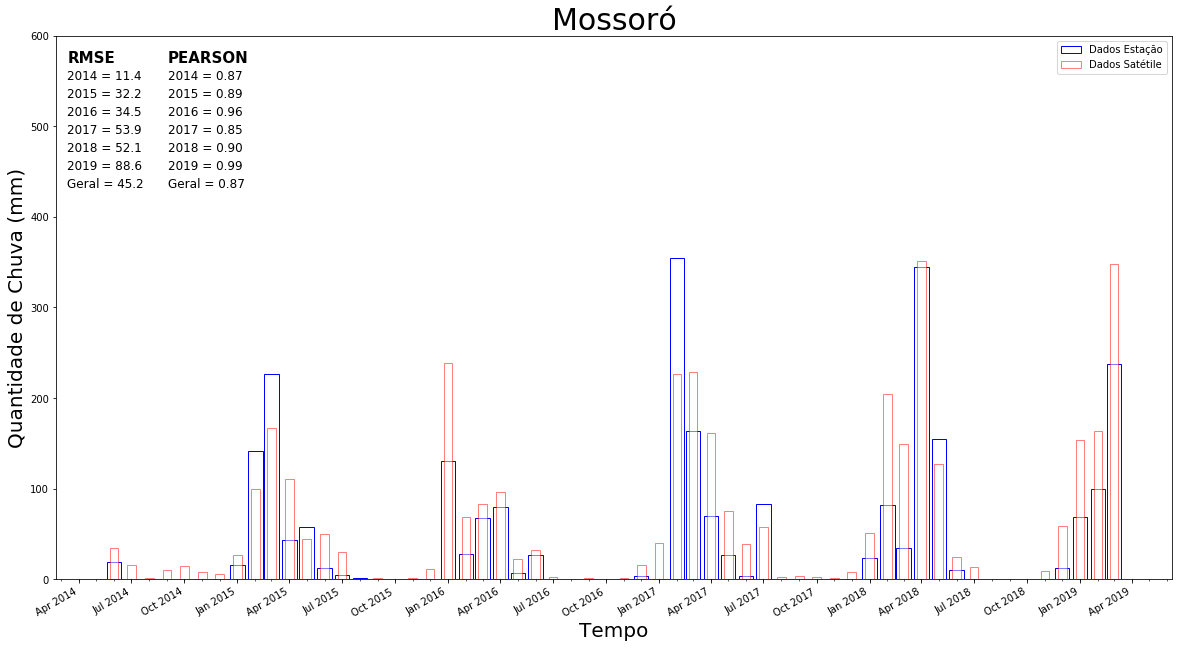

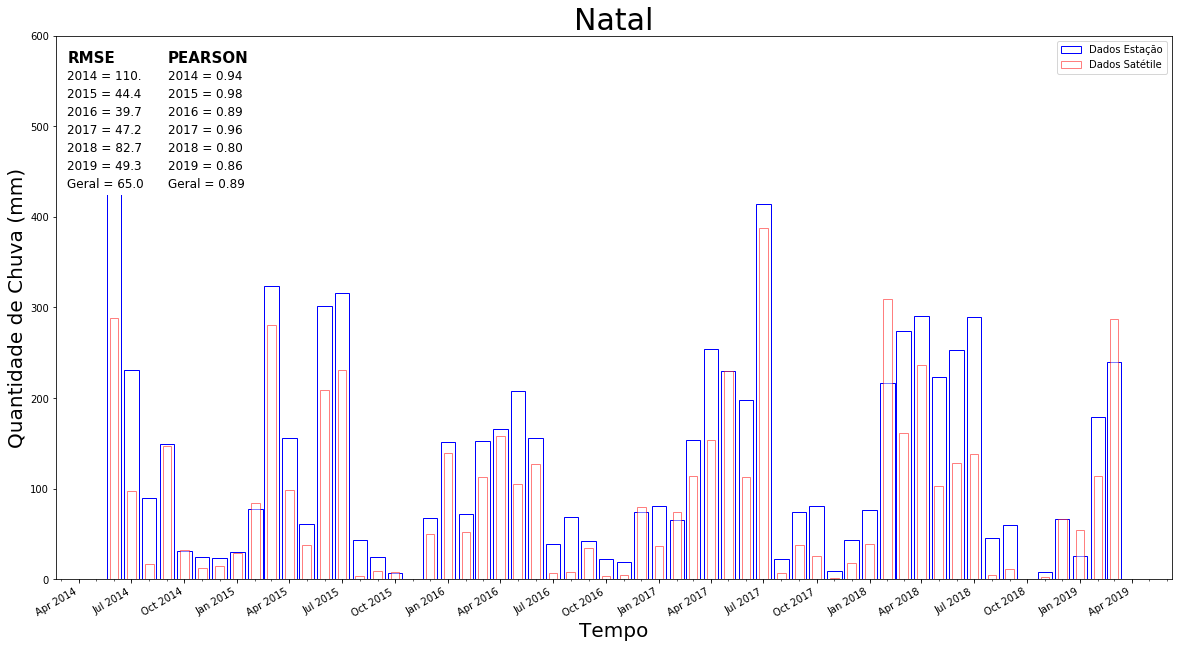

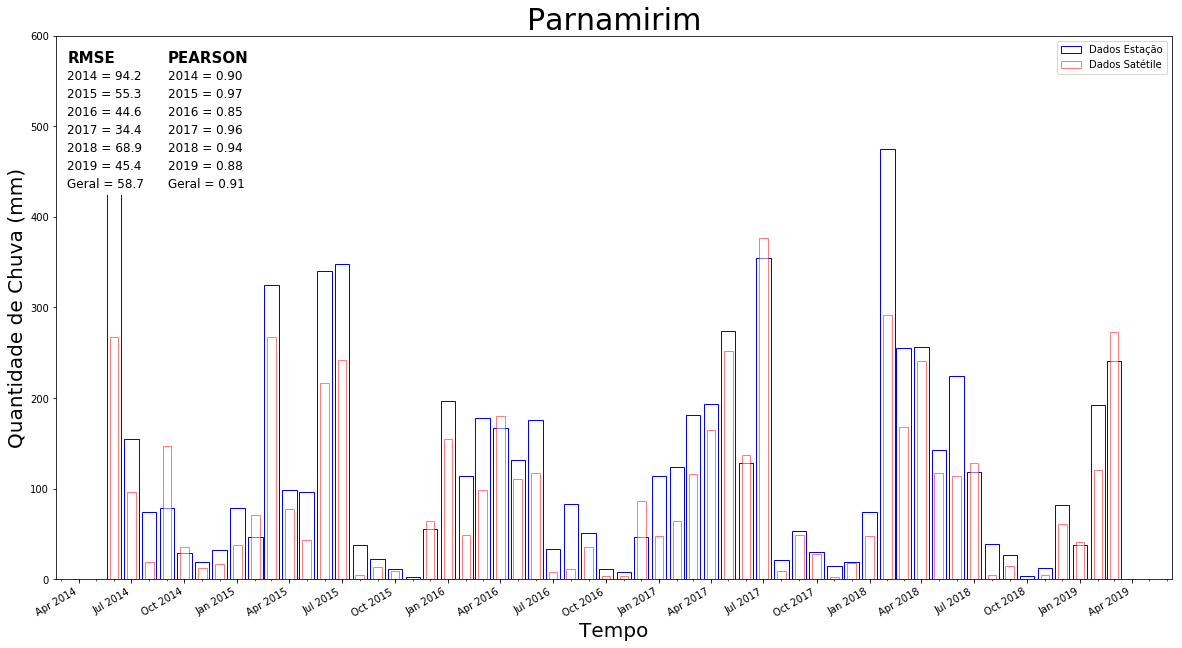

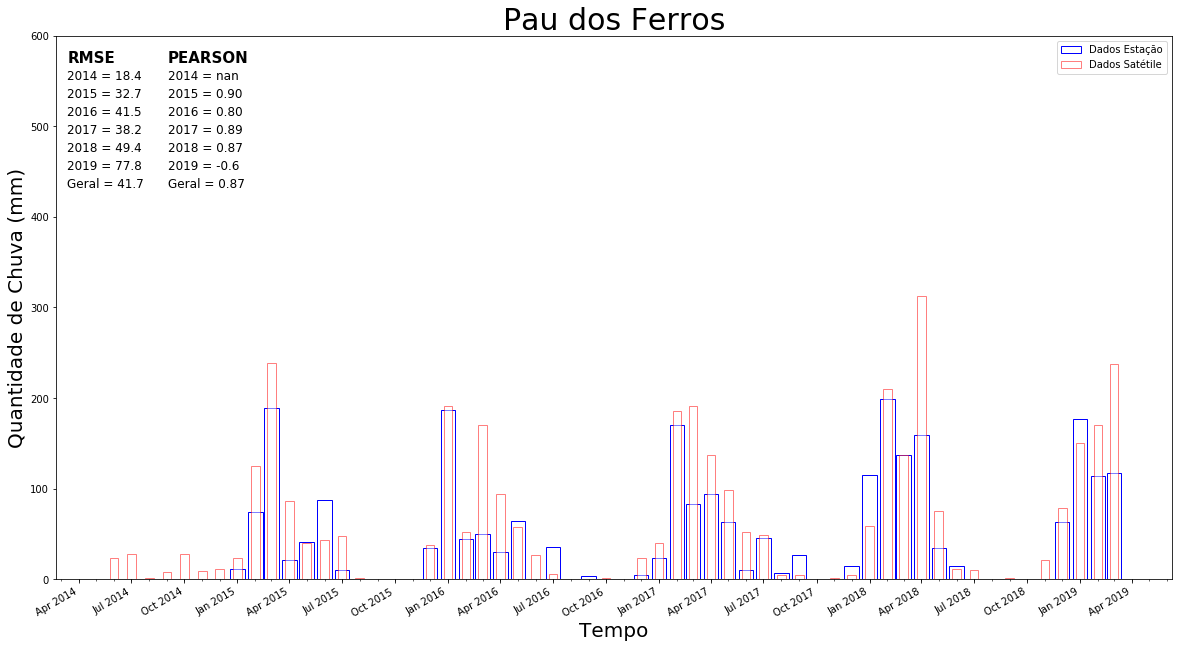

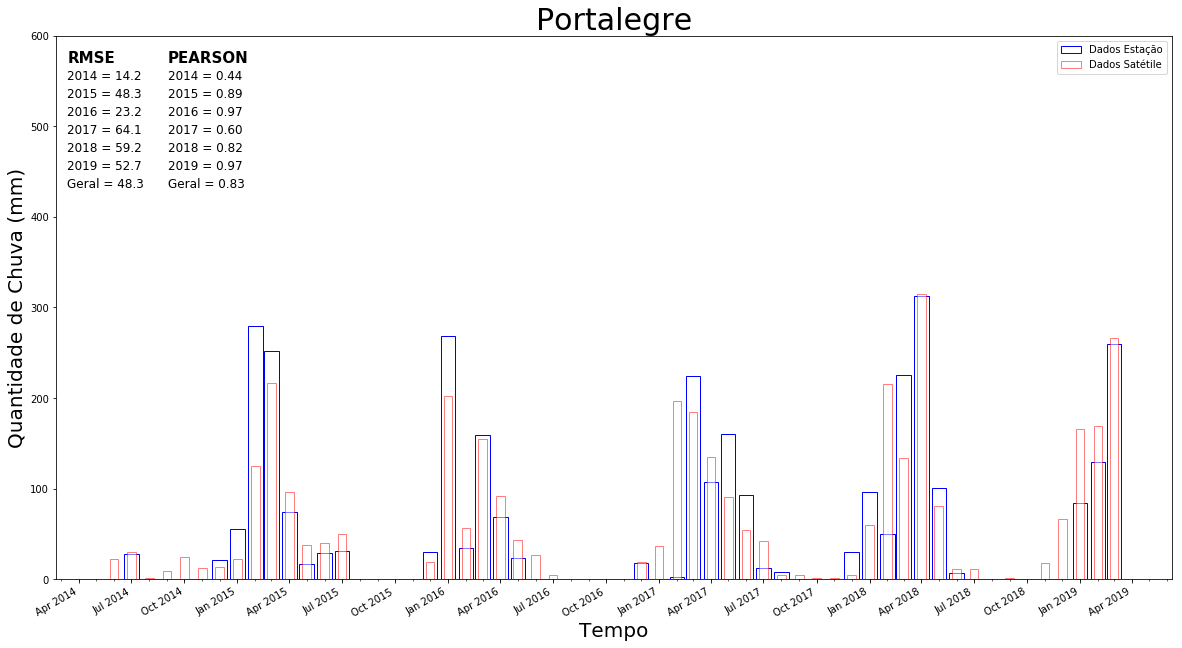

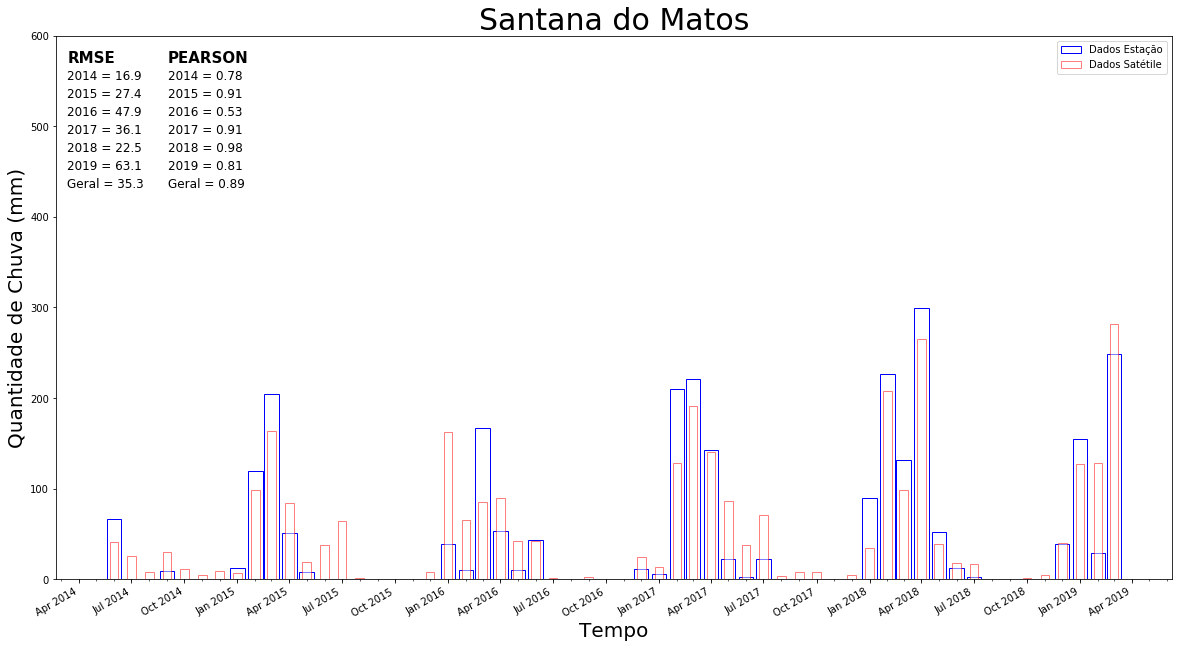

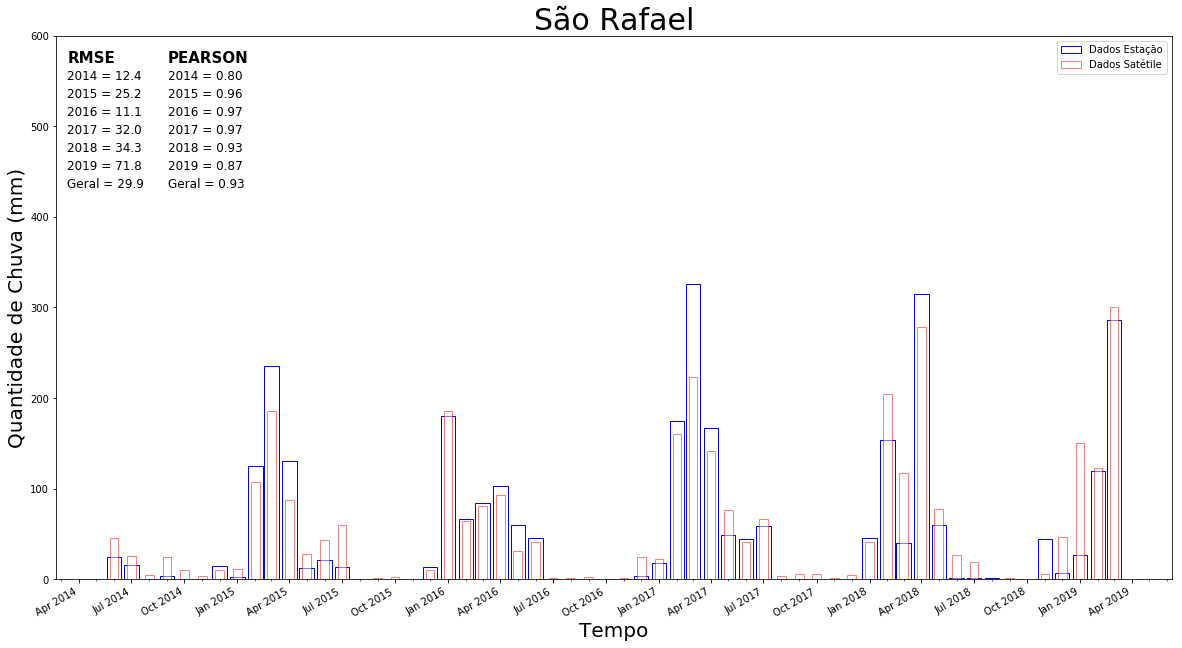

In [28]:
#Gráfico Geral Anual
for i,j in enumerate(lista_estacoes):
    #Puxando valores somente para a estação Acari
    satelite = dest[dest['Estacao'] == j]
    estacao = dcol[dcol['Estação'] == j]

    satelite["Mes"] = satelite["Mes"].astype(str)
    satelite["Ano"] = satelite["Ano"].astype(str)

    estacao["Mês"] = estacao["Mês"].astype(str)
    estacao["Ano"] = estacao["Ano"].astype(str)

    satelite['tempo'] = satelite['Ano']+'-'+satelite['Mes']
    estacao['tempo'] = estacao['Ano']+'-'+estacao['Mês']

    # Convert date strings (e.g. 2014-10) to datetime
    dates_satelite = [datetime.strptime(d, "%Y-%m") for d in satelite['tempo']]
    dates_estacao = [datetime.strptime(d, "%Y-%m") for d in estacao['tempo']]
    
    # Calculando o RMSE por ano:
    
    RMSE_lst = []
    PEARSON_lst = []

    for x,ano in enumerate(sorted(list(set(estacao["Ano"])))):
        dado_anual_est = estacao['Dados'][estacao['Ano'] == ano]
        dado_anual_sat = satelite[' dados'][satelite['Ano'] == ano]
        
        RMSE_lst.append([ano,rmse(np.array(dado_anual_sat),np.array(dado_anual_est))])
        PEARSON_lst.append([ano,dado_anual_sat.corr(dado_anual_est)])
        
     # Calculando o RMSE Geral:
    
    dado_geral_est = estacao['Dados']
    dado_geral_sat = satelite[' dados']
        
    RMSE_geral = rmse(np.array(dado_geral_sat),np.array(dado_geral_est))
    PEARSON_geral = dado_geral_sat.corr(dado_geral_est)

    
    #Criando a figura:
    fig, ax = plt.subplots(figsize=(20,10))

    #Editando valores e tipo de plot:
    #ax.plot(dates_estacao, estacao['Dados'],color='k', linewidth=4, label='Dados Estação')
    #ax.scatter(dates_estacao, estacao['Dados'],color='k')
    
    # ok ax.bar(dates_estacao, estacao['Dados'],width=25,align='center',color='k',label='Dados Estação')
    ax.bar(dates_estacao, estacao['Dados'],width=25,align='center',color='white',label='Dados Estação', edgecolor='blue')
    
    #ax.plot(dates_satelite, satelite[' dados'],color='r', linestyle=':',linewidth=2, markersize=12,label='Dados Satétile')
    #ax.scatter(dates_satelite, satelite[' dados'],color='r',label='Dados Satétile')
    #ok ax.bar(dates_satelite, satelite[' dados'],width=25,align='center',color='gray',alpha=0.5,label='Dados Satétile')
    ax.bar(dates_satelite, satelite[' dados'],width=15,align='center',color='white',alpha=0.5,label='Dados Satétile', edgecolor='red')

    #plotando resultado do RMSE:
    ax.text(0.01,0.95,'RMSE', ha='left', color='k',fontsize=15,weight='bold', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='none'))
    
    for k,l in enumerate(RMSE_lst):
        ax.text(0.01,0.92-(k/30), l[0]+' = '+str(l[1])[:4], ha='left', color='k',fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='none'))
    ax.text(0.01,0.92-((k+1)/30), 'Geral = '+str(RMSE_geral)[:4], ha='left', color='k',fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='none'))

 
    #plotando resultado do Índice de correlação de Pearson:
    ax.text(0.1,0.95,'PEARSON', ha='left', color='k',fontsize=15,weight='bold', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='none'))
    
    for k,l in enumerate(PEARSON_lst):
        ax.text(0.1,0.92-(k/30), l[0]+' = '+str(l[1])[:4], ha='left', color='k',fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='none'))
    ax.text(0.1,0.92-((k+1)/30), 'Geral = '+str(PEARSON_geral)[:4], ha='left', color='k',fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='none'))

    
    #Pearson total 
    #ax.text(0.1,0.92, str(satelite[' dados'].corr(estacao['Dados']))[0:4], ha='left', color='k',fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='none'))


   
    #Editar eixos:
    ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=3))
    ax.get_xaxis().set_minor_locator(mdates.MonthLocator(interval=1))
    ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_xlabel('Tempo',fontsize=20)
    ax.set_title(j,fontsize=30)
    ax.set_ylim(0,600)

    ax.set_ylabel('Quantidade de Chuva (mm)',fontsize=20)

    plt.legend(loc='upper right')

    os.makedirs('Figuras', exist_ok=True)

    plt.savefig('Figuras_Novas/Anual_'+j+'.png', dpi=200, facecolor='w', edgecolor='w',orientation='landscape')
    #plt.savefig('nome_da_imagem.png'`, transparent = True)
    
    
    
    

         Acari
#Equação
0.0 [0.62272226]
#R2
0.5230631922799367
#Correlação de Pearson
0.7250634073120519


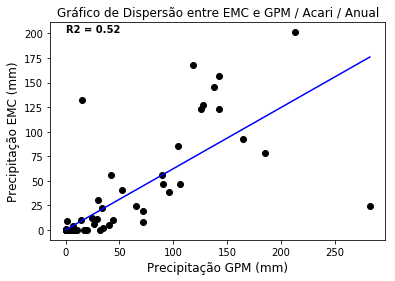



         Angicos
#Equação
0.0 [0.82849768]
#R2
0.7460137189974645
#Correlação de Pearson
0.8642378438863602


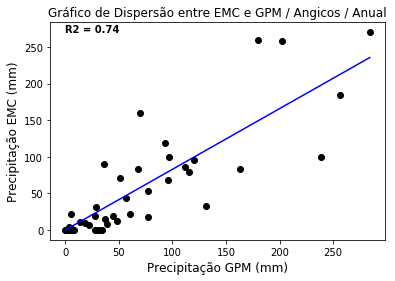



         Assu - Emater
#Equação
0.0 [0.77859426]
#R2
0.7560505088926128
#Correlação de Pearson
nan


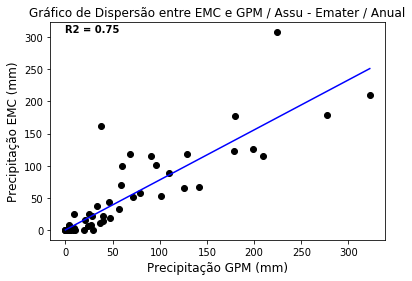



         Assu - Particular
#Equação
0.0 [0.63313172]
#R2
0.7274984338416541
#Correlação de Pearson
nan


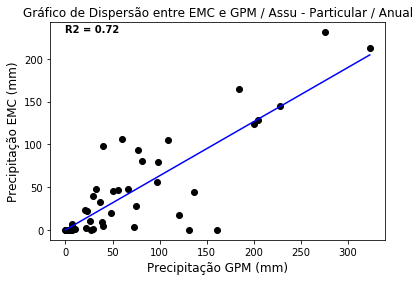



         Baía Formosa
#Equação
0.0 [0.96958113]
#R2
0.5870640701377728
#Correlação de Pearson
0.7756143518644836


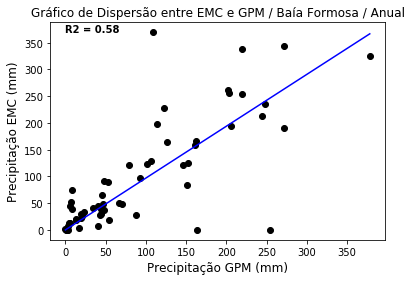



         Caicó - Açude Itans
#Equação
0.0 [0.90409395]
#R2
0.9008598704264539
#Correlação de Pearson
nan


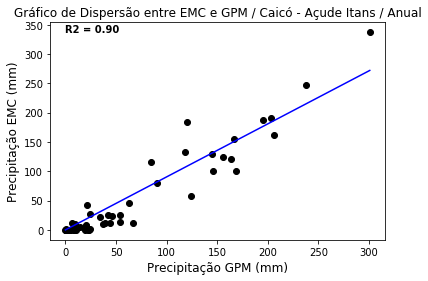



         Caicó - Açude Mundo Novo
#Equação
0.0 [0.68926096]
#R2
0.8695738215876814
#Correlação de Pearson
nan


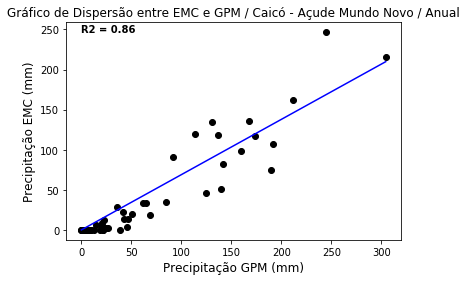



         Caicó - Emater
#Equação
0.0 [0.81717989]
#R2
0.7610091634151488
#Correlação de Pearson
0.879658699749959


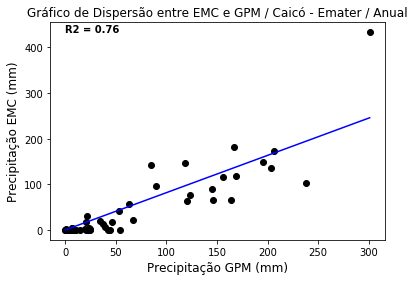



         Cruzeta
#Equação
0.0 [0.75060831]
#R2
0.7720021939934412
#Correlação de Pearson
0.8786540674977238


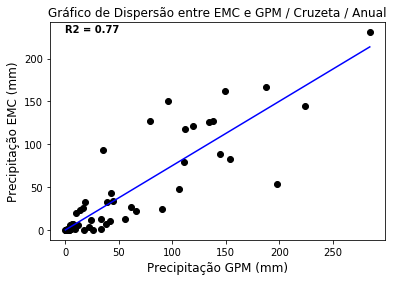



         Extremoz
#Equação
0.0 [0.83958945]
#R2
0.6926302765094303
#Correlação de Pearson
0.8355273498709119


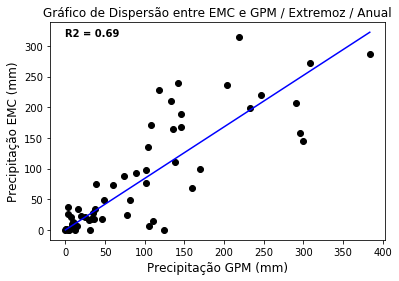



         Ipanguaçu - Base Física EMPARN
#Equação
0.0 [0.69104688]
#R2
0.6558807048859217
#Correlação de Pearson
nan


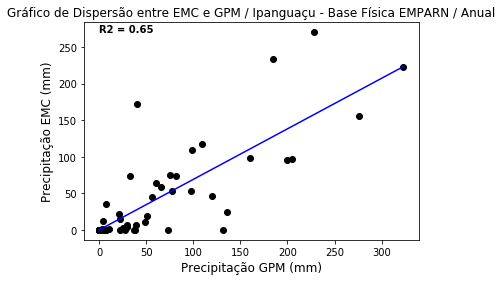



         Ipanguaçu - Emater
#Equação
0.0 [0.6949077]
#R2
0.687054249724558
#Correlação de Pearson
nan


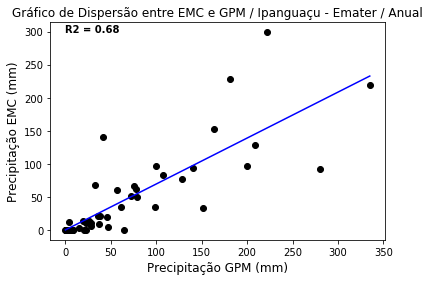



         Itajá
#Equação
0.0 [0.75602457]
#R2
0.7356945666223025
#Correlação de Pearson
0.8599673988649017


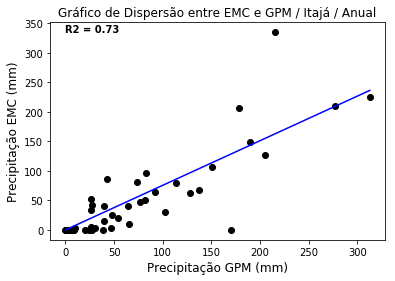



         João Camara
#Equação
0.0 [0.63915609]
#R2
0.814296622739805
#Correlação de Pearson
0.9033506350324337


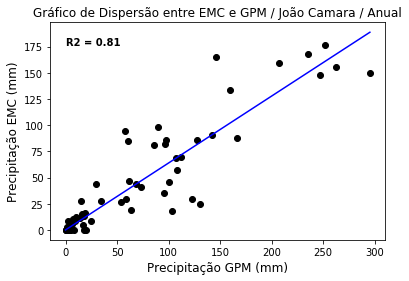



         Jucurutu
#Equação
0.0 [0.87319108]
#R2
0.8270949384649684
#Correlação de Pearson
0.9118168897452914


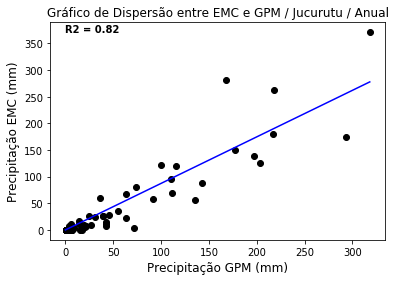



         Lajes
#Equação
0.0 [0.45906425]
#R2
0.5512053066627387
#Correlação de Pearson
0.7427329549717969


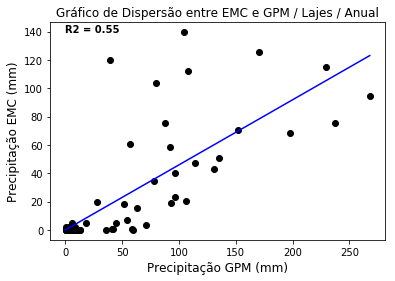



         Martins
#Equação
0.0 [1.4723883]
#R2
0.8901734183503061
#Correlação de Pearson
0.9466997437807168


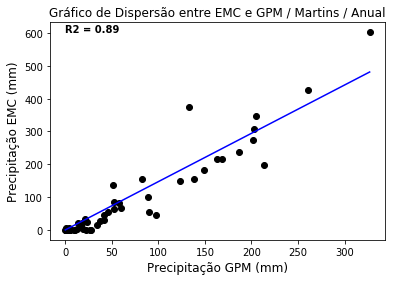



         Mossoró
#Equação
0.0 [0.78413864]
#R2
0.7653541062899558
#Correlação de Pearson
0.8777307952350292


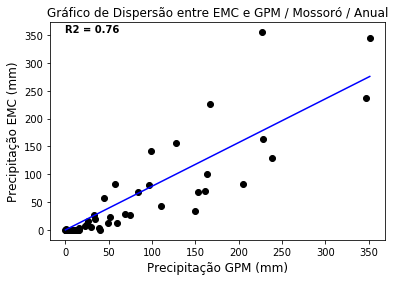



         Natal
#Equação
0.0 [1.25957339]
#R2
0.7724986503798289
#Correlação de Pearson
0.8951255010213851


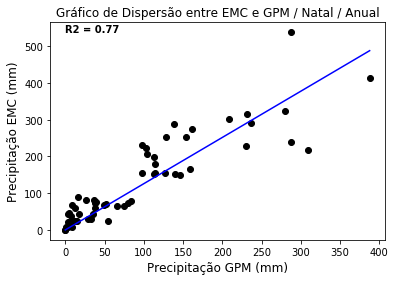



         Parnamirim
#Equação
0.0 [1.25827968]
#R2
0.8320950981884363
#Correlação de Pearson
0.9169074827825969


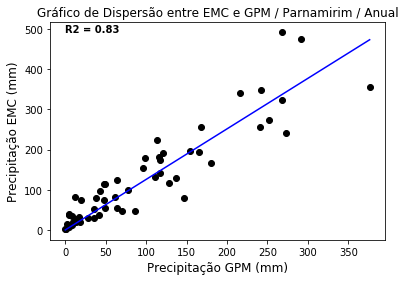



         Pau dos Ferros
#Equação
0.0 [0.6865207]
#R2
0.7692418310697888
#Correlação de Pearson
0.8774626090432684


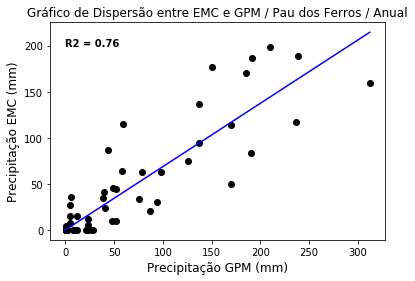



         Portalegre
#Equação
0.0 [0.92117555]
#R2
0.6930957097298456
#Correlação de Pearson
0.8325422958931468


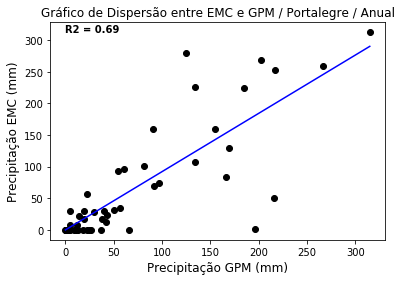



         Santana do Matos
#Equação
0.0 [0.96063025]
#R2
0.7905535715054169
#Correlação de Pearson
0.892111868588171


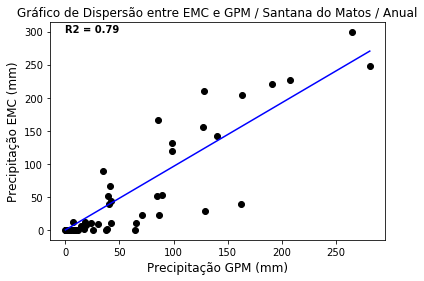



         São Rafael
#Equação
0.0 [0.99893057]
#R2
0.8650564156409155
#Correlação de Pearson
0.9322658496466079


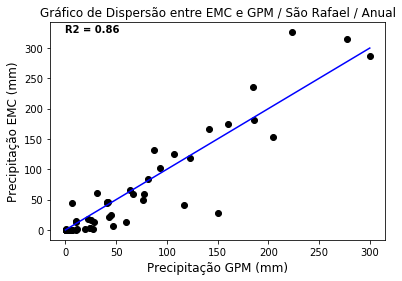

In [18]:
#Gráfico de Dispersão Anual
for i,j in enumerate(lista_estacoes):
    #Puxando valores somente para cada estação
    satelite = dest[dest['Estacao'] == j]
    estacao = dcol[dcol['Estação'] == j]

    x = satelite[' dados']
    y = estacao['Dados']


    modelo = linear_model.LinearRegression(fit_intercept=False, normalize=False)

    xl= np.array(x)
    xl = xl.reshape((-1, 1))

    #print(xl)
    #print(y)

    modelo.fit(xl,y)
    print(bold+'         '+j+reset)
    print(bold+'#Equação'+reset)
    print(modelo.intercept_,modelo.coef_)
    x1=np.array([0.,max(satelite[' dados'])])
    y1=modelo.intercept_+modelo.coef_*x1
    
    print(bold+'#R2'+reset)
    print(modelo.score(xl,y))
    
    #Índice de correlação de Pearson
    print(bold+'#Correlação de Pearson'+reset)
    print(x.corr(y))
    

    plt.scatter(x, y, c='black')
    plt.title('Gráfico de Dispersão entre EMC e GPM / '+j+' / Anual',fontsize=12)
    
   # plt.legend([modelo.score(xl,y) ,' = R2'], loc=2)   

        
    plt.xlabel('Precipitação GPM (mm)',fontsize=12)
    plt.ylabel('Precipitação EMC (mm)',fontsize=12)
    plt.plot(x1,y1, color='blue')

    #PLOTANDO O VALOR DE R2 NO GRÁFICO
    plt.text(0,max(y),'R2 = '+str(modelo.score(xl,y))[0:4], ha='left', color='k',fontsize=10,weight='bold')
    
    #plt.savefig('Figuras/dispersao_teste.png', dpi=300, facecolor='w',edgecolor='w', orientation='portrait')
    plt.savefig('Figuras_Novas/'+j+'_dispersao_anual.png', dpi=300, facecolor='w', edgecolor='w',orientation='landscape')

    plt.show()
    print()
    print()


In [19]:
semestre_1_dest = ['01','02','03','04','05','06']
semestre_2_dest = ['07','08','09','10','11','12']

semestre_1_dcol = [1,2,3,4,5,6]
semestre_2_dcol = [7,8,9,10,11,12]

In [20]:
satelite1 = dest[dest['Estacao'] == 'Acari']


In [21]:
#a = satelite1[satelite1['Mes'].isin(semestre_1_dest)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

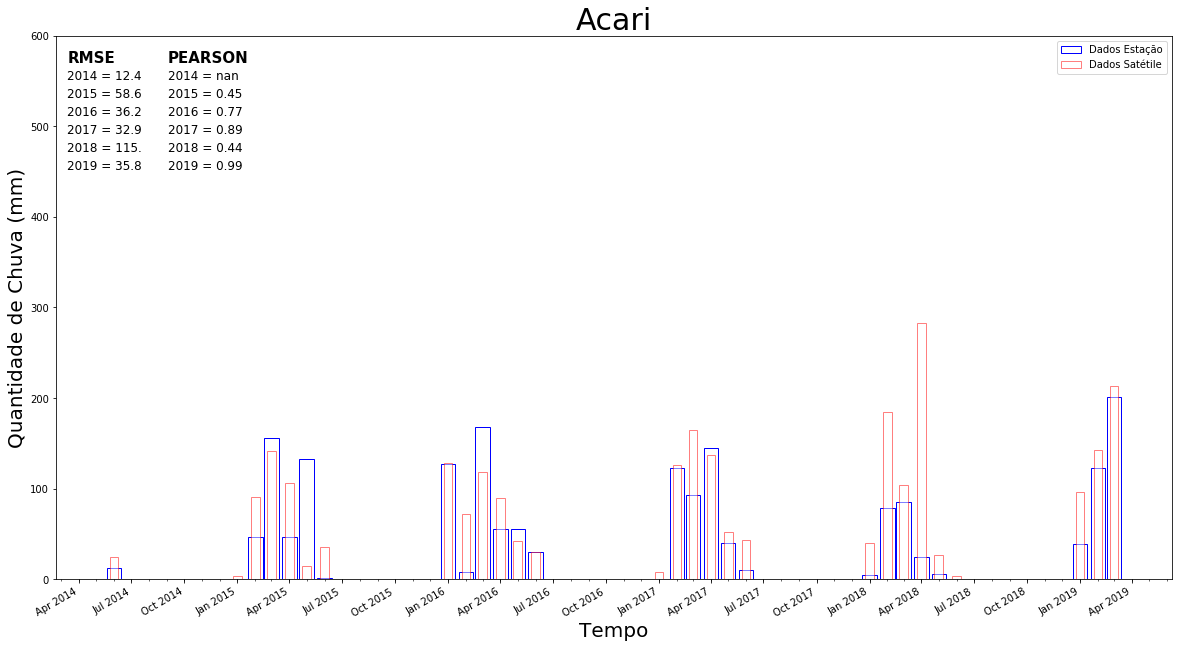

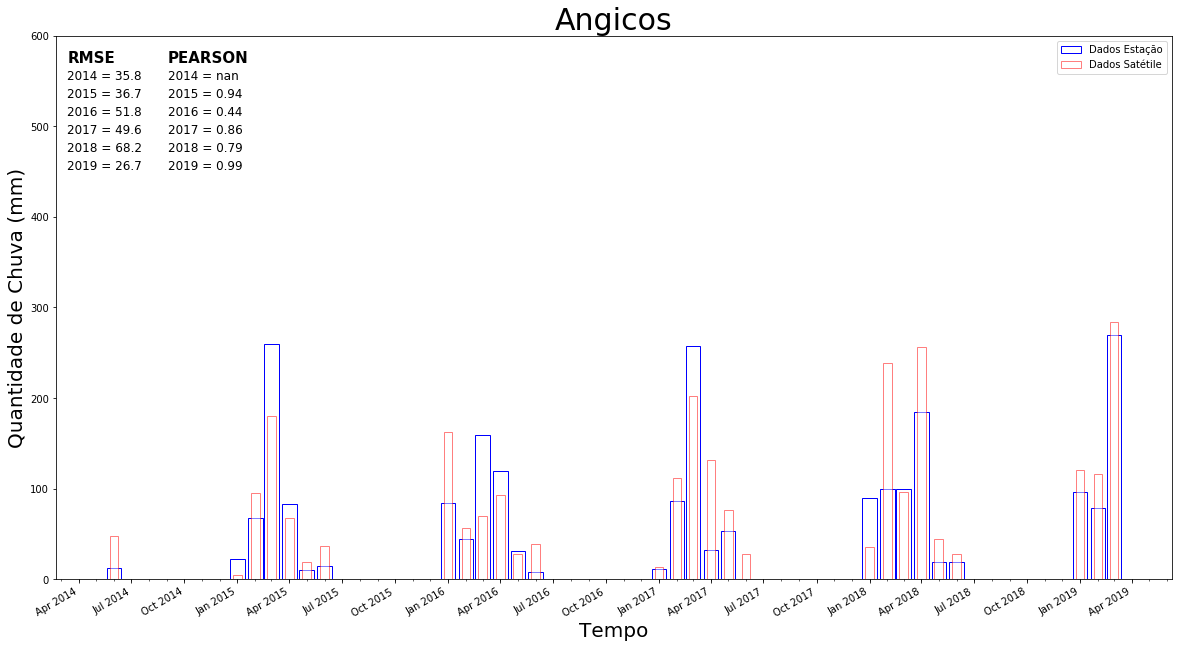

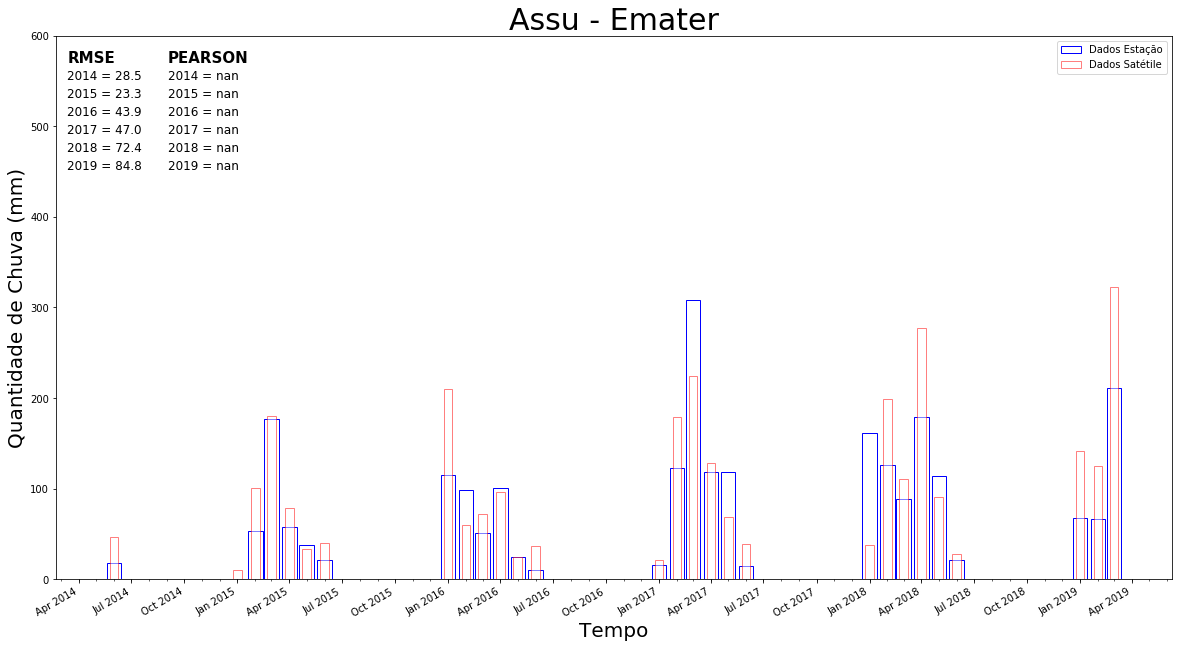

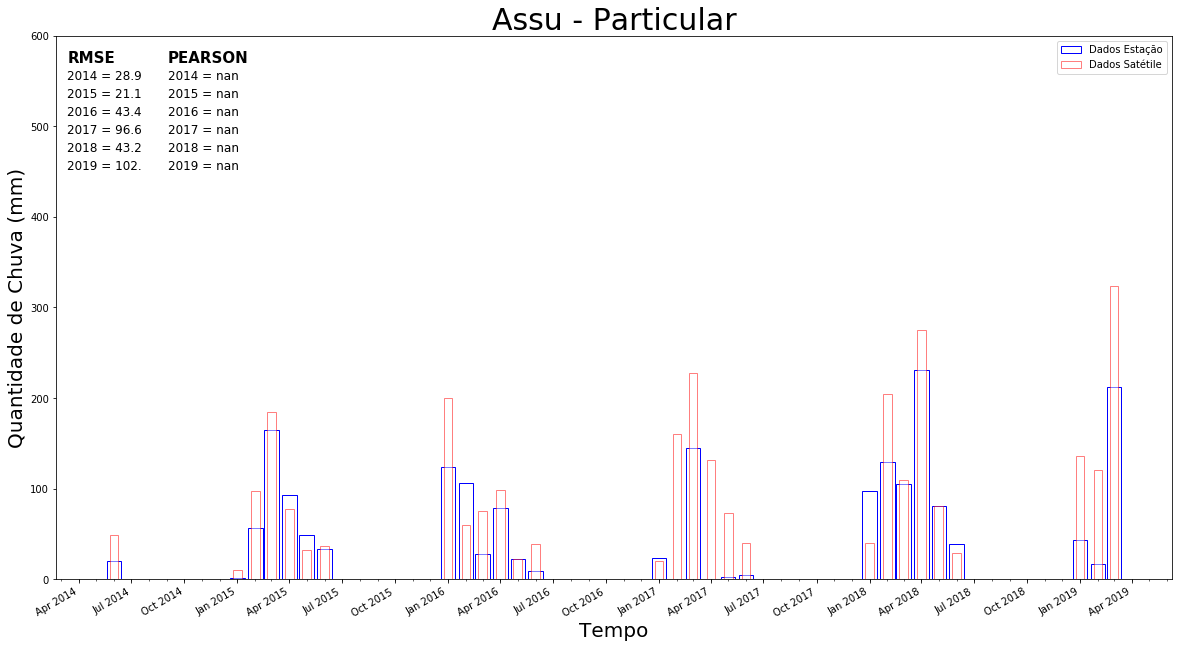

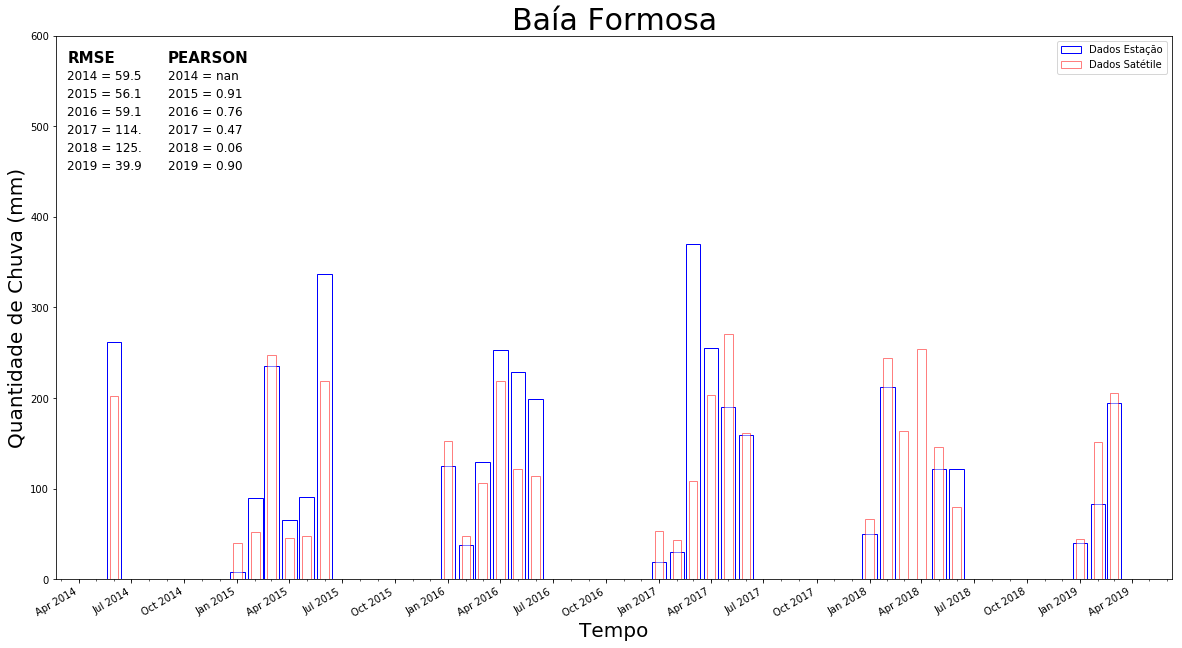

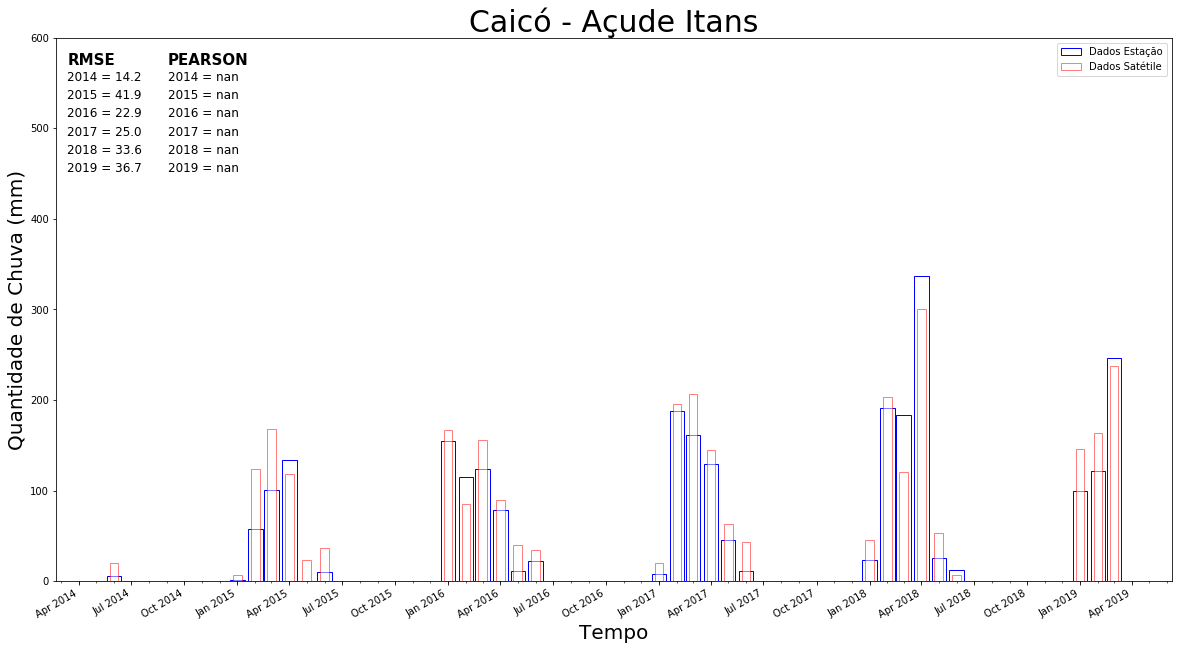

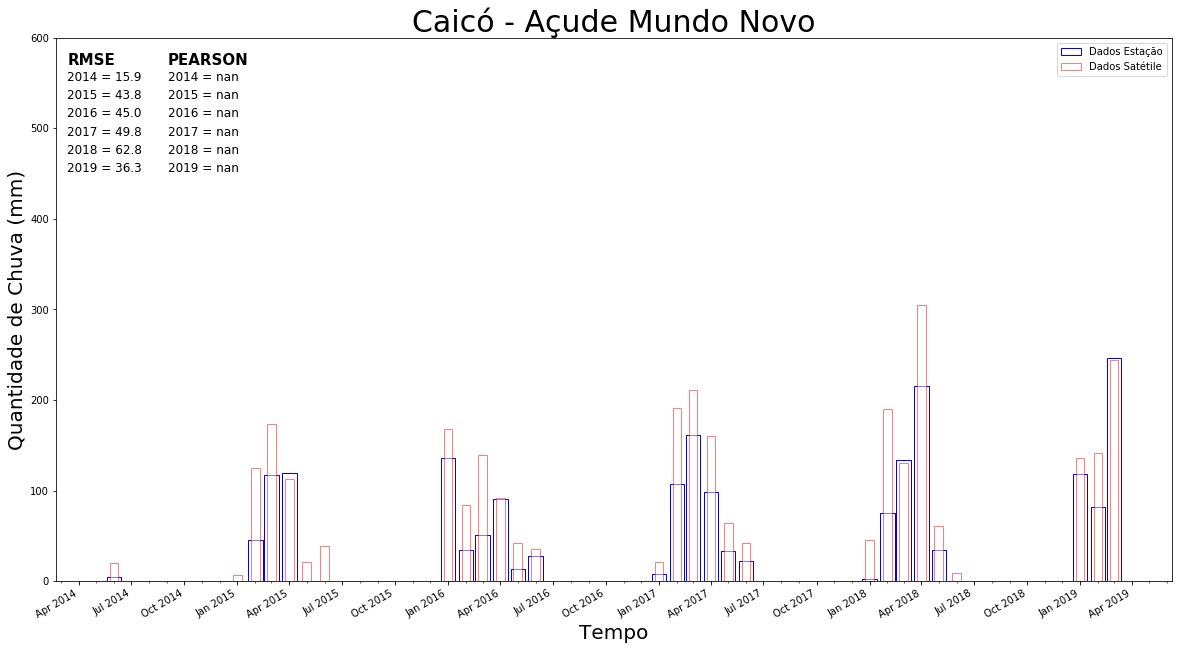

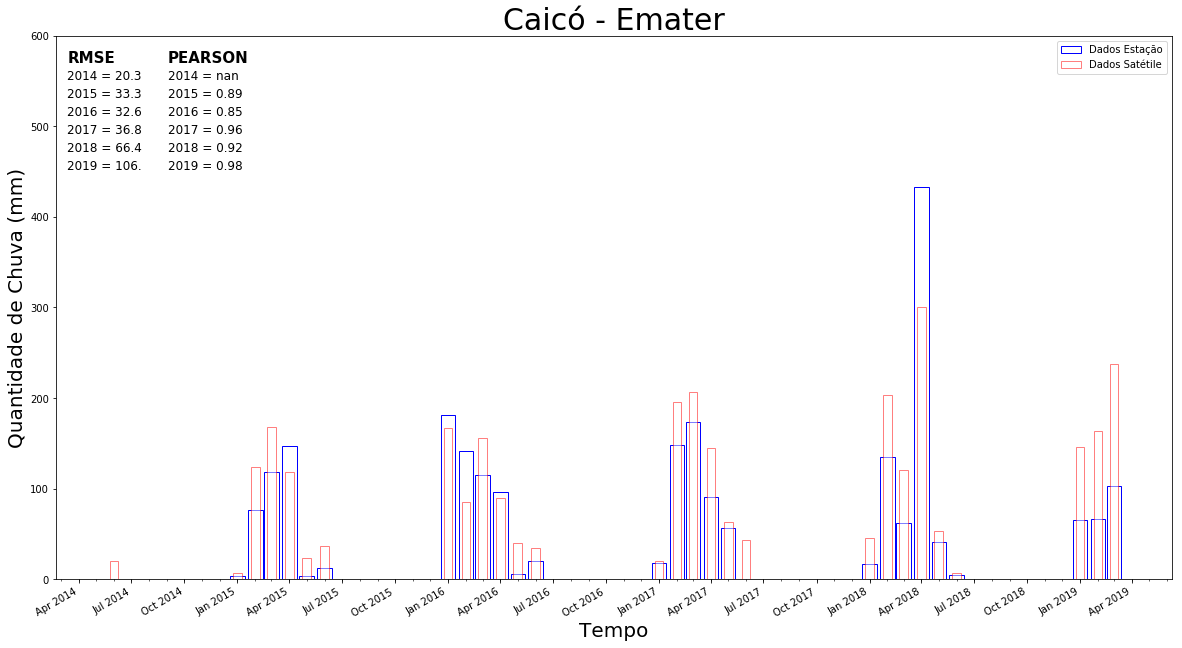

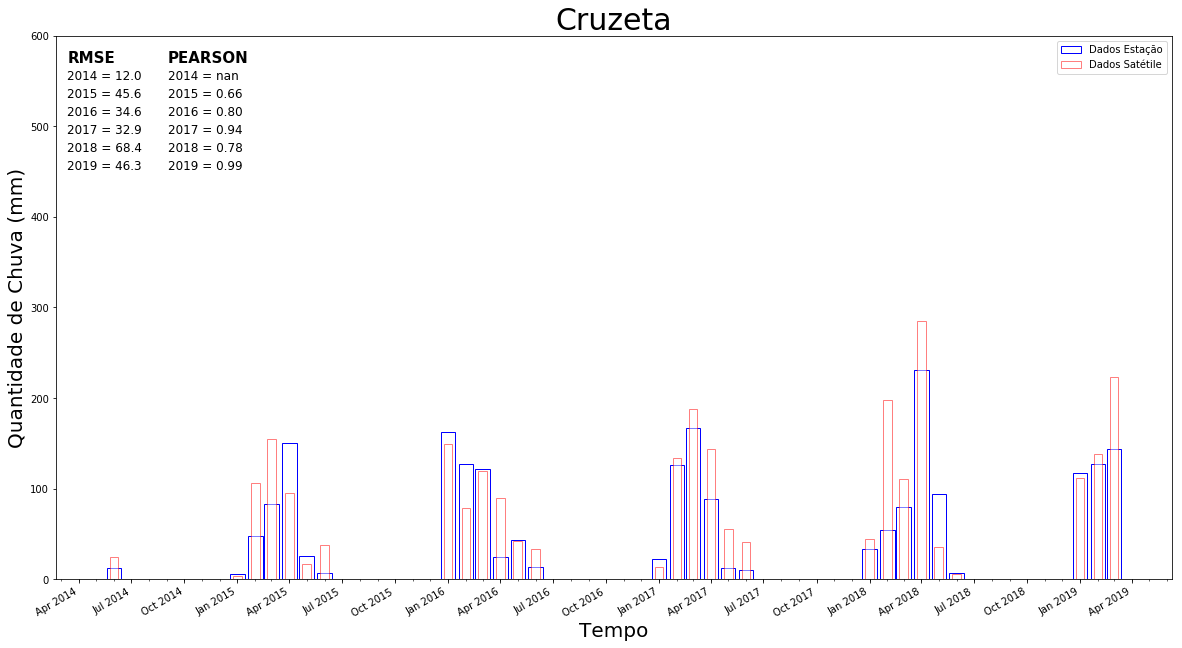

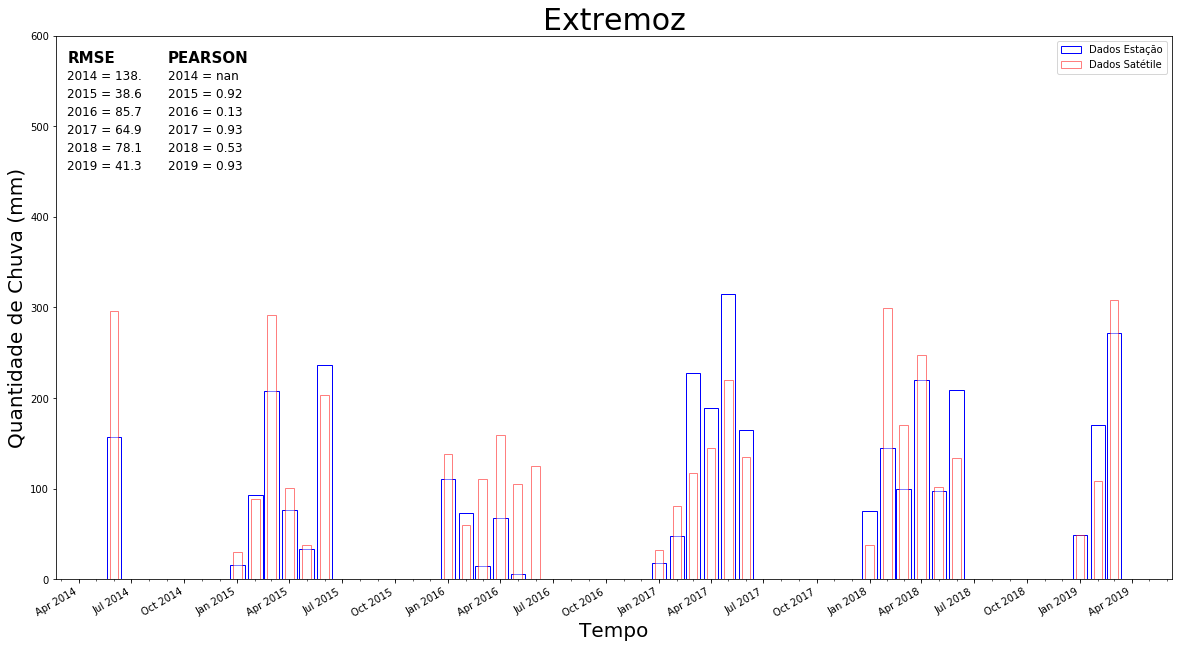

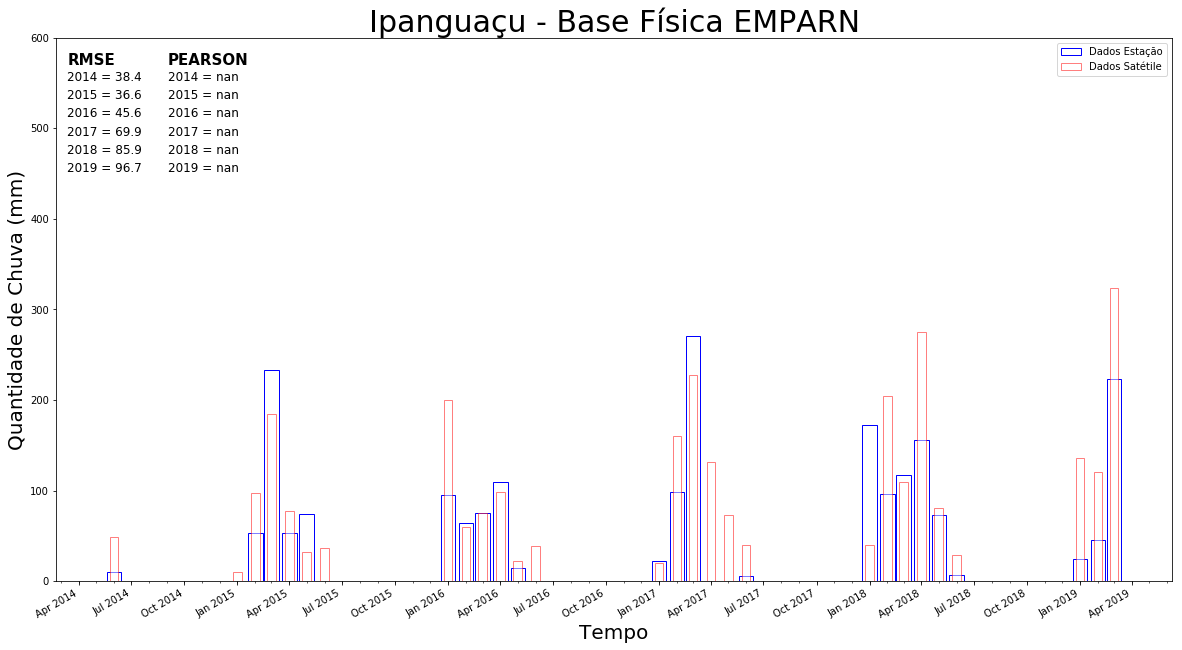

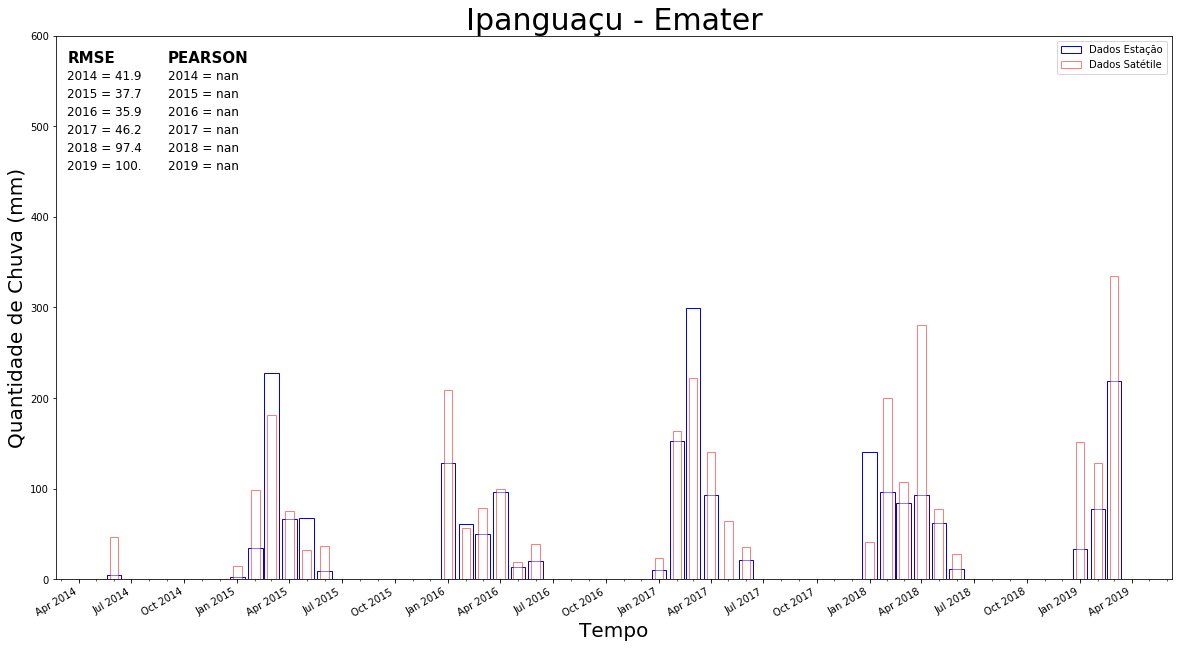

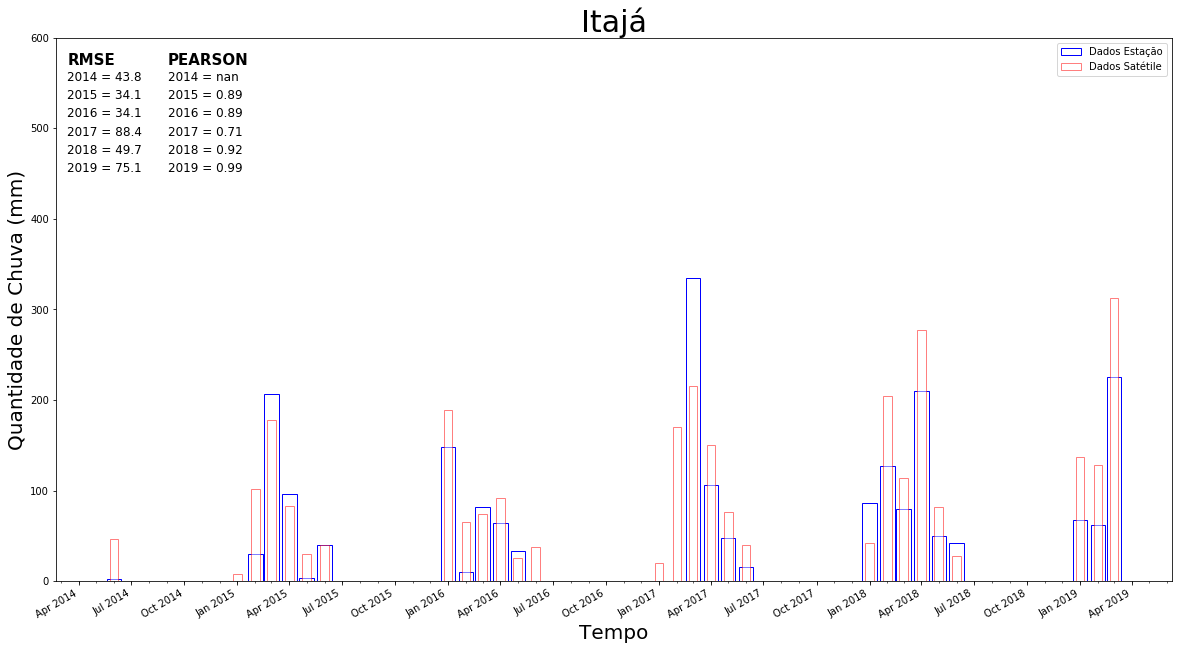

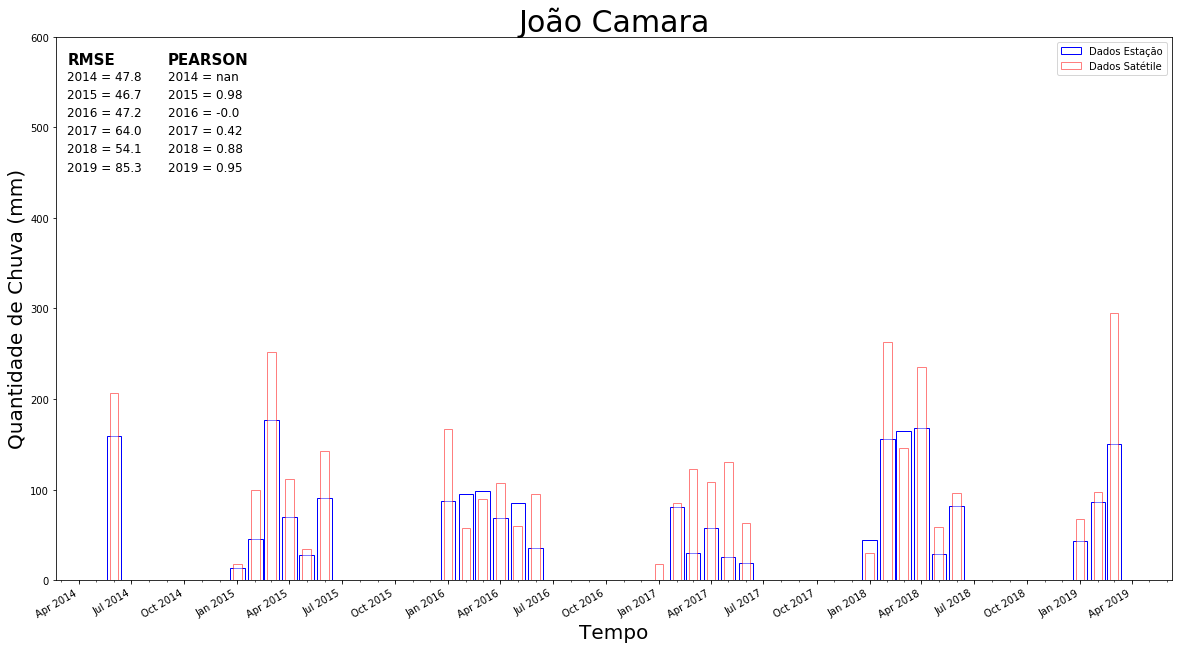

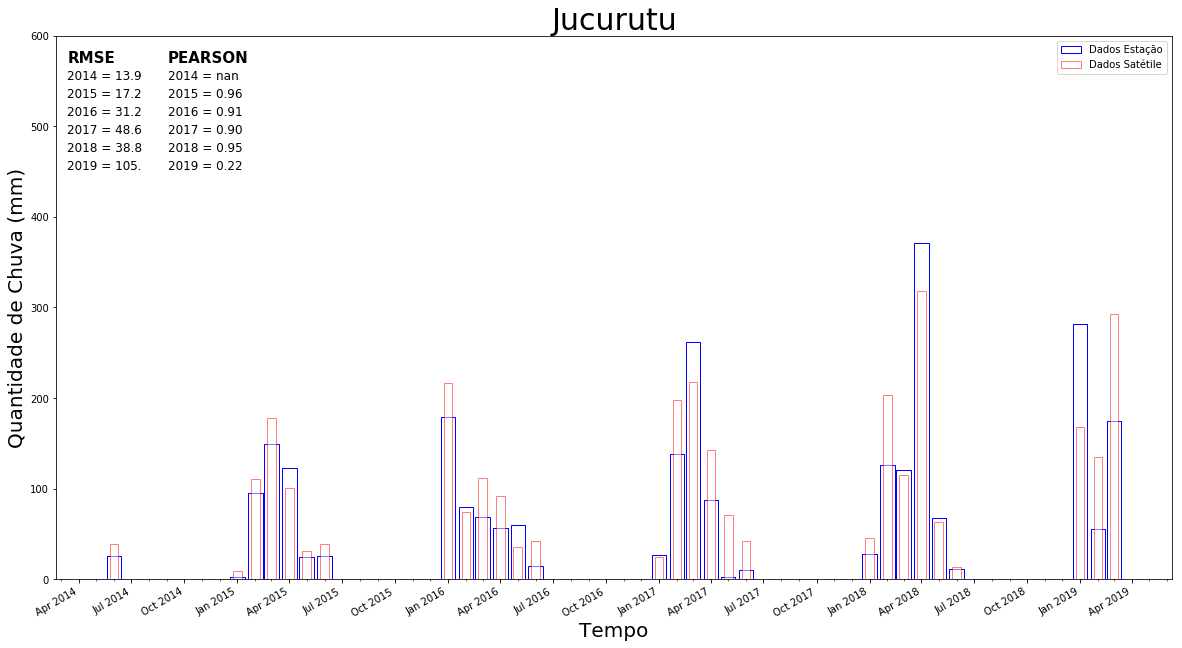

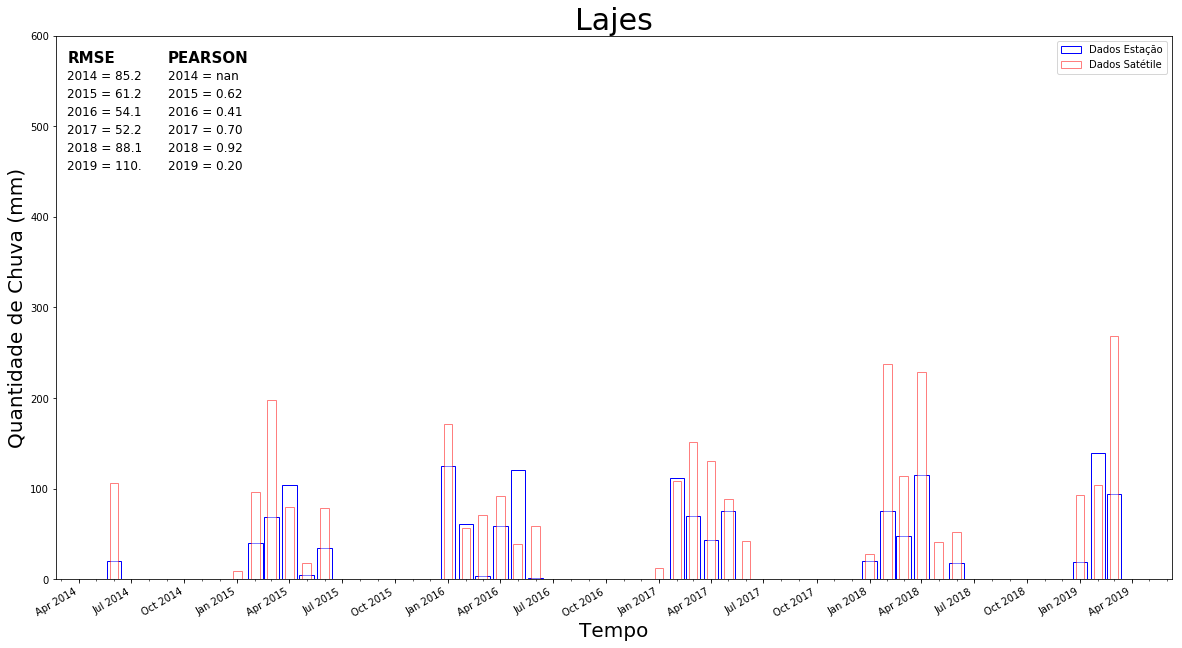

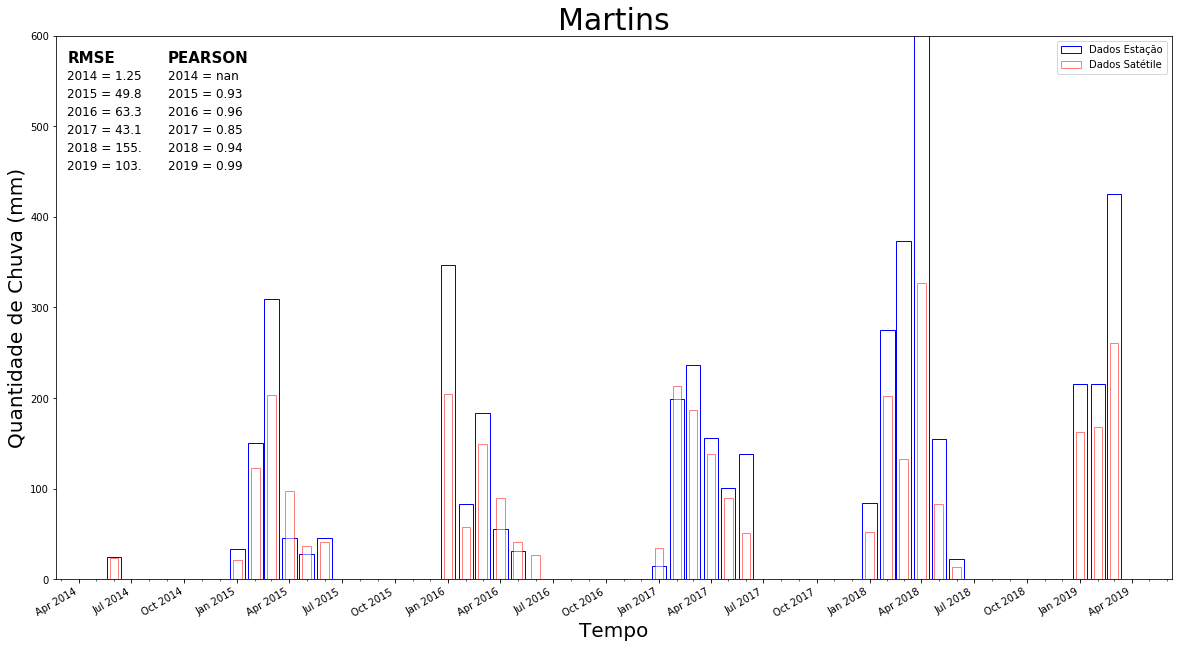

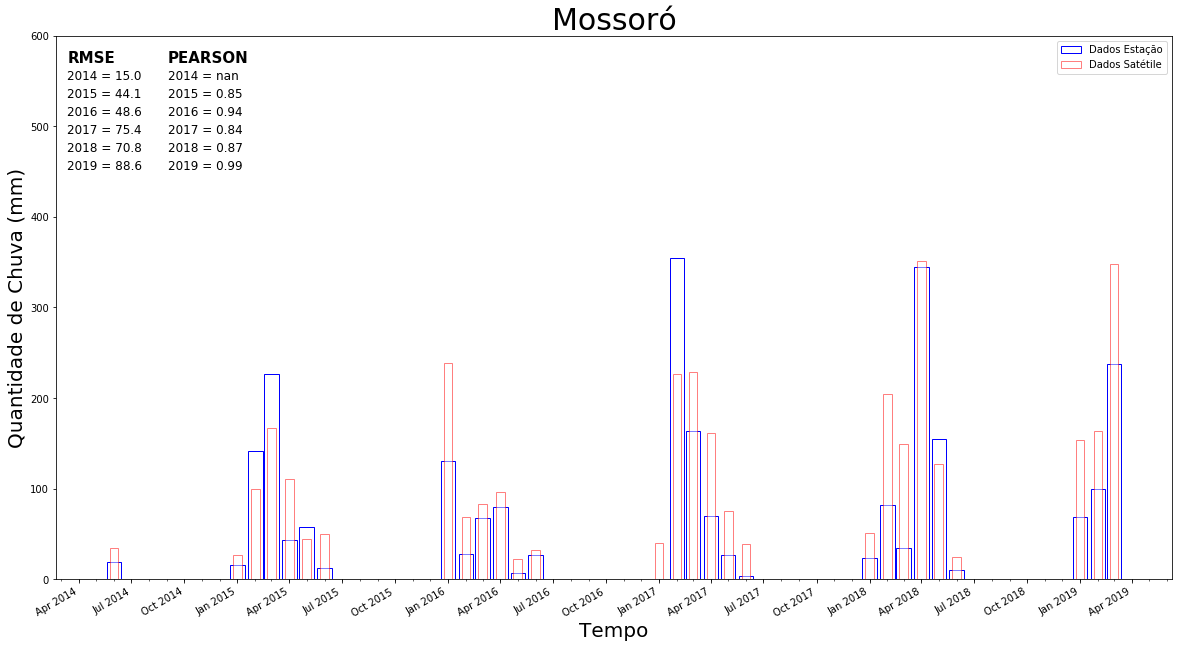

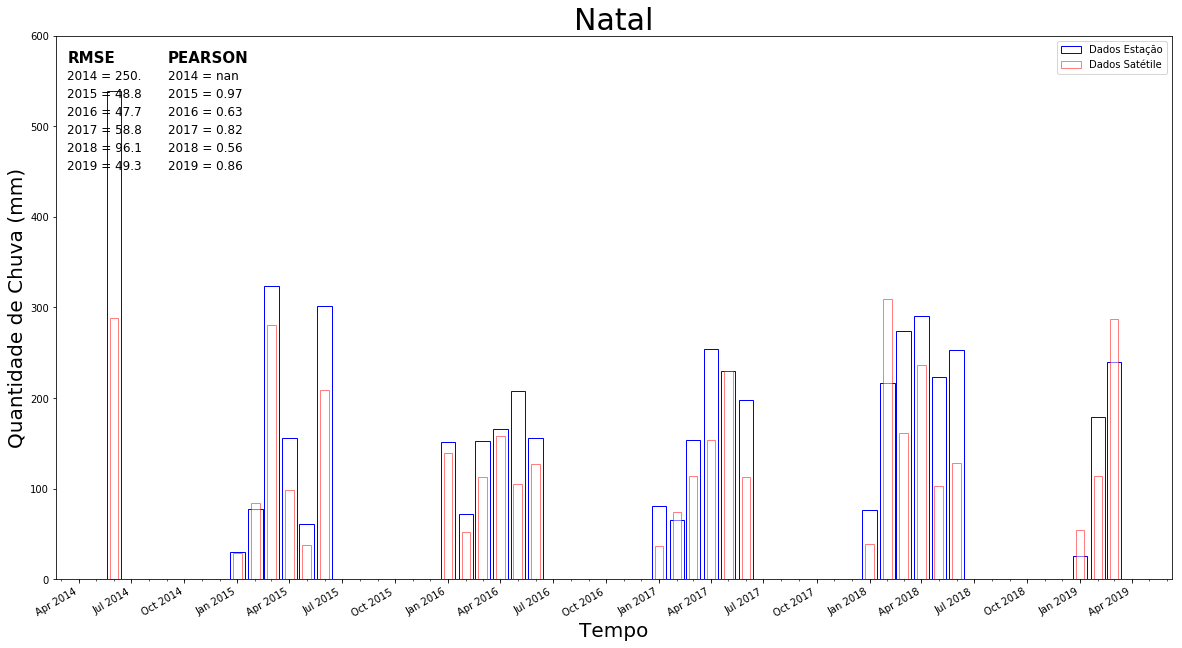

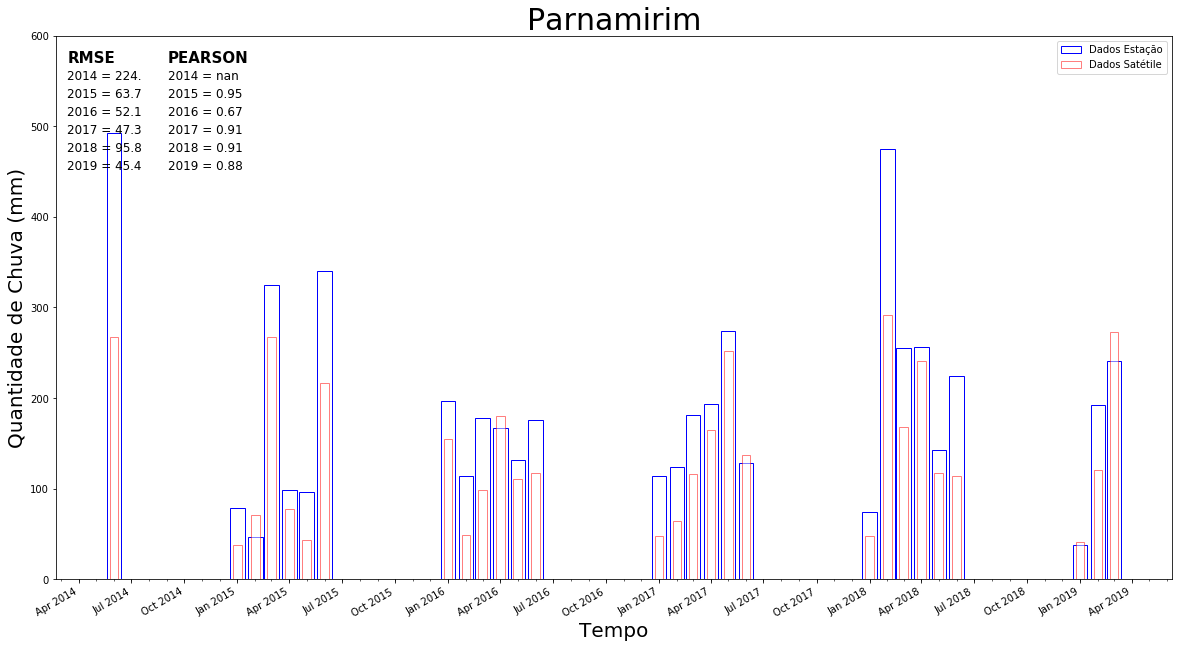

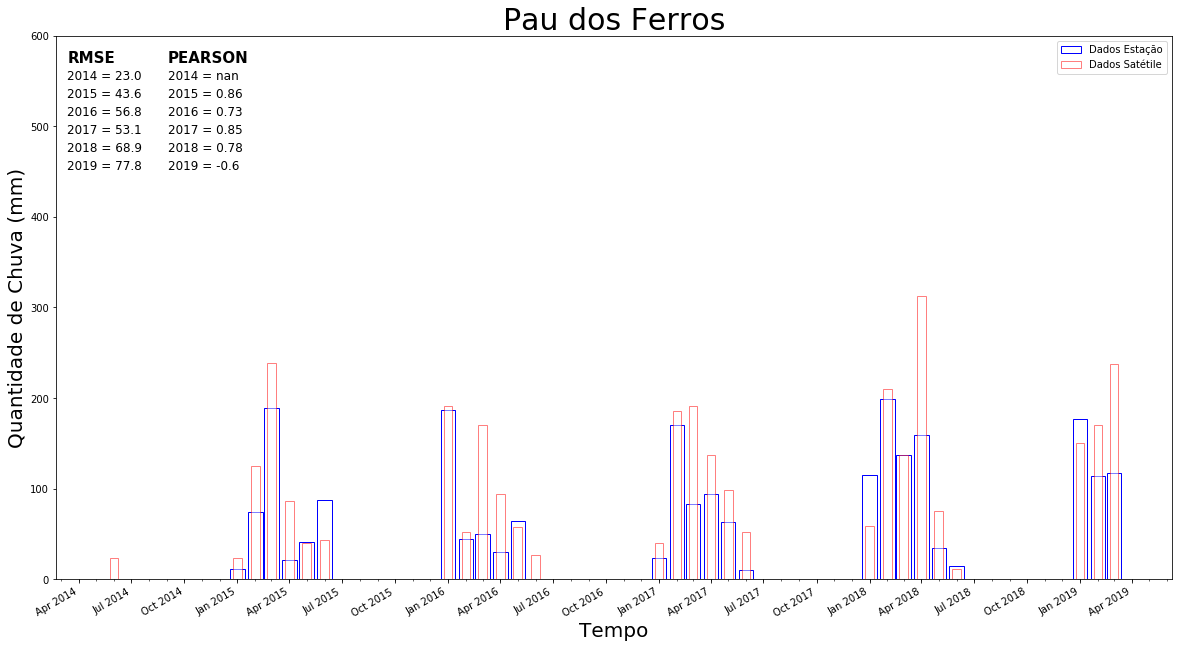

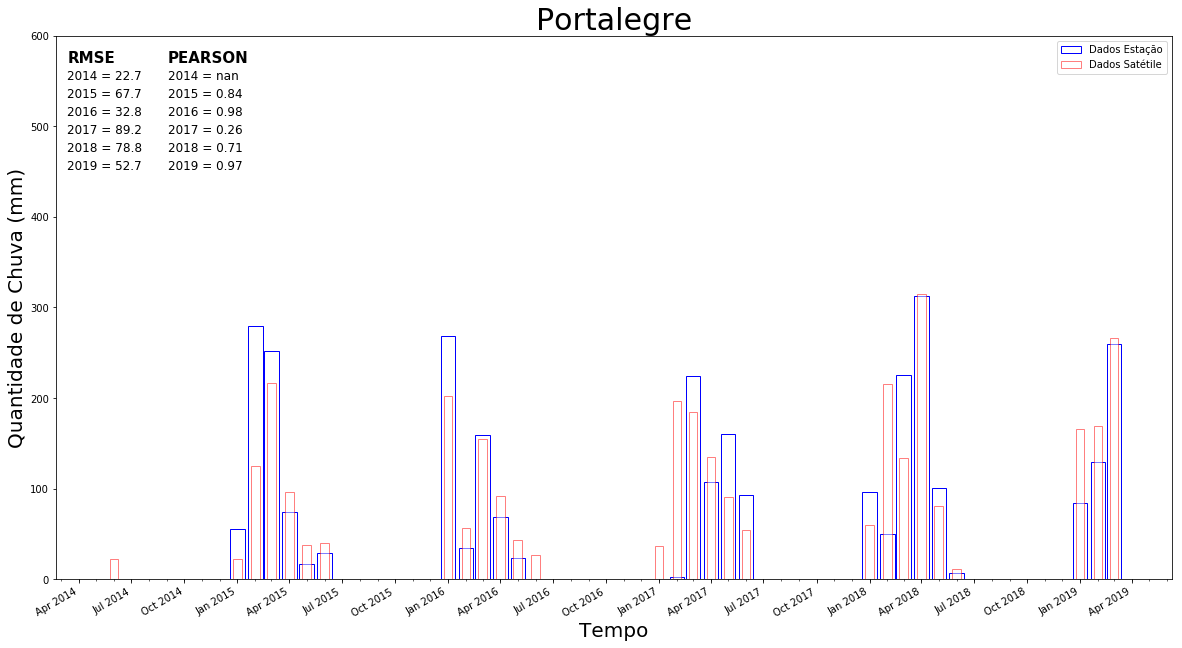

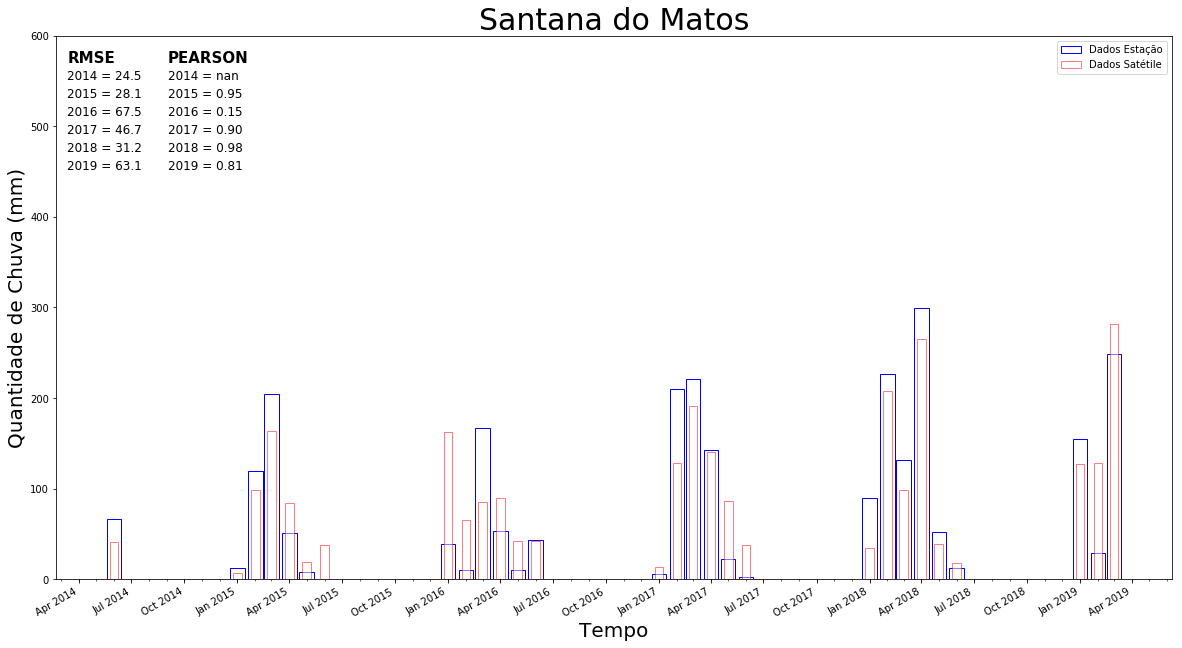

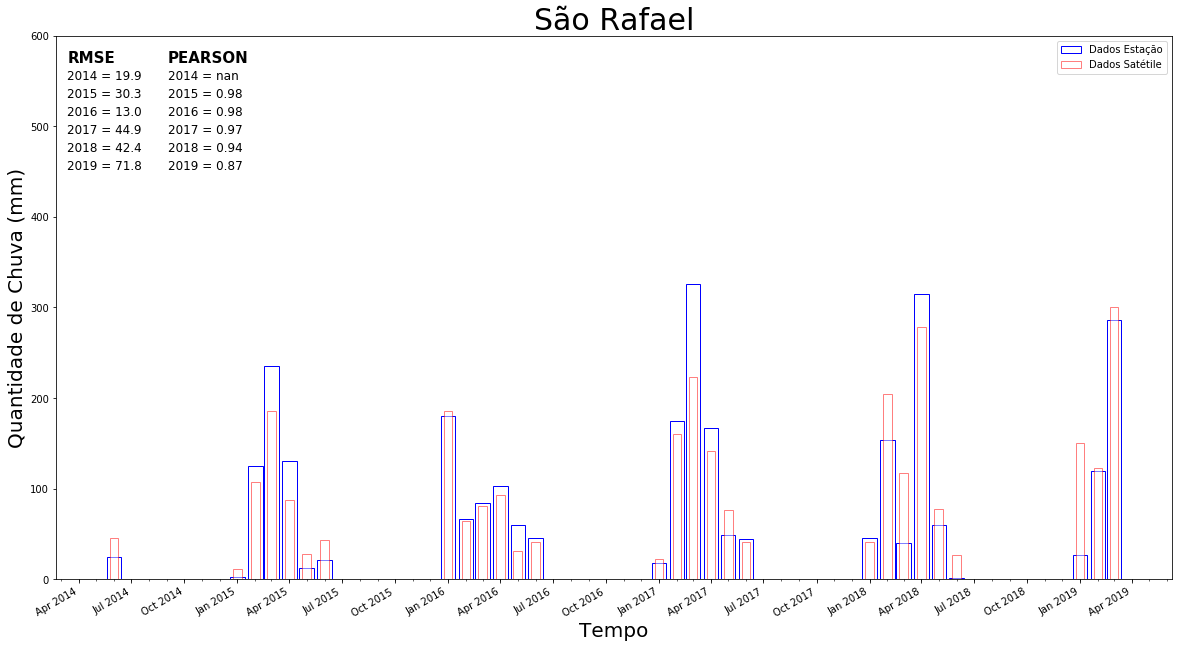

In [22]:
#Gráfico Geral 1º Semestre Teste
semestre_1_dest = ['01','02','03','04','05','06']

semestre_1_dcol = [1,2,3,4,5,6]

for i,j in enumerate(lista_estacoes):
    #Puxando valores somente para cada estação
    satelite1 = dest[dest['Estacao'] == j]
    satelite = satelite1[satelite1['Mes'].isin(semestre_1_dest)]

    estacao1 = dcol[dcol['Estação'] == j]
    estacao = estacao1[estacao1['Mês'].isin(semestre_1_dest)]

    satelite["Mes"] = satelite["Mes"].astype(str)
    satelite["Ano"] = satelite["Ano"].astype(str)

    estacao["Mês"] = estacao["Mês"].astype(str)
    estacao["Ano"] = estacao["Ano"].astype(str)

    satelite['tempo'] = satelite['Ano']+'-'+satelite['Mes']
    estacao['tempo'] = estacao['Ano']+'-'+estacao['Mês']

        # Convert date strings (e.g. 2014-10) to datetime
    dates_satelite = [datetime.strptime(d, "%Y-%m") for d in satelite['tempo']]
    dates_estacao = [datetime.strptime(d, "%Y-%m") for d in estacao['tempo']]
    
    # Calculando o RMSE:
    
        
    RMSE_lst = []
    PEARSON_lst = []

    for x,ano in enumerate(sorted(list(set(estacao["Ano"])))):
        dado_anual_est = estacao['Dados'][estacao['Ano'] == ano]
        dado_anual_sat = satelite[' dados'][satelite['Ano'] == ano]
        
        RMSE_lst.append([ano,rmse(np.array(dado_anual_sat),np.array(dado_anual_est))])
        PEARSON_lst.append([ano,dado_anual_sat.corr(dado_anual_est)])   

    #Criando a figura:
    fig, ax = plt.subplots(figsize=(20,10))

    #Editando valores e tipo de plot:
    #ax.plot(dates_estacao, estacao['Dados'],color='k', linewidth=4, label='Dados Estação')
    #ax.scatter(dates_estacao, estacao['Dados'],color='k',label='Dados Estação')
    ax.bar(dates_estacao, estacao['Dados'],width=25,align='center',color='white',label='Dados Estação', edgecolor='blue')

    #ax.plot(dates_satelite, satelite[' dados'],color='r', linestyle=':',linewidth=2, markersize=12,label='Dados Satétile')
    #ax.scatter(dates_satelite, satelite[' dados'],color='r',label='Dados Satétile')
    ax.bar(dates_satelite, satelite[' dados'],width=15,align='center',color='white',alpha=0.5,label='Dados Satétile', edgecolor='red')

    #plotando resultado do RMSE:
    ax.text(0.01,0.95,'RMSE', ha='left', color='k',fontsize=15,weight='bold', transform=ax.transAxes)
    

    for k,l in enumerate(RMSE_lst):
        ax.text(0.01,0.92-(k/30), l[0]+' = '+str(l[1])[:4], ha='left', color='k',fontsize=12, transform=ax.transAxes)
        
        
    #plotando resultado do Índice de correlação de Pearson:
    ax.text(0.1,0.95,'PEARSON', ha='left', color='k',fontsize=15,weight='bold', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='none'))
    
    for k,l in enumerate(PEARSON_lst):
        ax.text(0.1,0.92-(k/30), l[0]+' = '+str(l[1])[:4], ha='left', color='k',fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='none'))

    
    #Pearson total 
    #ax.text(0.1,0.92, str(satelite[' dados'].corr(estacao['Dados']))[0:4], ha='left', color='k',fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='none'))
    
    
    #Editar eixos:
    ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=3))
    ax.get_xaxis().set_minor_locator(mdates.MonthLocator(interval=1))
    ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_xlabel('Tempo',fontsize=20)
    ax.set_title(j,fontsize=30)
    ax.set_ylim(0,600)

    ax.set_ylabel('Quantidade de Chuva (mm)',fontsize=20)

    plt.legend(loc='upper right')
    
    plt.savefig('Figuras_Novas/1Sem_'+j+'.png', dpi=200, facecolor='w', edgecolor='w',orientation='landscape')



         Acari
#Equação
20.667601923319644 [0.48920723]
#R2
0.3156222945588506
#Correlação de Pearson
0.5618027185399251


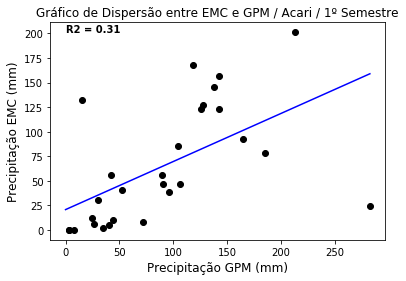



         Angicos
#Equação
4.148637960024587 [0.81790024]
#R2
0.6408931877911578
#Correlação de Pearson
0.8005580477336779


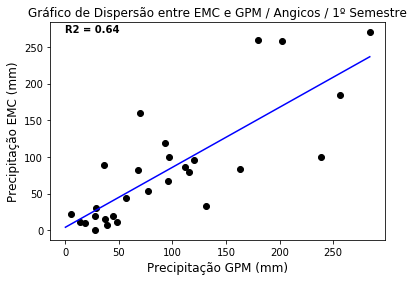



         Assu - Emater
#Equação
16.832118821711873 [0.67967399]
#R2
0.6094548004531339
#Correlação de Pearson
nan


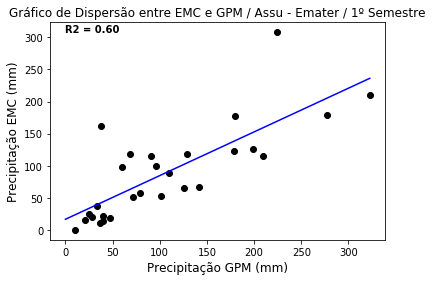



         Assu - Particular
#Equação
4.66153732914583 [0.60497443]
#R2
0.5879903065663735
#Correlação de Pearson
nan


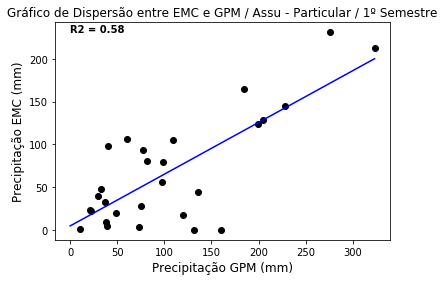



         Baía Formosa
#Equação
41.88224984740181 [0.71691551]
#R2
0.2825384304118359
#Correlação de Pearson
0.5315434416977001


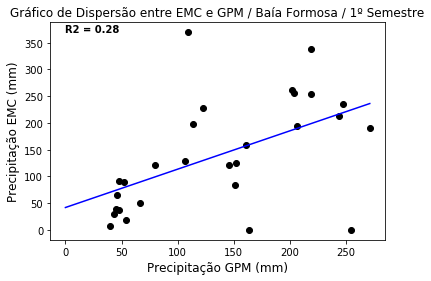



         Caicó - Açude Itans
#Equação
-18.18365495668276 [1.0296199]
#R2
0.8899956764313293
#Correlação de Pearson
nan


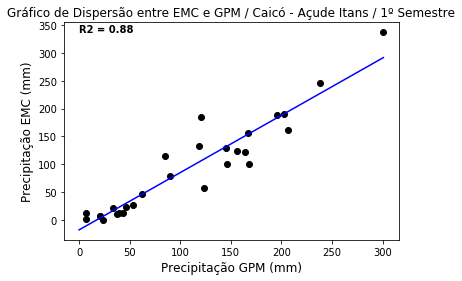



         Caicó - Açude Mundo Novo
#Equação
-14.074923614721627 [0.78673271]
#R2
0.8333774261829529
#Correlação de Pearson
nan


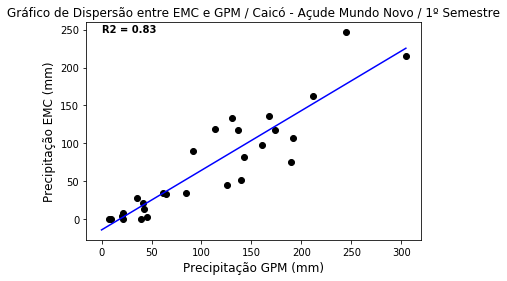



         Caicó - Emater
#Equação
-19.19750305388868 [0.95133707]
#R2
0.6998534399829165
#Correlação de Pearson
0.8365724355863732


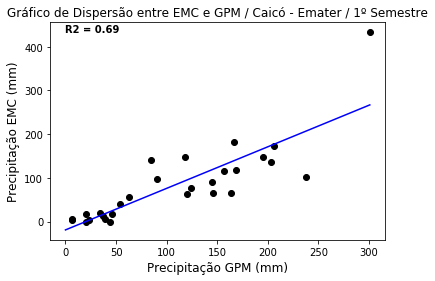



         Cruzeta
#Equação
9.726127497814005 [0.69580711]
#R2
0.6438390027462265
#Correlação de Pearson
0.8023957893372982


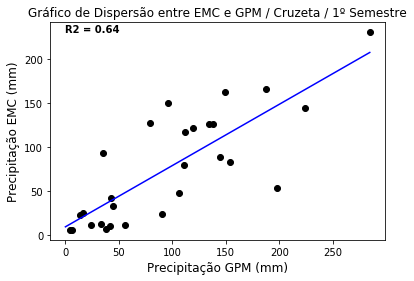



         Extremoz
#Equação
21.406506896992397 [0.71039673]
#R2
0.4682056739909378
#Correlação de Pearson
0.6842555618998926


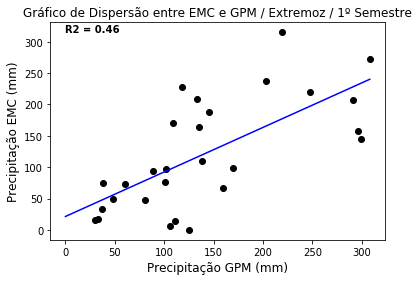



         Ipanguaçu - Base Física EMPARN
#Equação
4.628062109865439 [0.66597262]
#R2
0.5109033125749105
#Correlação de Pearson
nan


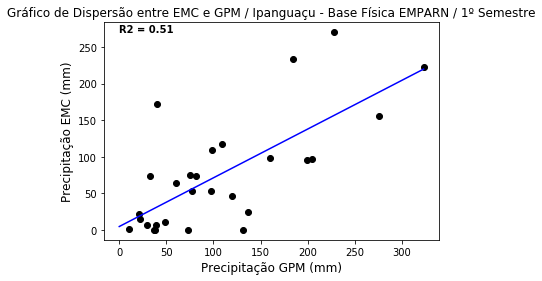



         Ipanguaçu - Emater
#Equação
8.53219296740754 [0.64922926]
#R2
0.5313068539676784
#Correlação de Pearson
nan


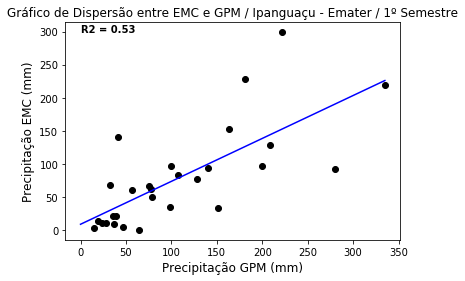



         Itajá
#Equação
-9.4499926296633 [0.81967401]
#R2
0.6393941041820803
#Correlação de Pearson
0.799621225444948


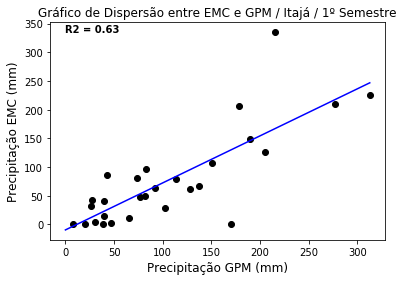



         João Camara
#Equação
11.536710779841968 [0.57255738]
#R2
0.6689009739924376
#Correlação de Pearson
0.8178636646730543


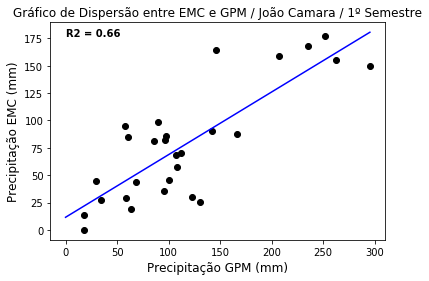



         Jucurutu
#Equação
-9.944922472063169 [0.94068352]
#R2
0.7531234985691223
#Correlação de Pearson
0.8678268828338532


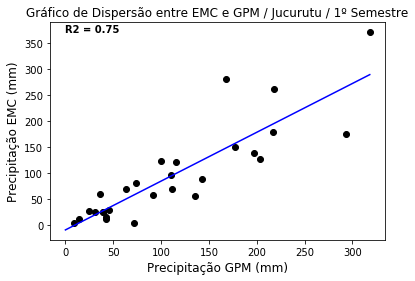



         Lajes
#Equação
15.54536268144949 [0.37331183]
#R2
0.3295680253232628
#Correlação de Pearson
0.5740801558347606


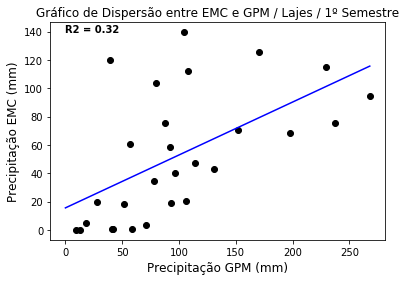



         Martins
#Equação
-26.106290494397967 [1.63406578]
#R2
0.8428218636751136
#Correlação de Pearson
0.9180533011079004


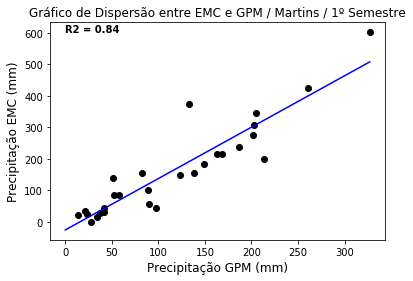



         Mossoró
#Equação
-15.65266526256427 [0.86838173]
#R2
0.6845035363684633
#Correlação de Pearson
0.8273472888506154


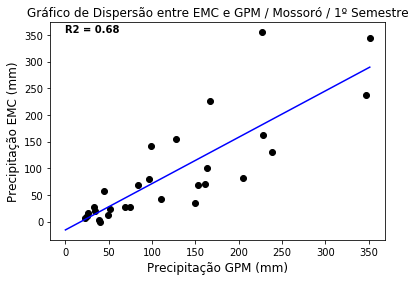



         Natal
#Equação
37.87824025798105 [1.05574688]
#R2
0.645353516064453
#Correlação de Pearson
0.8033389795500112


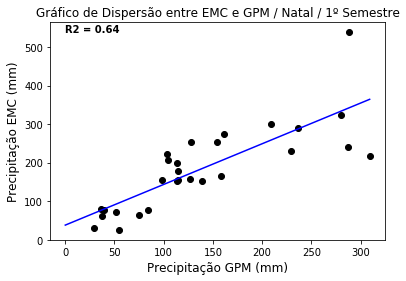



         Parnamirim
#Equação
22.448988133574574 [1.21599684]
#R2
0.7667466664392377
#Correlação de Pearson
0.8756407176686327


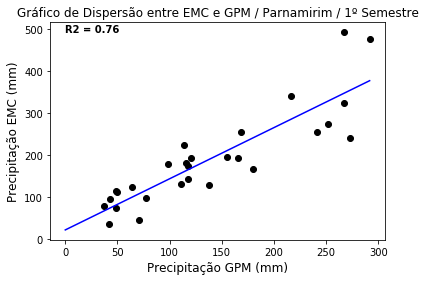



         Pau dos Ferros
#Equação
9.085224818199592 [0.63461861]
#R2
0.6275882473817802
#Correlação de Pearson
0.7922046751829859


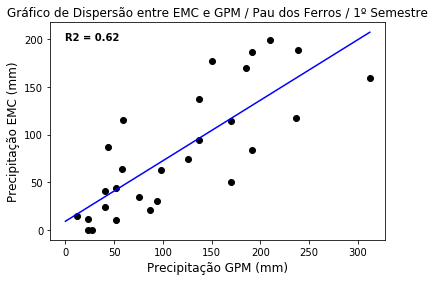



         Portalegre
#Equação
8.552136095558694 [0.88338011]
#R2
0.5323107088424821
#Correlação de Pearson
0.7295962642739354


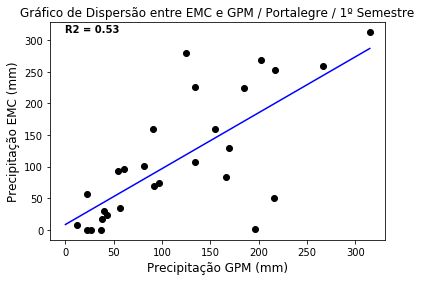



         Santana do Matos
#Equação
-6.236020830775487 [1.0246639]
#R2
0.7125038128827244
#Correlação de Pearson
0.8440994093604874


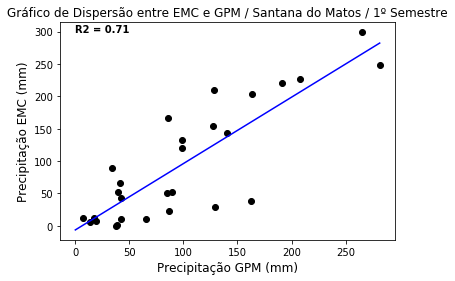



         São Rafael
#Equação
-11.152978994351656 [1.08095405]
#R2
0.817232412727609
#Correlação de Pearson
0.9040090777904882


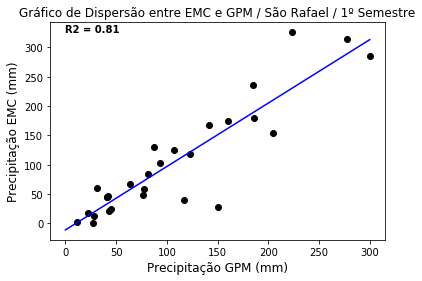

In [23]:
#Gráfico de Dispersão 1º Semestre
for i,j in enumerate(lista_estacoes):
    #Puxando valores somente para cada estação
    satelite1 = dest[dest['Estacao'] == j]
    satelite = satelite1[satelite1['Mes'].isin(semestre_1_dest)]

    estacao1 = dcol[dcol['Estação'] == j]
    estacao = estacao1[estacao1['Mês'].isin(semestre_1_dest)]
    
    x = satelite[' dados']
    y = estacao['Dados']


    modelo = linear_model.LinearRegression(fit_intercept=True, normalize=False)

    xl= np.array(x)
    xl = xl.reshape((-1, 1))

    #print(xl)
    #print(y)

    modelo.fit(xl,y)
    print(bold+'         '+j+reset)
    print(bold+'#Equação'+reset)
    print(modelo.intercept_,modelo.coef_)
    x1=np.array([0.,max(satelite[' dados'])])
    y1=modelo.intercept_+modelo.coef_*x1
    
    print(bold+'#R2'+reset)
    print(modelo.score(xl,y))
    
    #Índice de correlação de Pearson
    print(bold+'#Correlação de Pearson'+reset)
    print(x.corr(y))
    

    plt.scatter(x, y, c='black')
    plt.title('Gráfico de Dispersão entre EMC e GPM / '+j+' / 1º Semestre',fontsize=12)
    
   # plt.legend([modelo.score(xl,y) ,' = R2'], loc=2)   

        
    plt.xlabel('Precipitação GPM (mm)',fontsize=12)
    plt.ylabel('Precipitação EMC (mm)',fontsize=12)
    plt.plot(x1,y1, color='blue')
    
    #PLOTANDO O VALOR DE R2 NO GRÁFICO
    plt.text(0,max(y),'R2 = '+str(modelo.score(xl,y))[0:4], ha='left', color='k',fontsize=10,weight='bold')

    plt.savefig('Figuras_Novas/'+j+'_dispersao_1semestre.png', dpi=300, facecolor='w', edgecolor='w',orientation='landscape')
    plt.show()
    print()
    print()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

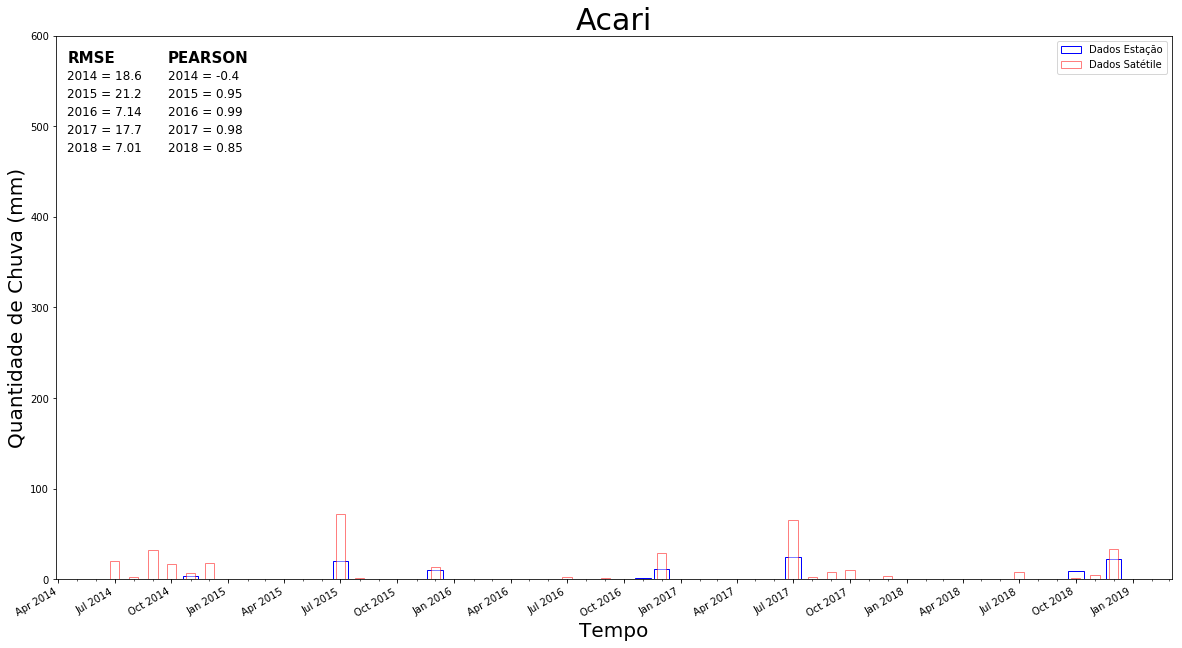

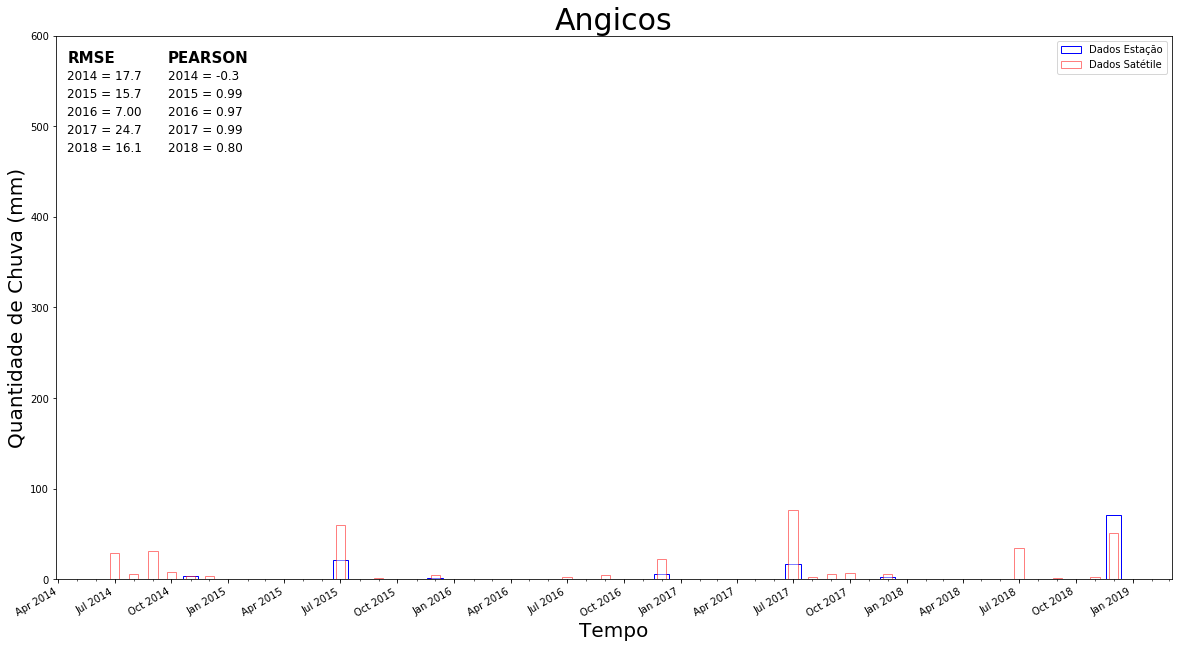

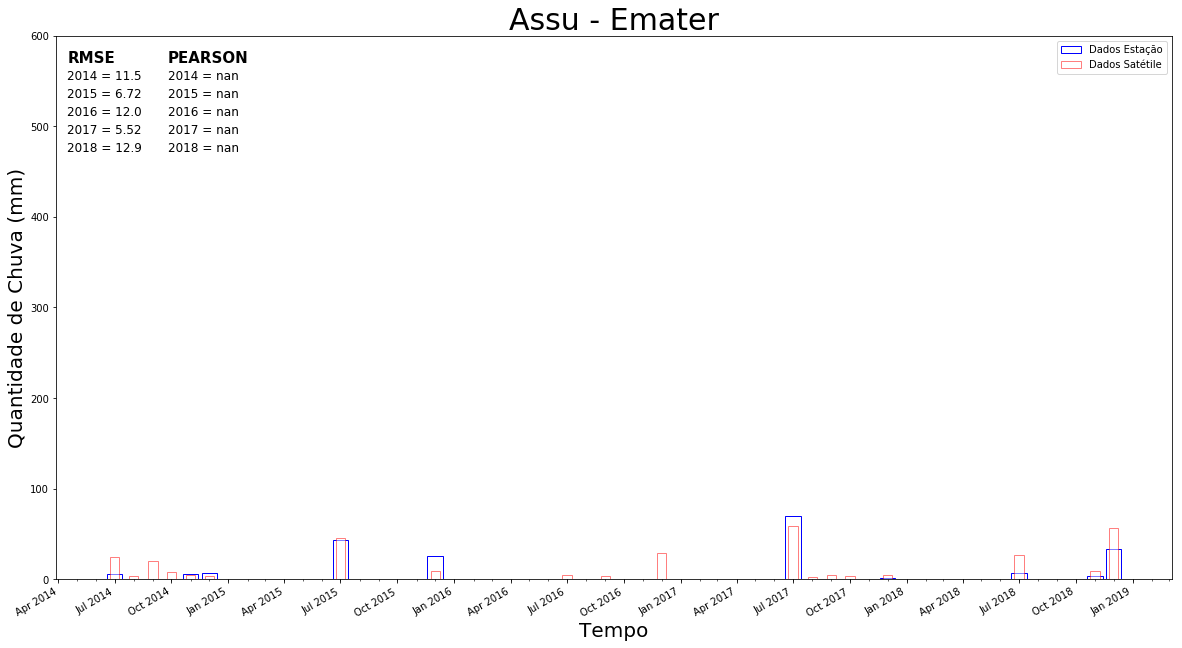

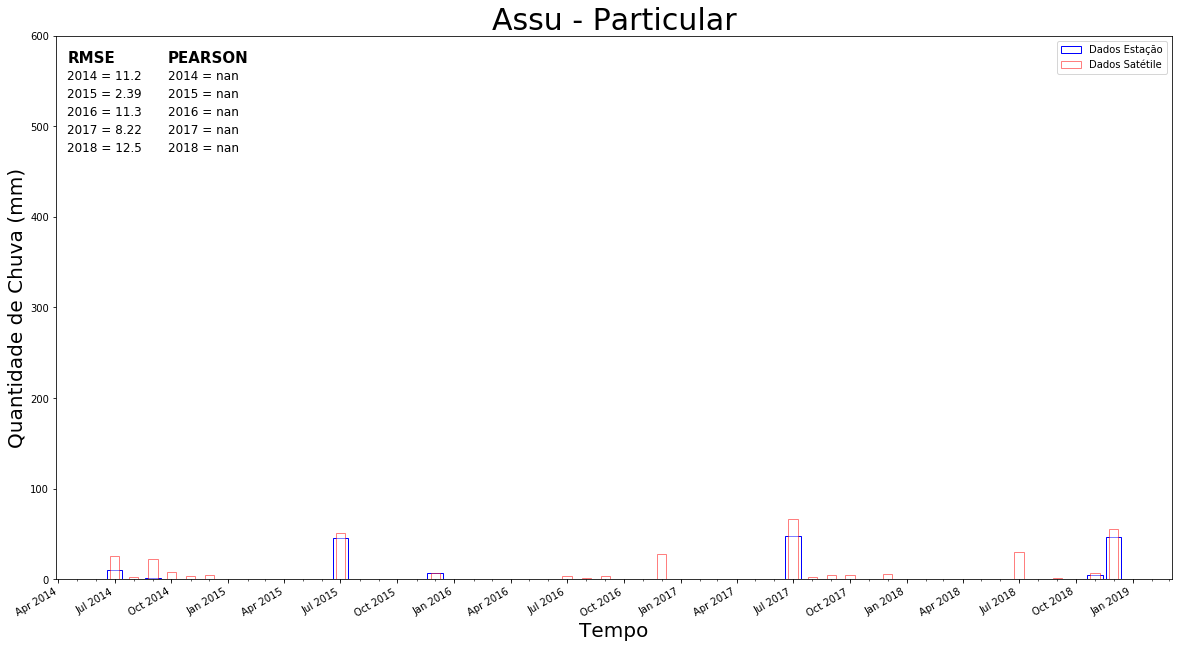

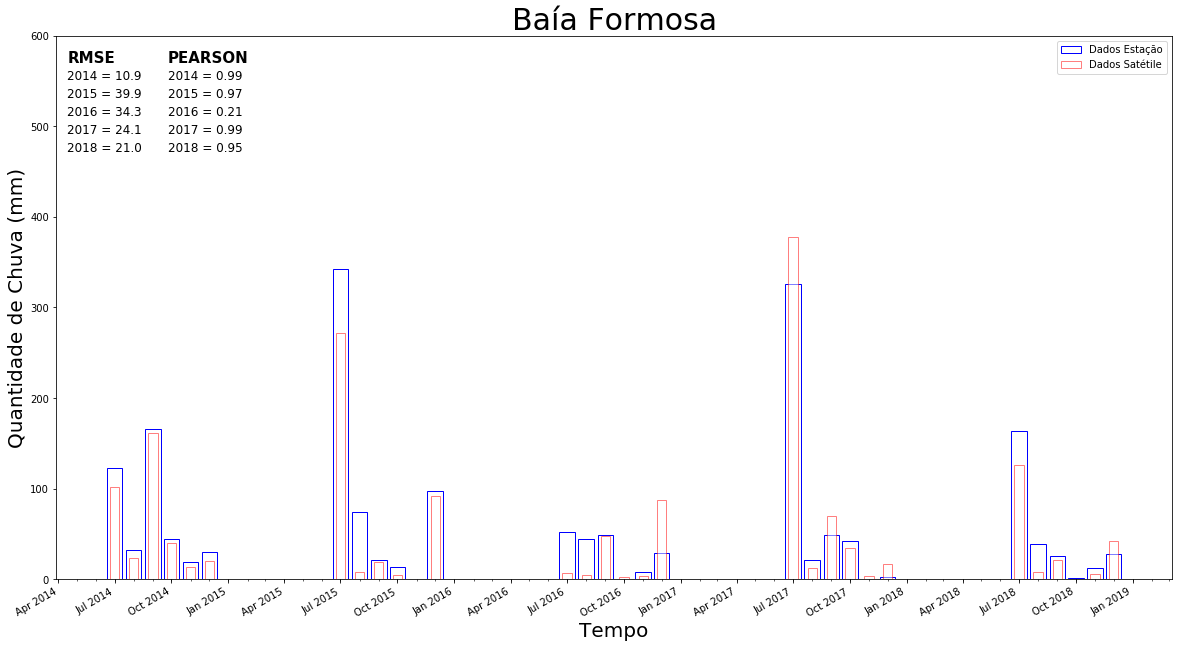

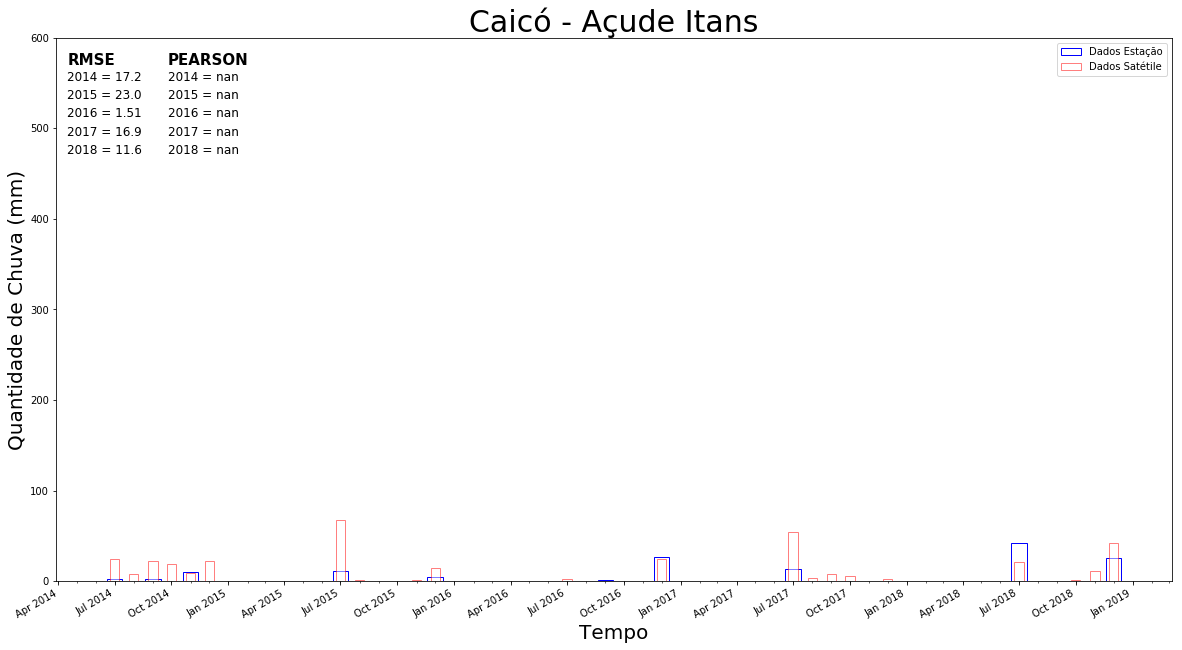

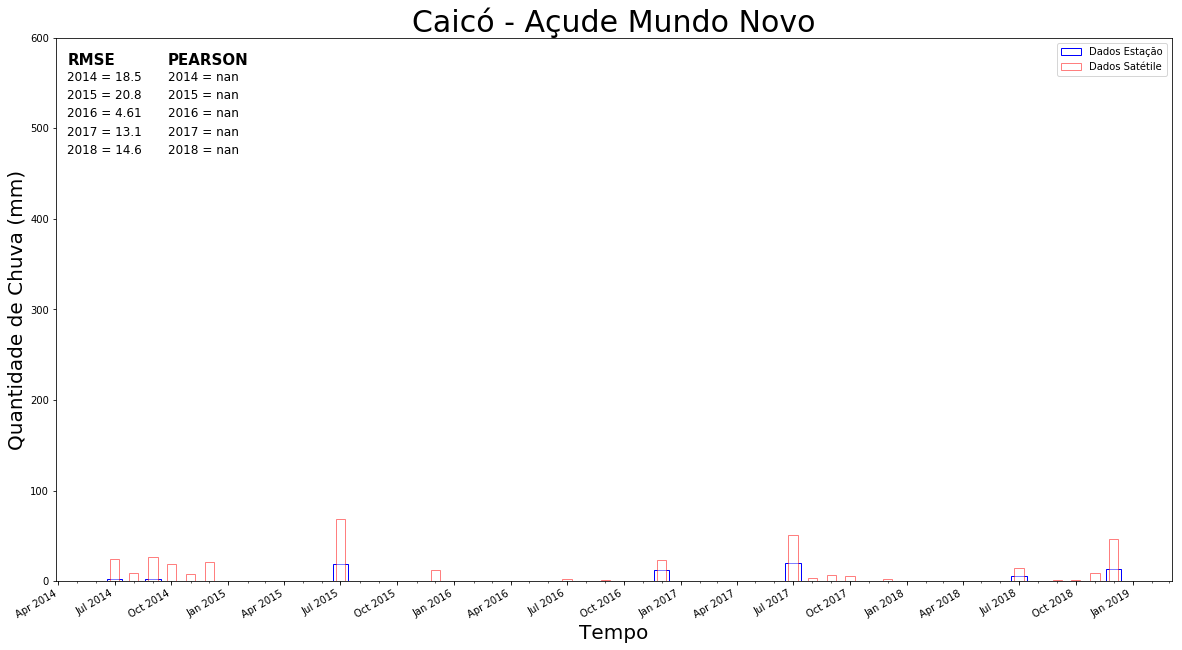

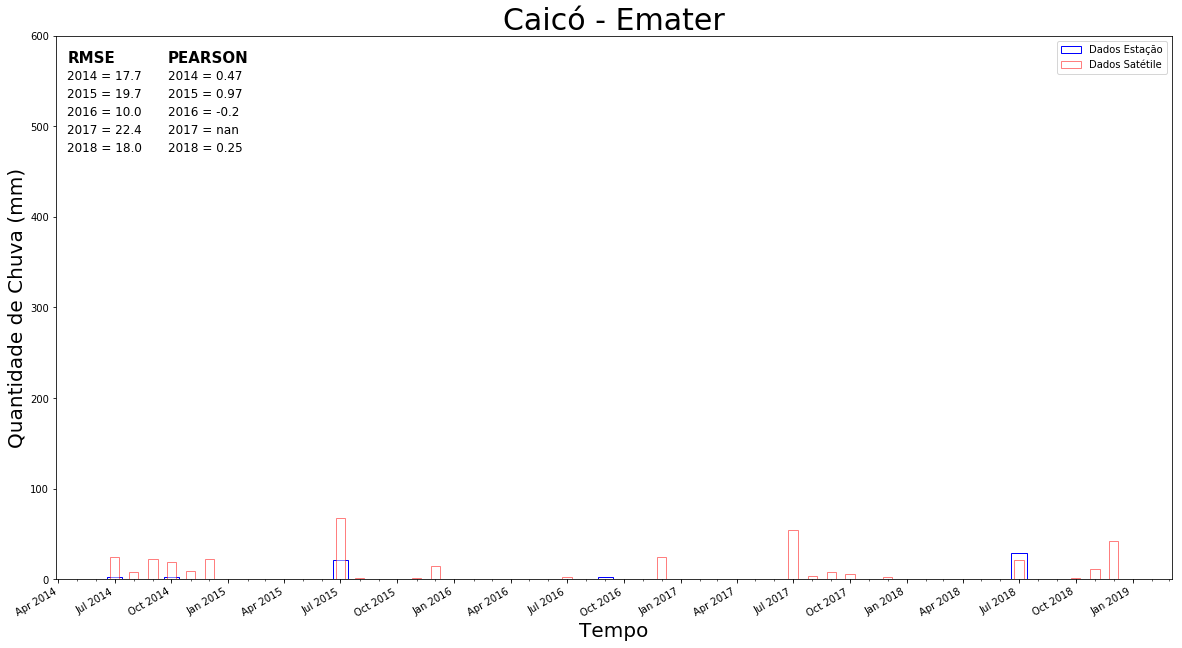

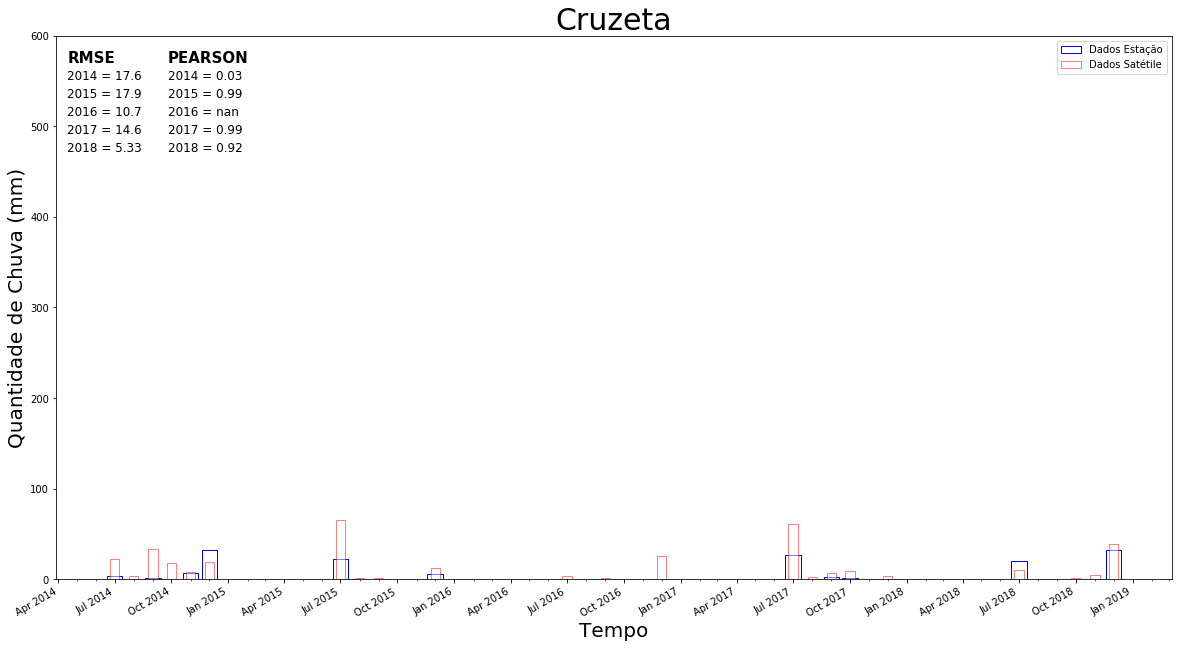

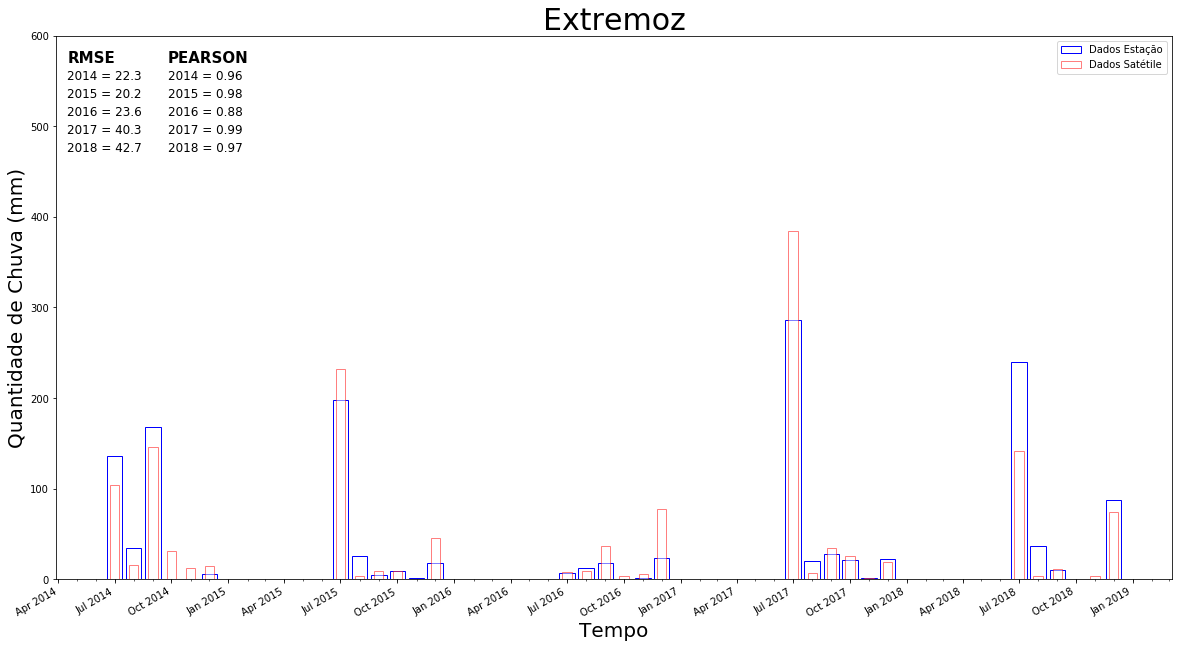

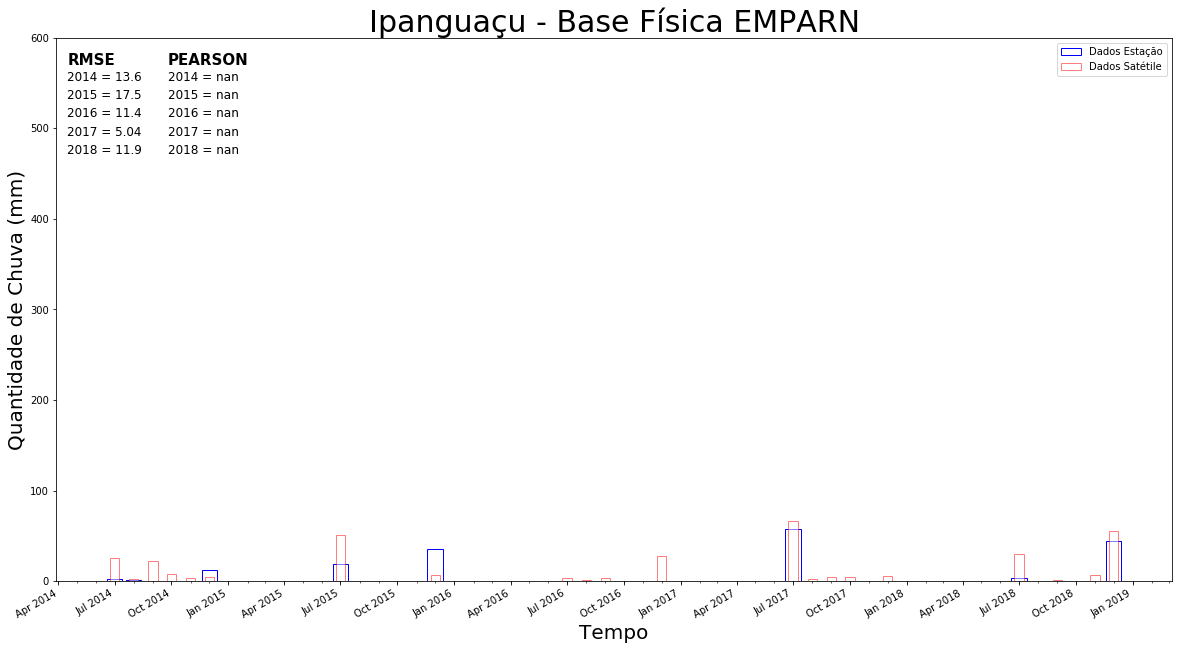

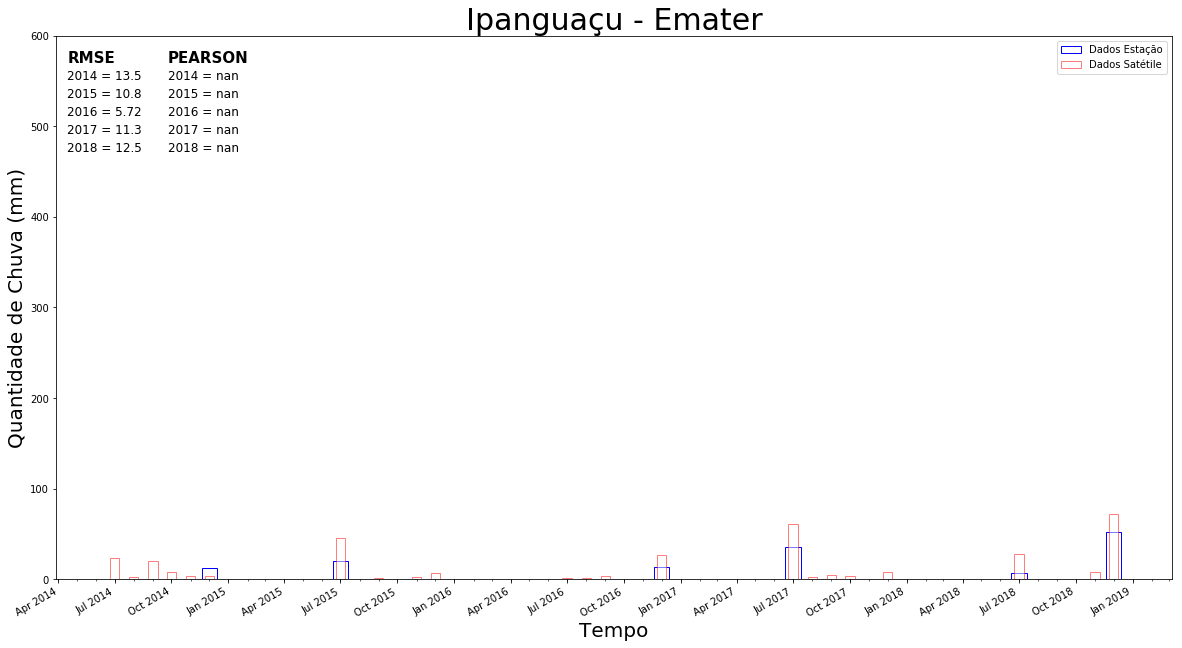

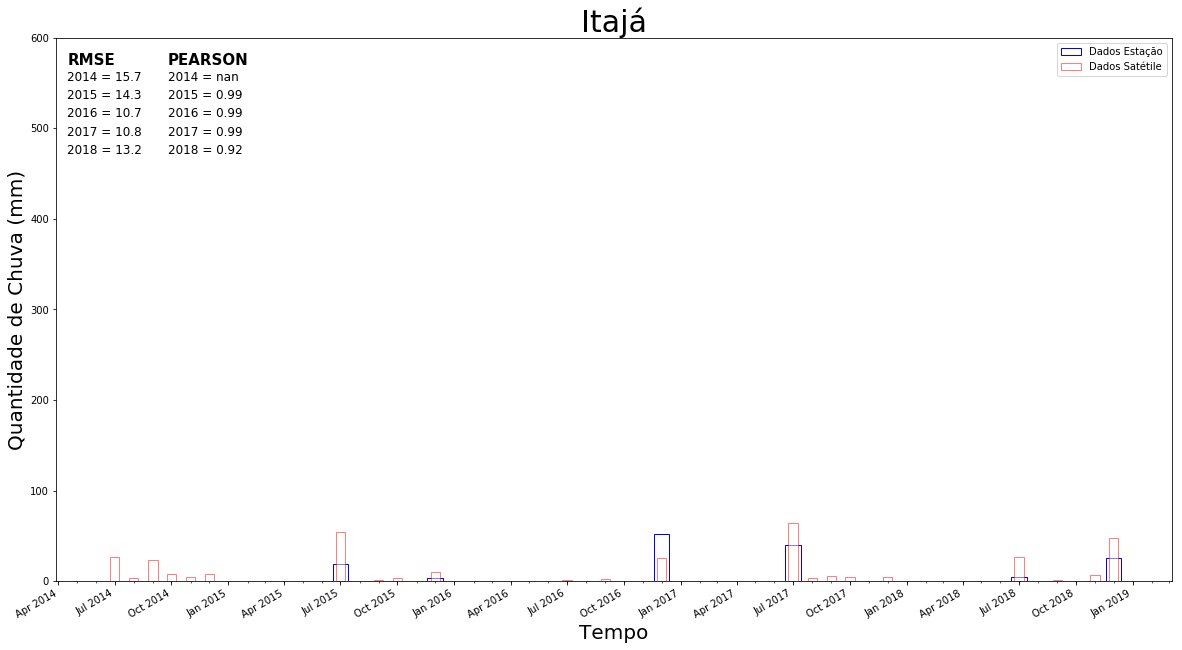

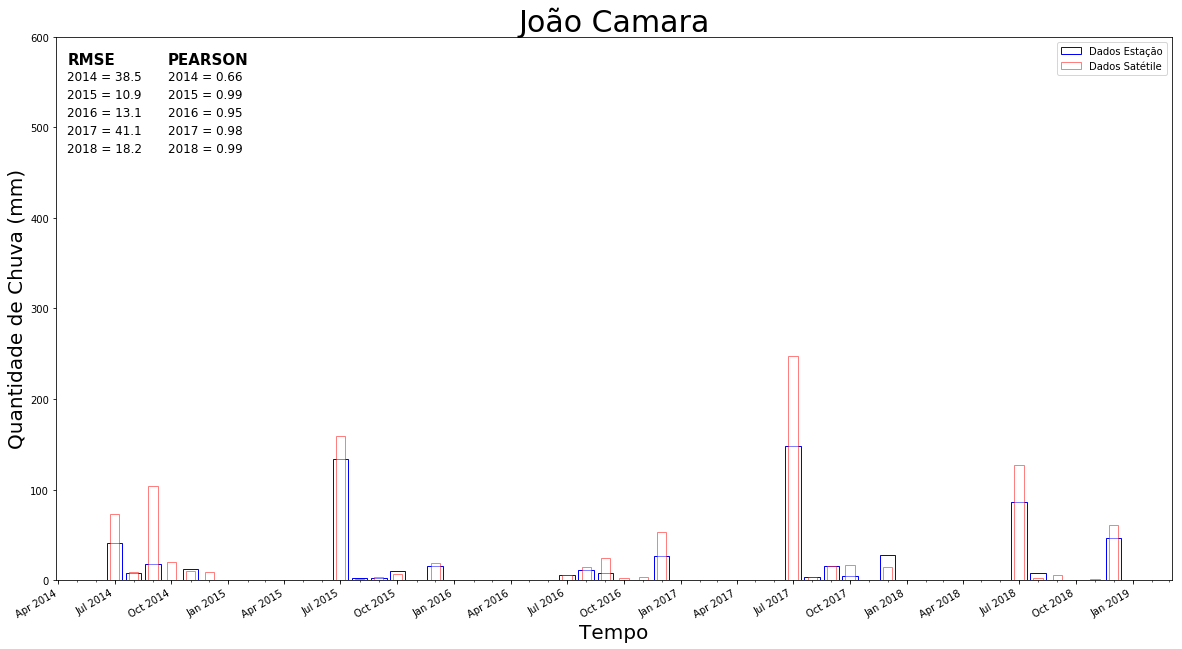

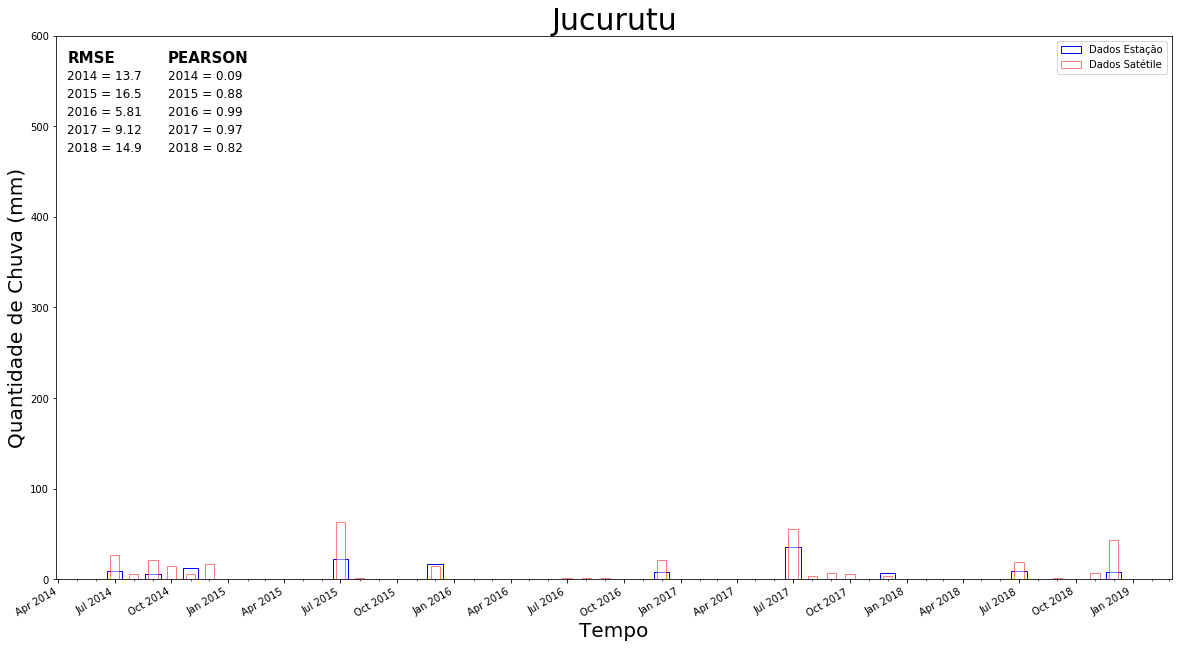

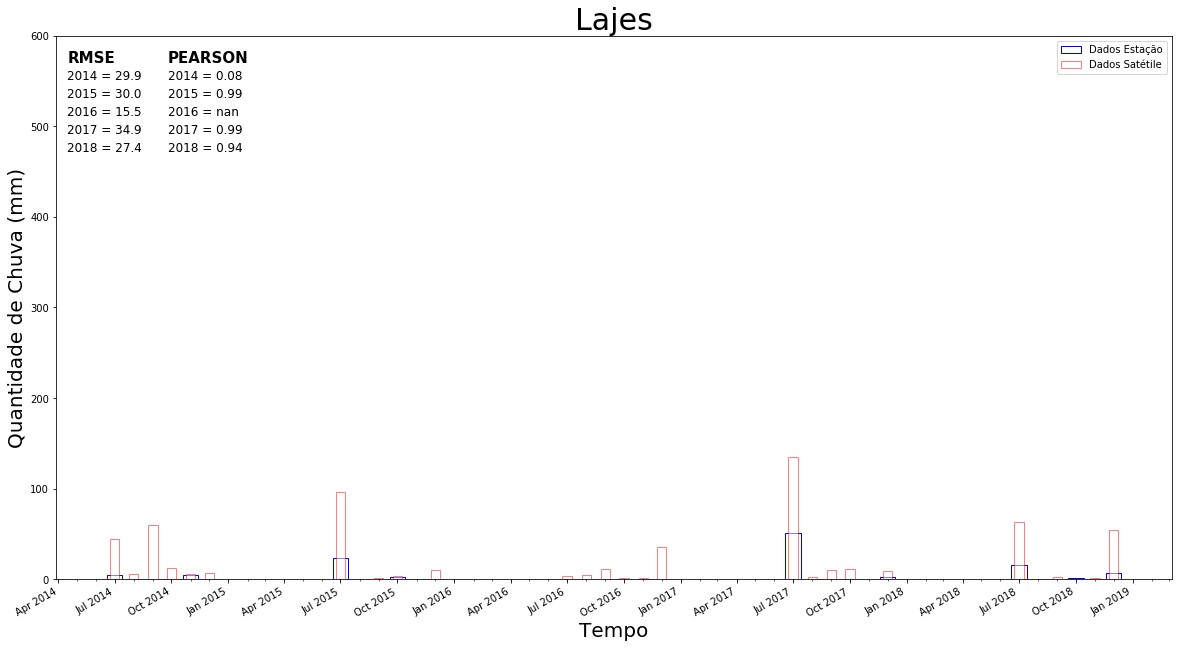

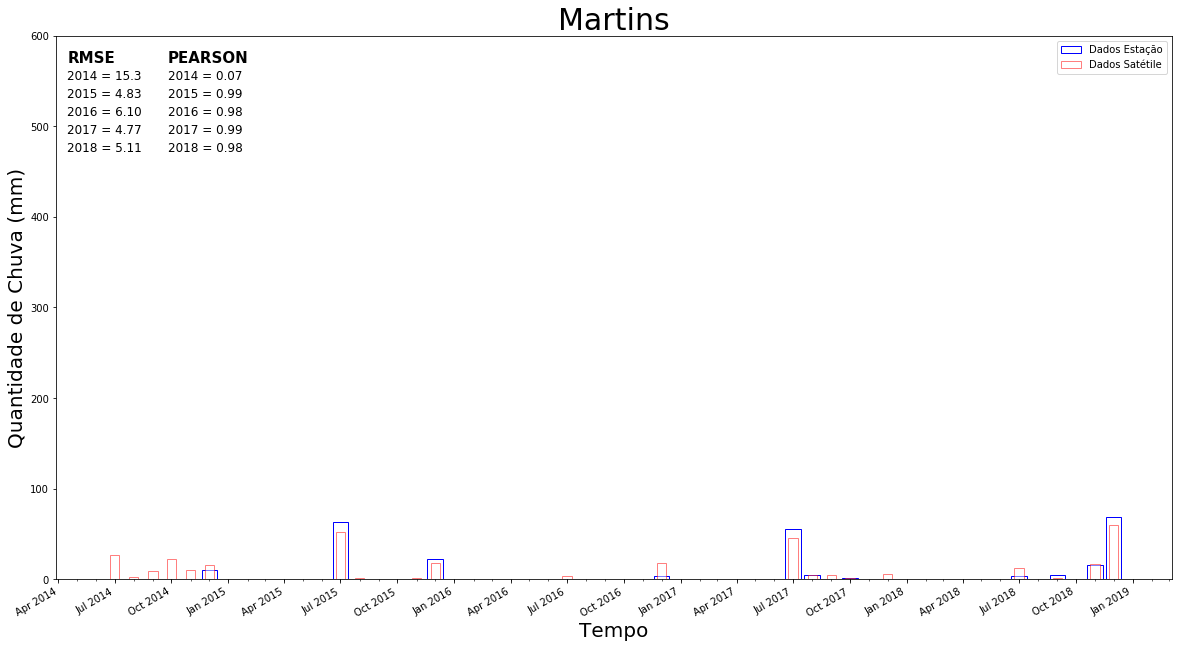

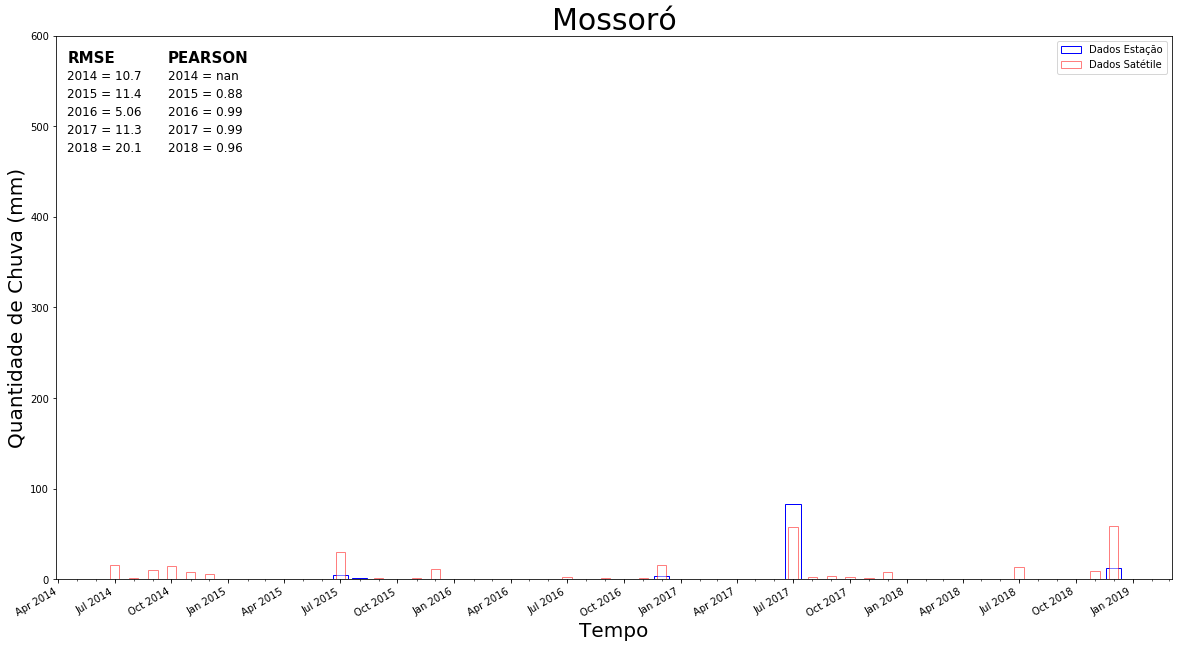

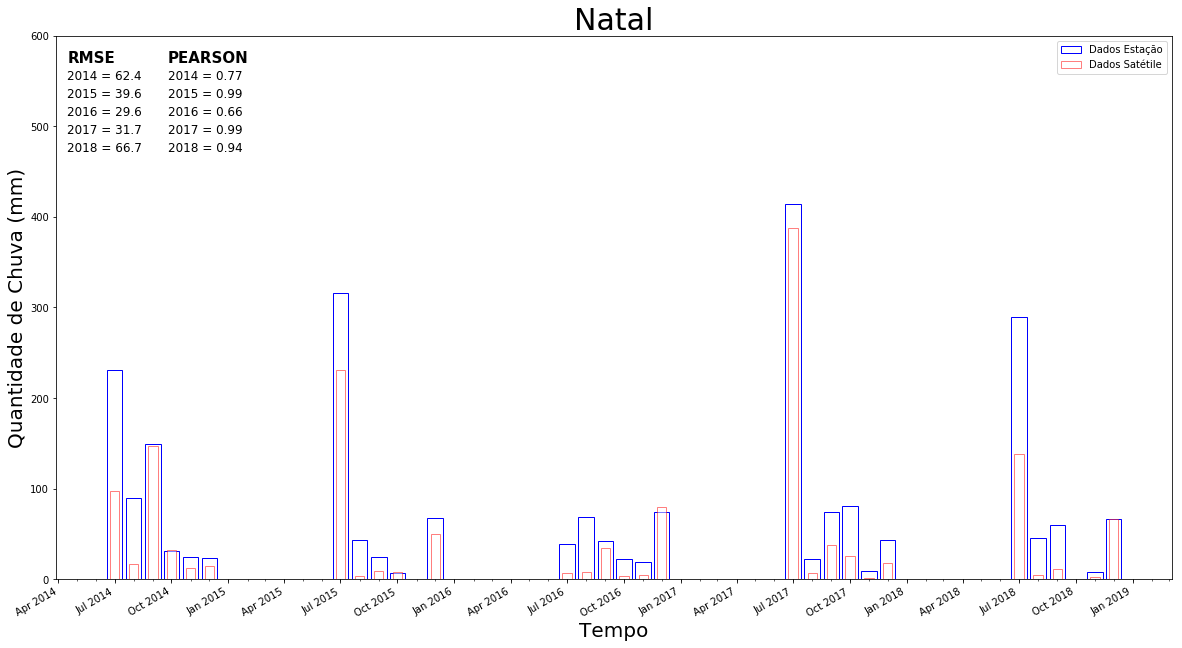

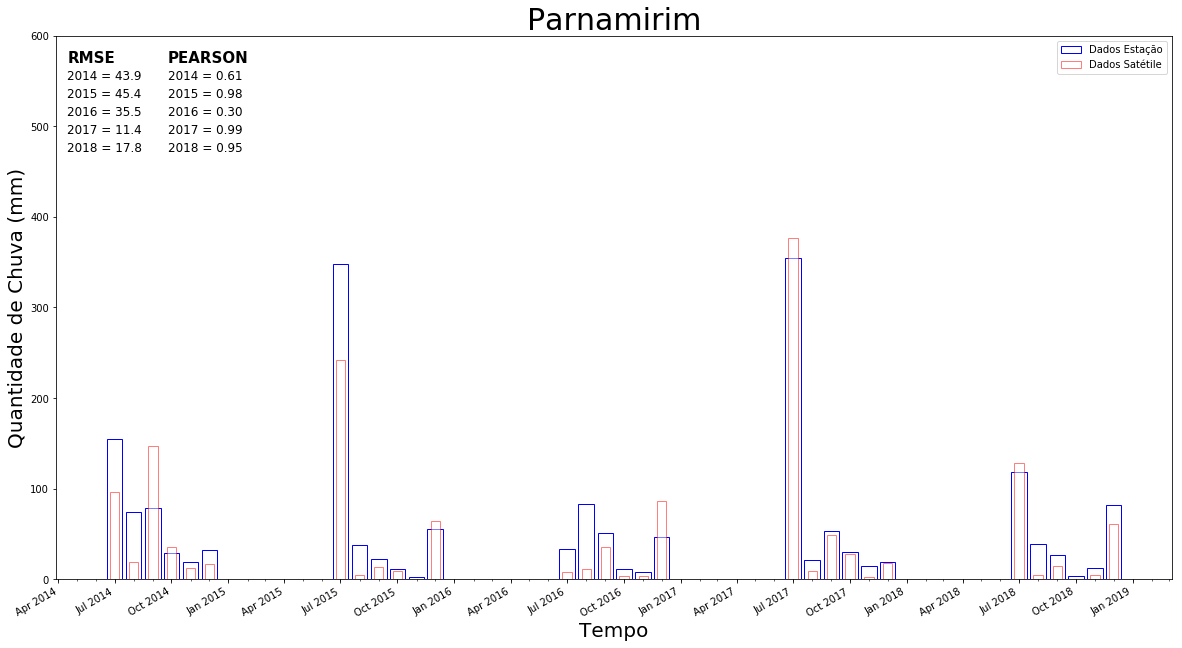

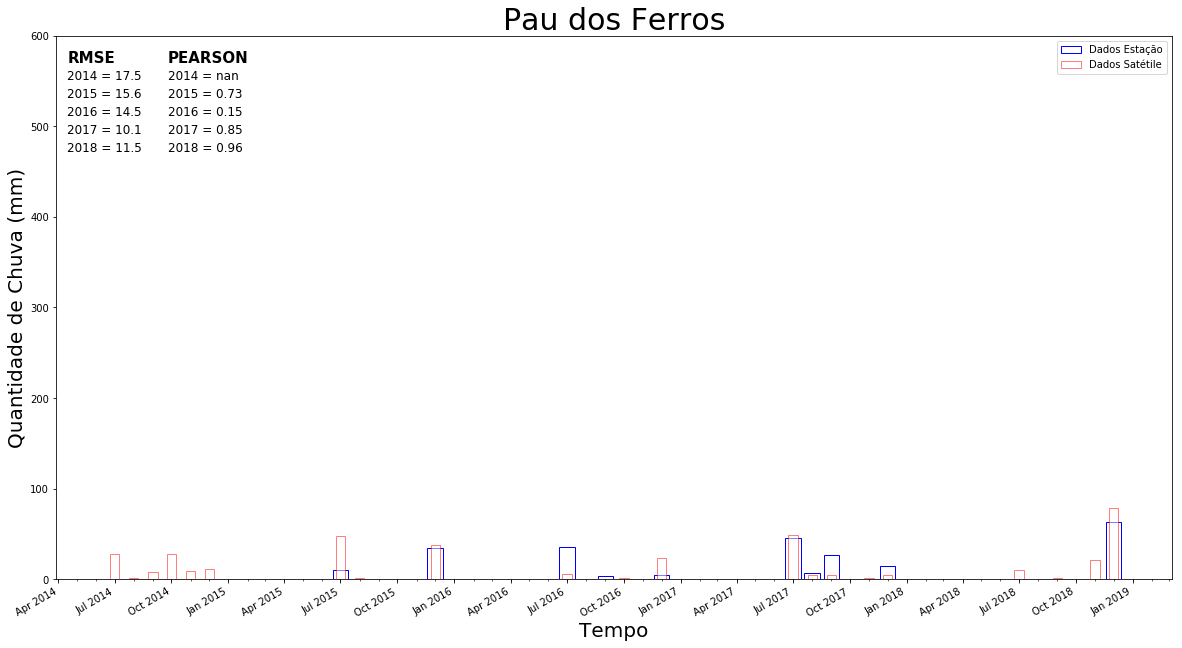

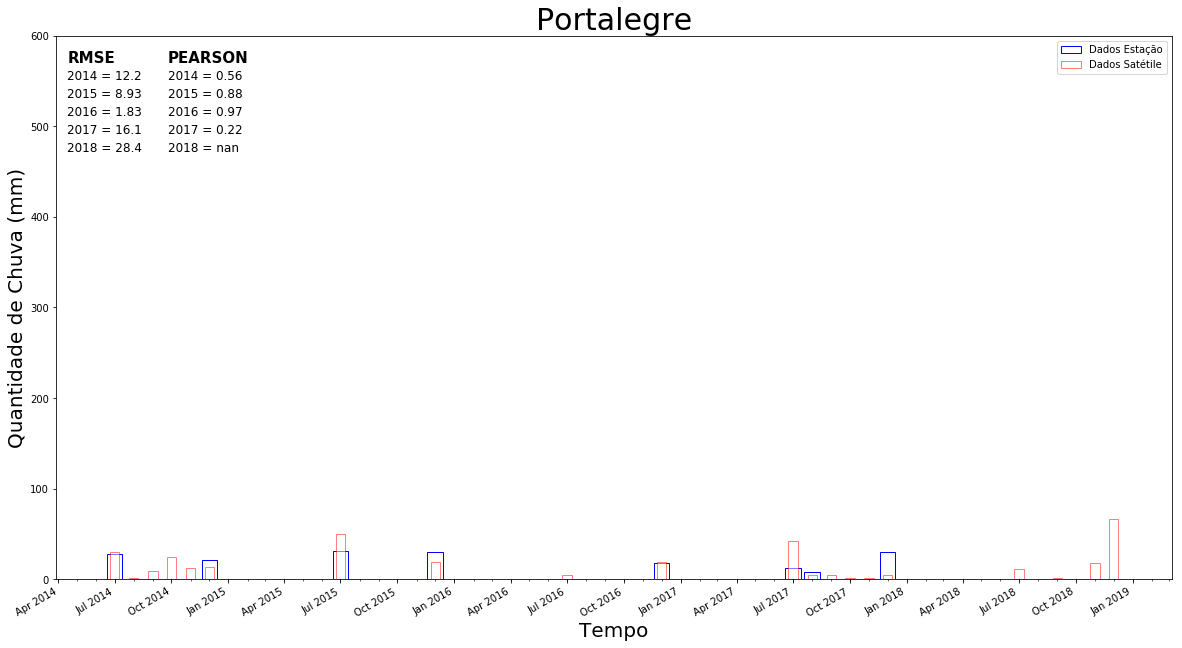

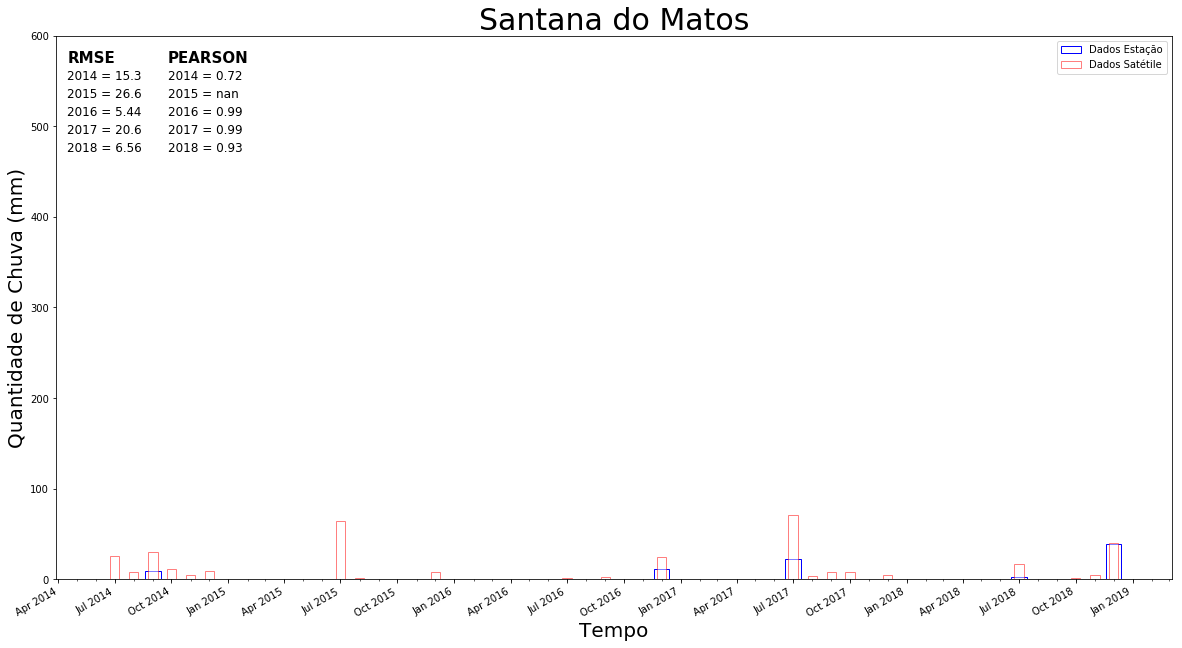

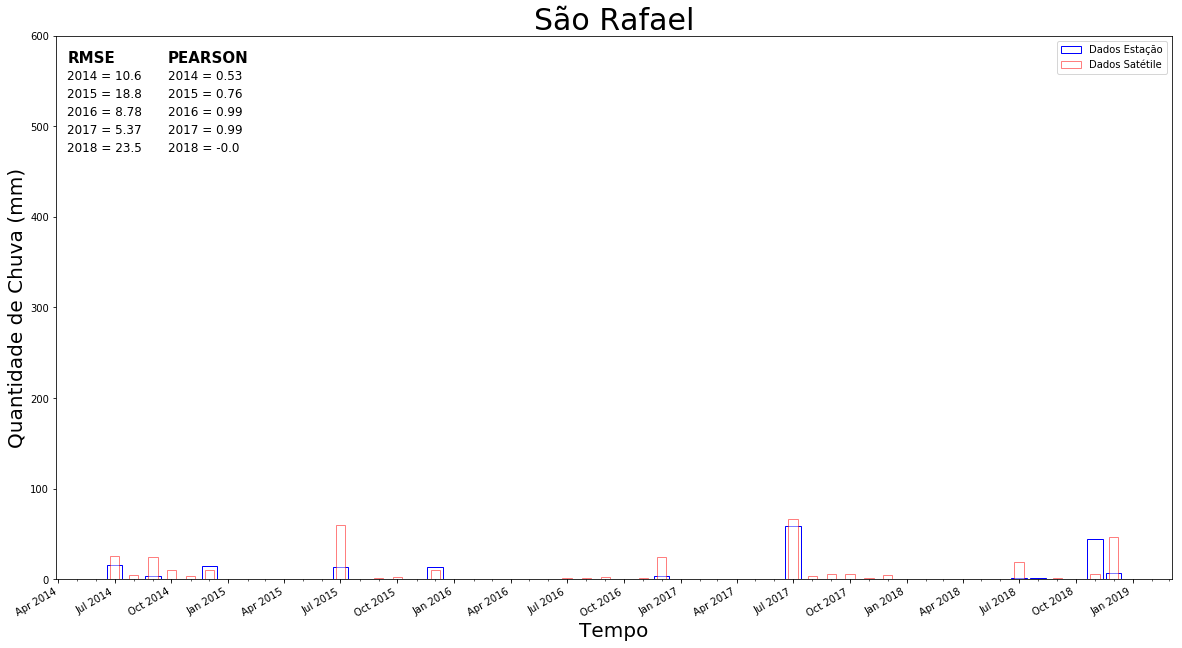

In [24]:
#Gráfico Geral 2º Semestre teste
semestre_2_dest = ['07','08','09','10','11','12']

semestre_2_dcol = [7,8,9,10,11,12]

for i,j in enumerate(lista_estacoes):
    #Puxando valores somente para cada estação
    satelite1 = dest[dest['Estacao'] == j]
    satelite = satelite1[satelite1['Mes'].isin(semestre_2_dest)]

    estacao1 = dcol[dcol['Estação'] == j]
    estacao = estacao1[estacao1['Mês'].isin(semestre_2_dest)]

    satelite["Mes"] = satelite["Mes"].astype(str)
    satelite["Ano"] = satelite["Ano"].astype(str)

    estacao["Mês"] = estacao["Mês"].astype(str)
    estacao["Ano"] = estacao["Ano"].astype(str)

    satelite['tempo'] = satelite['Ano']+'-'+satelite['Mes']
    estacao['tempo'] = estacao['Ano']+'-'+estacao['Mês']

        # Convert date strings (e.g. 2014-10) to datetime
    dates_satelite = [datetime.strptime(d, "%Y-%m") for d in satelite['tempo']]
    dates_estacao = [datetime.strptime(d, "%Y-%m") for d in estacao['tempo']]
    
    # Calculando o RMSE:
            
    RMSE_lst = []
    PEARSON_lst = []

    for x,ano in enumerate(sorted(list(set(estacao["Ano"])))):
        dado_anual_est = estacao['Dados'][estacao['Ano'] == ano]
        dado_anual_sat = satelite[' dados'][satelite['Ano'] == ano]
        
        RMSE_lst.append([ano,rmse(np.array(dado_anual_sat),np.array(dado_anual_est))])
        PEARSON_lst.append([ano,dado_anual_sat.corr(dado_anual_est)])   

    #Criando a figura:
    fig, ax = plt.subplots(figsize=(20,10))

    #Editando valores e tipo de plot:
    #ax.plot(dates_estacao, estacao['Dados'],color='k', linewidth=4, label='Dados Estação')
    #ax.scatter(dates_estacao, estacao['Dados'],color='k',label='Dados Estação')
    ax.bar(dates_estacao, estacao['Dados'],width=25,align='center',color='white',label='Dados Estação', edgecolor='blue')

    #ax.plot(dates_satelite, satelite[' dados'],color='r', linestyle=':',linewidth=2, markersize=12,label='Dados Satétile')
    #ax.scatter(dates_satelite, satelite[' dados'],color='r',label='Dados Satétile')
    ax.bar(dates_satelite, satelite[' dados'],width=15,align='center',color='white',alpha=0.5,label='Dados Satétile', edgecolor='red')

    #plotando resultado do RMSE:
    ax.text(0.01,0.95,'RMSE', ha='left', color='k',fontsize=15,weight='bold', transform=ax.transAxes)
        
    for k,l in enumerate(RMSE_lst):
        ax.text(0.01,0.92-(k/30), l[0]+' = '+str(l[1])[:4], ha='left', color='k',fontsize=12, transform=ax.transAxes)
        
        
    #plotando resultado do Índice de correlação de Pearson:
    ax.text(0.1,0.95,'PEARSON', ha='left', color='k',fontsize=15,weight='bold', transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='none'))
    
    for k,l in enumerate(PEARSON_lst):
        ax.text(0.1,0.92-(k/30), l[0]+' = '+str(l[1])[:4], ha='left', color='k',fontsize=12, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='none'))
    
    
    #Editar eixos:
    ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=3))
    ax.get_xaxis().set_minor_locator(mdates.MonthLocator(interval=1))
    ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_xlabel('Tempo',fontsize=20)
    ax.set_title(j,fontsize=30)
    ax.set_ylim(0,600)

    ax.set_ylabel('Quantidade de Chuva (mm)',fontsize=20)

    plt.legend(loc='upper right')
    
    plt.savefig('Figuras_Novas/2Sem_'+j+'.png', dpi=200, facecolor='w', edgecolor='w',orientation='landscape')


         Acari
#Equação
-0.342980307021727 [0.31380003]
#R2
0.6588705782966398
#Correlação de Pearson
0.8117084318255171


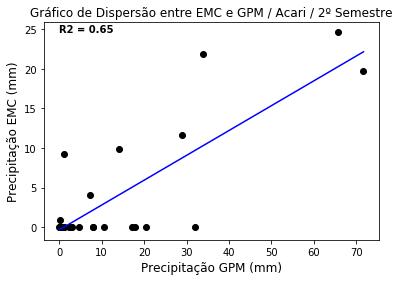



         Angicos
#Equação
-1.1683501592677228 [0.43298764]
#R2
0.39559212343097855
#Correlação de Pearson
0.6289611462013998


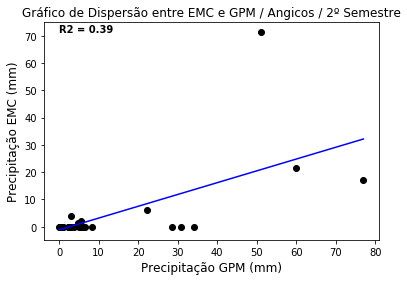



         Assu - Emater
#Equação
-1.8260869187077242 [0.7873939]
#R2
0.6913842050215584
#Correlação de Pearson
nan


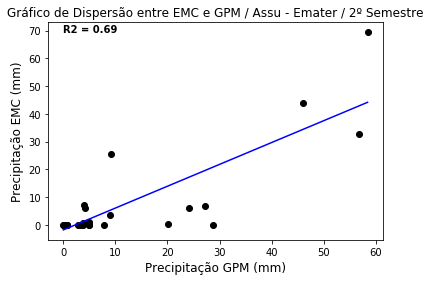



         Assu - Particular
#Equação
-2.6176746968946896 [0.71060622]
#R2
0.8126019052407724
#Correlação de Pearson
nan


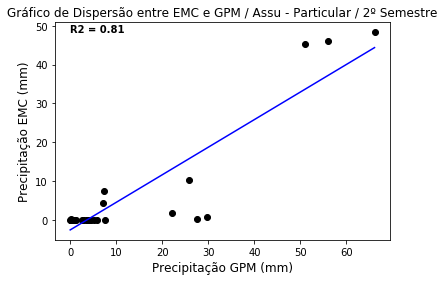



         Baía Formosa
#Equação
10.138527603586141 [0.95423787]
#R2
0.9000790675067321
#Correlação de Pearson
0.948724969370329


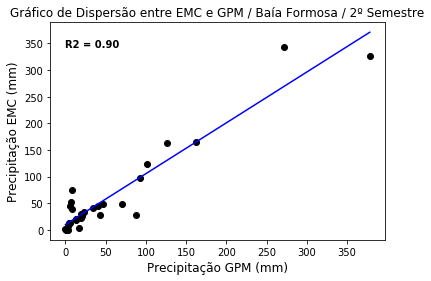



         Caicó - Açude Itans
#Equação
0.6681481351888632 [0.32929235]
#R2
0.3000922742684423
#Correlação de Pearson
nan


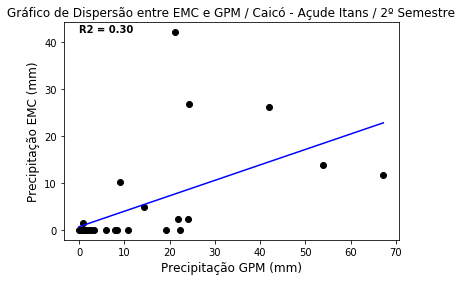



         Caicó - Açude Mundo Novo
#Equação
-1.0798132593710825 [0.29648989]
#R2
0.793971456541275
#Correlação de Pearson
nan


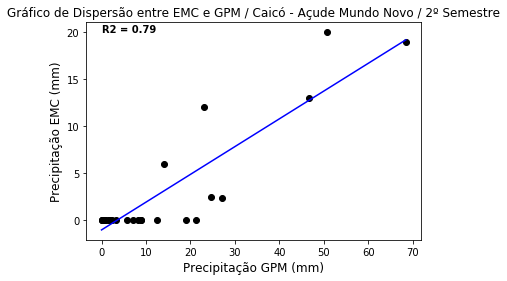



         Caicó - Emater
#Equação
-0.2525099520325005 [0.17491671]
#R2
0.2076071709044921
#Correlação de Pearson
0.4556392991221144


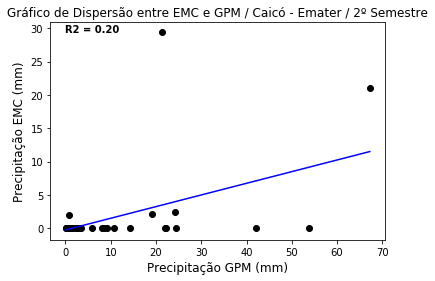



         Cruzeta
#Equação
0.36154837012870455 [0.40774716]
#R2
0.4895693739241525
#Correlação de Pearson
0.6996923423363675


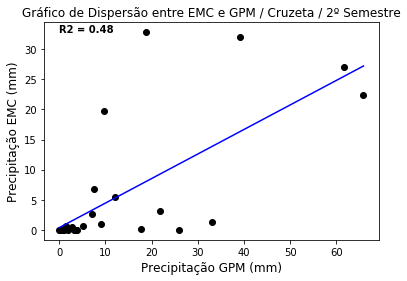



         Extremoz
#Equação
5.190447296852618 [0.85753924]
#R2
0.8534677592360366
#Correlação de Pearson
0.9238331879923108


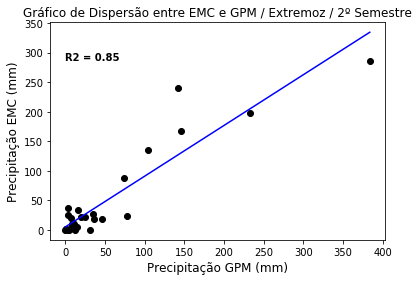



         Ipanguaçu - Base Física EMPARN
#Equação
-1.1564555654650093 [0.62300133]
#R2
0.5866939159896329
#Correlação de Pearson
nan


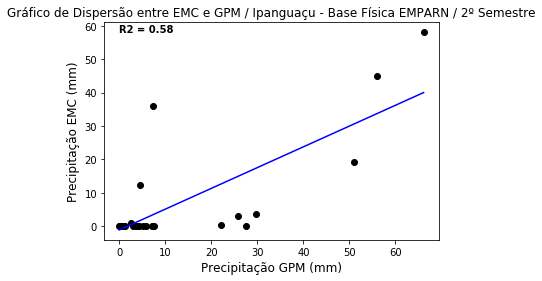



         Ipanguaçu - Emater
#Equação
-2.047613174733221 [0.58545826]
#R2
0.8387379707660568
#Correlação de Pearson
nan


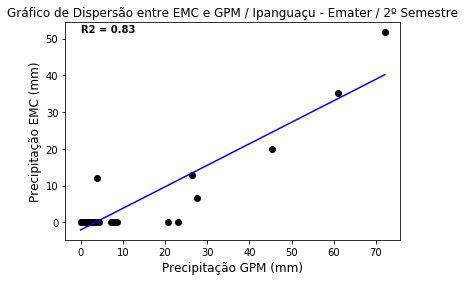



         Itajá
#Equação
-1.499060948503785 [0.54920136]
#R2
0.5512565478823618
#Correlação de Pearson
0.7424665298061331


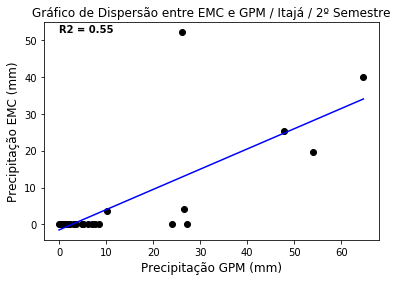



         João Camara
#Equação
0.20965550679721545 [0.61951927]
#R2
0.8910089512523773
#Correlação de Pearson
0.9439327048324884


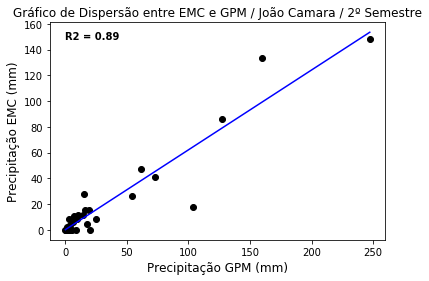



         Jucurutu
#Equação
-0.25686536967540263 [0.40926795]
#R2
0.6764456623743431
#Correlação de Pearson
0.8224631677919338


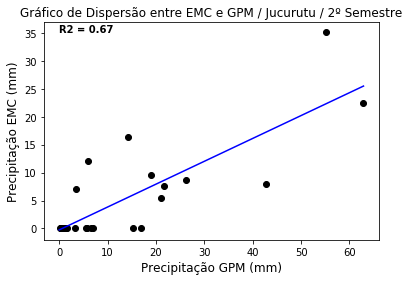



         Lajes
#Equação
-1.8366953799485883 [0.28202792]
#R2
0.7826605695951347
#Correlação de Pearson
0.8846810552934515


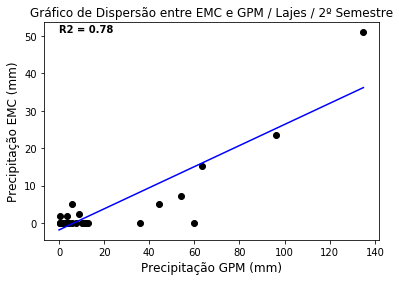



         Martins
#Equação
-3.605255376182061 [1.07660717]
#R2
0.8280735561779927
#Correlação de Pearson
0.909985470311473


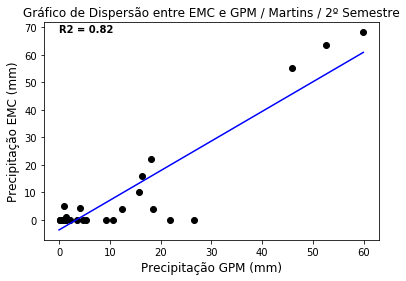



         Mossoró
#Equação
-3.3230703742742613 [0.72748171]
#R2
0.5074452962363684
#Correlação de Pearson
0.7123519468888733


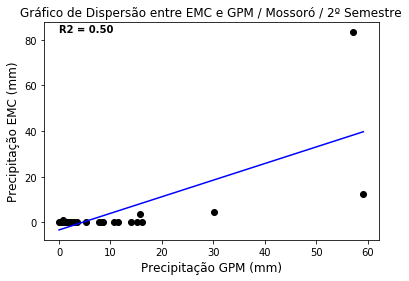



         Natal
#Equação
24.27010292472066 [1.13325787]
#R2
0.8694784961365094
#Correlação de Pearson
0.9324583079883568


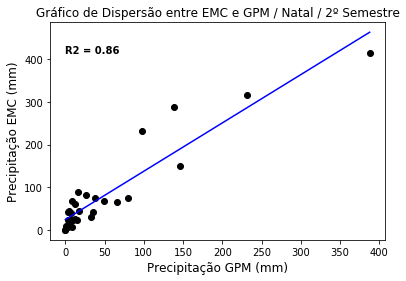



         Parnamirim
#Equação
13.730275972169785 [0.97187579]
#R2
0.8617263464871884
#Correlação de Pearson
0.9282921665548987


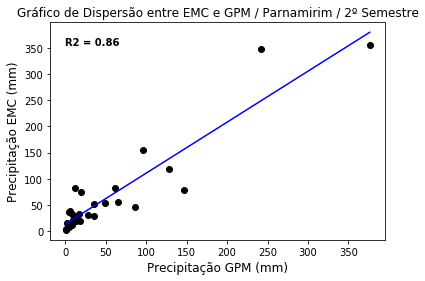



         Pau dos Ferros
#Equação
0.4407770033950733 [0.60806712]
#R2
0.5075825006435919
#Correlação de Pearson
0.7124482441859142


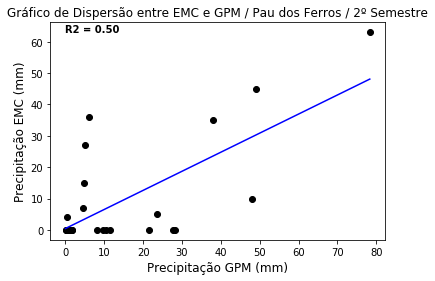



         Portalegre
#Equação
2.684471284279751 [0.28476022]
#R2
0.18624866917606908
#Correlação de Pearson
0.43156537068683987


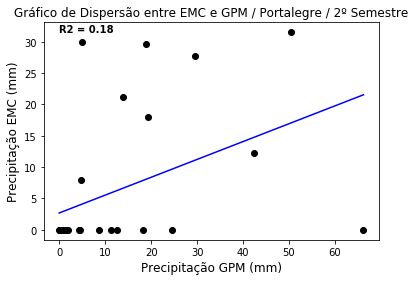



         Santana do Matos
#Equação
-0.5253092354083271 [0.27892205]
#R2
0.38823661411510113
#Correlação de Pearson
0.6230863616827935


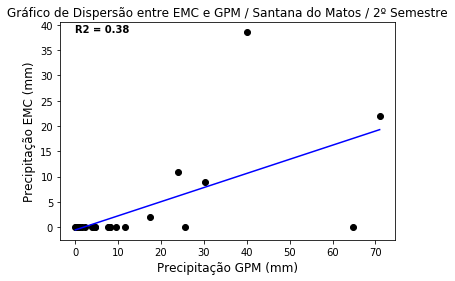



         São Rafael
#Equação
0.43604389300298685 [0.47123078]
#R2
0.37362985611493926
#Correlação de Pearson
0.6112526941576121


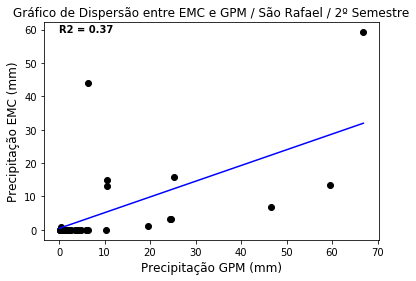

In [25]:
#Gráfico de dispersão 2º Semestre
for i,j in enumerate(lista_estacoes):
    #Puxando valores somente para cada estação
    satelite1 = dest[dest['Estacao'] == j]
    satelite = satelite1[satelite1['Mes'].isin(semestre_2_dest)]

    estacao1 = dcol[dcol['Estação'] == j]
    estacao = estacao1[estacao1['Mês'].isin(semestre_2_dest)]
    
    x = satelite[' dados']
    y = estacao['Dados']


    modelo = linear_model.LinearRegression(fit_intercept=True, normalize=False)

    xl= np.array(x)
    xl = xl.reshape((-1, 1))

    #print(xl)
    #print(y)

    modelo.fit(xl,y)
    print(bold+'         '+j+reset)
    print(bold+'#Equação'+reset)
    print(modelo.intercept_,modelo.coef_)
    x1=np.array([0.,max(satelite[' dados'])])
    y1=modelo.intercept_+modelo.coef_*x1
    
    print(bold+'#R2'+reset)
    print(modelo.score(xl,y))
    
    #Índice de correlação de Pearson
    print(bold+'#Correlação de Pearson'+reset)
    print(x.corr(y))
    

    plt.scatter(x, y, c='black')
    plt.title('Gráfico de Dispersão entre EMC e GPM / '+j+' / 2º Semestre',fontsize=12)
    
   # plt.legend([modelo.score(xl,y) ,' = R2'], loc=2)   

        
    plt.xlabel('Precipitação GPM (mm)',fontsize=12)
    plt.ylabel('Precipitação EMC (mm)',fontsize=12)
    plt.plot(x1,y1, color='blue')
    
    #PLOTANDO O VALOR DE R2 NO GRÁFICO
    plt.text(0,max(y),'R2 = '+str(modelo.score(xl,y))[0:4], ha='left', color='k',fontsize=10,weight='bold')

    plt.savefig('Figuras_Novas/'+j+'_dispersao_2semestre.png', dpi=300, facecolor='w', edgecolor='w',orientation='landscape')
    plt.show()
    print()
    print()

Layout dos gráficos e tabelas

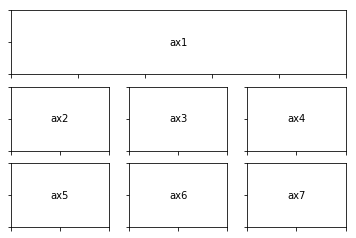

In [32]:
fig = plt.figure()

ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0))
ax3 = plt.subplot2grid((3, 3), (1, 1))
ax4 = plt.subplot2grid((3, 3), (1, 2))
ax5 = plt.subplot2grid((3, 3), (2, 0))
ax6 = plt.subplot2grid((3, 3), (2, 1))
ax7 = plt.subplot2grid((3, 3), (2, 2))

for i, ax in enumerate(fig.axes):
    ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
    ax.tick_params(labelbottom=False, labelleft=False)

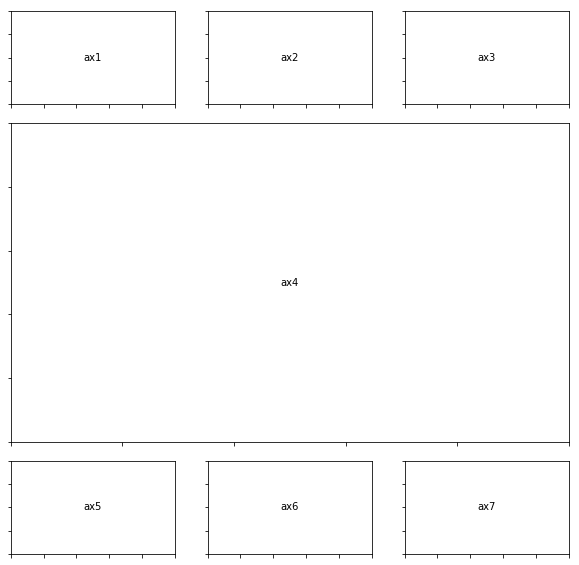

In [33]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((5, 3), (0, 0))
ax2 = plt.subplot2grid((5, 3), (0, 1))
ax3 = plt.subplot2grid((5, 3), (0, 2))
ax4 = plt.subplot2grid((5, 3), (1, 0), rowspan=3,colspan=3)
ax5 = plt.subplot2grid((5, 3), (4, 0))
ax6 = plt.subplot2grid((5, 3), (4, 1))
ax7 = plt.subplot2grid((5, 3), (4, 2))

for i, ax in enumerate(fig.axes):
    ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
    ax.tick_params(labelbottom=False, labelleft=False)

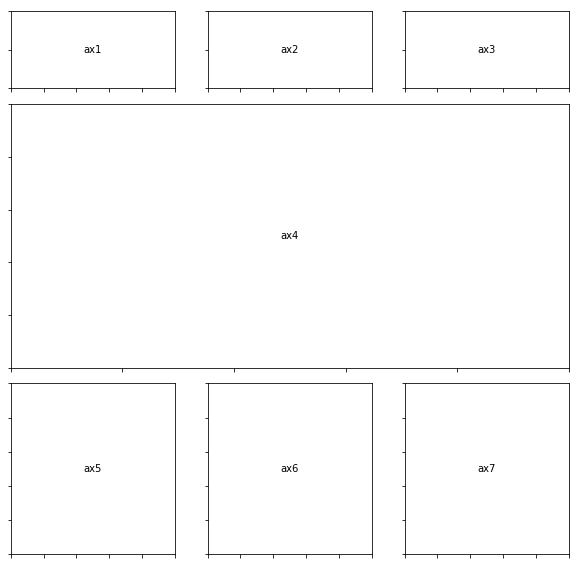

In [34]:
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((6, 3), (0, 0))
ax2 = plt.subplot2grid((6, 3), (0, 1))
ax3 = plt.subplot2grid((6, 3), (0, 2))
ax4 = plt.subplot2grid((6, 3), (1, 0), rowspan=3,colspan=3)
ax5 = plt.subplot2grid((6, 3), (4, 0), rowspan=2)
ax6 = plt.subplot2grid((6, 3), (4, 1), rowspan=2)
ax7 = plt.subplot2grid((6, 3), (4, 2), rowspan=2)

for i, ax in enumerate(fig.axes):
    ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
    ax.tick_params(labelbottom=False, labelleft=False)